# Abstract

I used some machine learning approaches to predict the success of telephone calls for selling bank deposits. A data set is from a bank. It includes 20 features (y is the response). The Duration highly affects the output target. Thus, the Duration should be excluded to train a realistic predictive model. I compared four models: decision tree, random forest, XGBoost, and Stacking Ensemble models. I used one metric, recall, to compare models. The XGBoost model got the highest recall with 0.55.

# Introduction

### Why do banks need deposits?


Deposit is the most important business in bank liability business and the main source of funds for commercial banks. Banks use the money in deposit accounts to make loans to other people or businesses. In return, the bank receives interest payments on those loans from borrowers. This way is called Interest Rate Differential (IRD). 
https://www.forbes.com/advisor/banking/how-do-banks-work/

An example can explain why banks need large amounts of deposits. The following link is a Financial report for Bank of America Corp.(BOA) in 2020. https://www.wsj.com/market-data/quotes/BAC/financials/annual/income-statement The report shows that the BOA only paid 1,943 Million in interest to customers, but the BOA earned 51,585 Million from customers' deposits. Because BOA will lend customers' deposits to other banks or financial institutions, earning interest as income.


### Why choose the prediction of marketing campaigns (phone calls) that are encouraging potential customers to make deposits?


Banks need to spend a lot of manpower and cost to hire staff who will contact potential customers to let customers make deposits. If we can identify who has a higher probability to make deposits, we can reduce the cost of hiring staff and increase the deposits.



# Research Questions

### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

If I can make an accurate prediction model marking who will make deposits, the model can help banks to reduce marketing costs and increase the number of deposits.


# Data to be Used

Bank Marketing Data Set

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

I will download the data set from https://archive.ics.uci.edu directly.

Why don't I scrape data or use APIs to get data? Because I do not know what variables are used by the real marketing campaigns of banks. The UCI Machine Learning Repository can let me focus on training models because it can provide a real-world data set.

# Approach

### Data management

I will download the CSV file from https://archive.ics.uci.edu and store the CSV file into my Github https://github.com/Yuehao-Wang/DAV-6150
    

### I plan to use followed graphics to explore variables.

Histogram : Using Histogram to see the distribution of numericial variables.

Box plot : Using Box plot to identify outliers of numericial variables.

Bar chart : Using Bar chart to compare the frequency of different types in each category variable.

Heatmap : Using Heatmap to show the correlation between target and explanatories.


### How to analyze my research questions?

My goal is to predict if the client will make a deposit (variable y). In the variable y, yes has 4640 but no has 36548. The yes accounts for 11.27% of the total number of samples. The accuracy does not accurately represent the predicted results, because the outcome variable is imbalanced. 

I want to create a predictive model that has a high sensitivity(sensitivity = tp / (tp + fn)) and a low specificity (specificity = tn / (tn + fp)). Because banks encourage more customers to make deposits. Banks do not want to miss any customers who will make deposits, but Banks can tolerant spending more costs to contact customers who will not make deposits. Because the example of the Financial report for Bank of America Corp.(BOA) in 2020 shows that the Interest Income is the most main income for a bank, but Interest Expense on Bank Deposits accounts for a low rate.

In order to evaluate models with high sensitivity and low specificity, I will use the confusion matrix, ROC curve, and AUC value to judge and adjust models.


### 3 models and 1 ensemble model
  - Decision tree
    
  - Random Forest classifier

  - XGBoost

  - Ensemble model: Stacking with 2 level model.
    - Level 1: KNN classifier, SVM classifier, Random Forest classifier
    - Level 2: Logistic Regression
  
  - Evaluate models
    - Cross-Validation (scoring = recall)
    - Confusion matrix
    - High sensitivity(recall)
    - Roc Curve and AUC value


# Analysis Steps
- 1. About Data Set
- 2. Data Summary
  - 2.1 Load data
- 3. Exploratory Data Analysis
  - 3.1 Drop a special variable : Duration
  - 3.2 Encode the response
  - 3.3 Explore the number of values of each category.
  - 3.4 Explore the categories by bar plots
  - 3.5 Explore the Relationship between categories and response (categorical response)
  - 3.6 Explore the numerical variables
  - 3.7 Check multi-collinear
  - 3.8 Explore numerical variables and response
  - 3.9 Summary of EDA

- 4. Data Preparation
  - 4.1 Check duplication
  - 4.2 Drop outliers
  - 4.3 Discretization/Binning
  - 4.4 Convert to normal distribution by Box-Cox (ignore)
  - 4.5 Standardization
  - 4.6 Prepped Data Review (Re-run Exploratory Data Analysis)
  - 4.7 Dummy the categories
  - 4.8 Convert type for binning variables
  - 4.9 Split data set
  - 4.10 Up-sample the test data set
  
- 5. Feature Selections
  - 5.1 Create a baseline of feature selection
  - 5.2 Based On EDA feature selection
  - 5.3 Filter method - mutual_info_classif
  - 5.4 Embedded - AdaBoostClassifier
  - 5.5 Embedded - RandomForestClassifier
  - 5.6 Compare each feature selections
  - 5.7 Summary of feature selection

- 6. Machine Learning Models
  - 6.1 Decision Tree
  - 6.2 Random Forest classifier
  - 6.3 XG Boost classifier

- 7. Model Selection
  - 7.1 Compare all models
  - 7.2 Use all train data (up-sampled to be balanced) for XGBoost Model
  - 7.3 Use all test data (imbalance) for XGBoost Model
  - 7.4 Evaluate the XGBoost model by test set
  
- 8. Ensemble Model
  - 8.1 Use cross validation to check the stacking model
  - 8.2 Stacking Model compares with all other models
  - 8.3 Use all train data (up-sampled to be balanced) for Stacking Model
  - 8.4 Use all test data (imbalance) for Stacking Model
  - 8.5 Evaluate the Stacking model by test set
  
- 9. Conclusion


# 1. About Data Set

The response variable: 

__y__ : has the client will subscribe (yes/no) a term deposit (variable y)

Input variables:

Bank client data:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

Followed attributes are related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and Economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

# 2. Data Summary

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)


pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

color_blue = '#4C72B0'

### Load data

In [2]:
# Read the data from GitHub and create a data frame
df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/Final_bank-additional-full.csv', sep=";")

# Use head function to make sure the data loaded properly
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# view number of rows and columns
df.shape

(41188, 21)

The data set has 41188 rows and 21 variables

In [4]:
# view the names of column
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 3. Exploratory Data Analysis
Now, We will perform exploratory data analysis to understand the nature of each of the variable

First, to copy a data sets.

In [5]:
bank_df = df.copy()

### 3.1 Drop a special variable : Duration

Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 

In [6]:
# drop duration
bank_df = bank_df.drop('duration', axis=1)

In [7]:
# view the basic information of each variables 
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

All variables do not have missing values. Also, I drop the duration.

In [8]:
# define the numeric columns and categorical columns
response_col = ['y']

cnt_cols = ['age', 'campaign', 'pdays',
       'previous']

numeric_cols = ['emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']

In [9]:
# view the statistics
bank_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


These numerical variables have different scales. Most machine learning models have better performance trained by standardization input numerics. In the prepare step, I will standardize them.

### 3.2 Encode the response

I will convert y from [yes, no] to [1, 0]

In [10]:
# convert yes, no to 0, 1, 2
bank_df['y'] = bank_df['y'].map({'yes':1, 'no':0})

First, view the response variables

0    36548
1     4640
Name: y, dtype: int64


<AxesSubplot:>

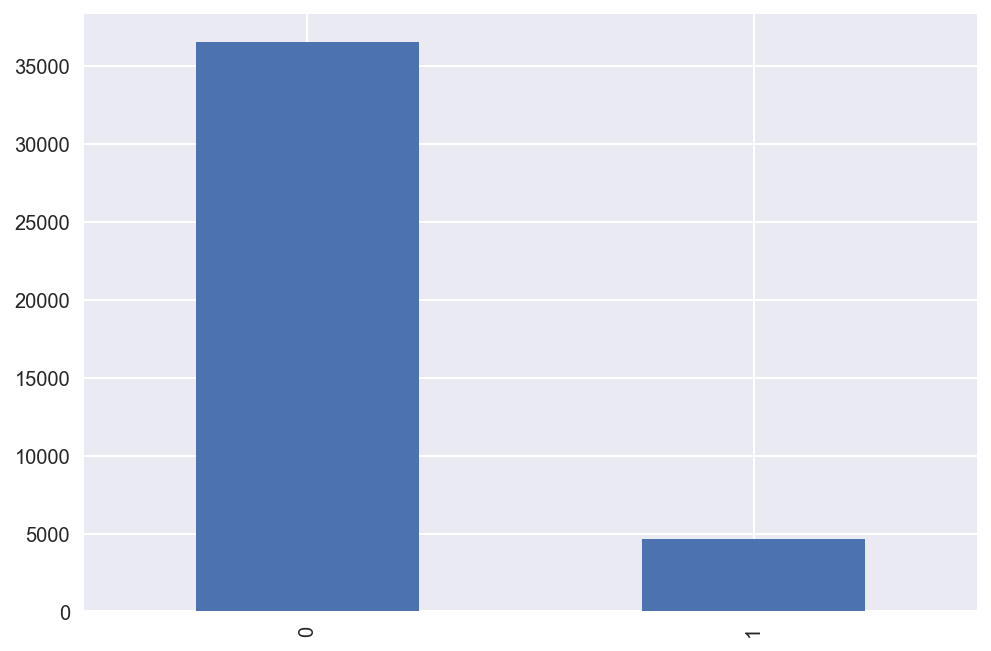

In [11]:
print(bank_df['y'].value_counts())
bank_df['y'].value_counts().plot.bar()

It is an imbalance classification. The Yes accounts for 11.2%. Before training models, I will use up-sampling to balance it.

### 3.3 Explore the number of values of each category.

In [12]:
from IPython.display import HTML, display
def display_html_ratio_table(data, cols):
    
    df_shape = data.shape
    
    for i in range(len(cols)):
        
        html = "<table>"
        html += "<tr><td>name</td><td>count</td><td>ratio</td></tr>"
        
        g = data.iloc[:,i].value_counts()

        print(cols[i])
        
        for index, value in g.items():
            html += "<tr><td>%s</td><td>%d</td><td>%.4f</td></tr>" %(index, value, value / df_shape[0])

        html += "</table>"
        display(HTML(html))

display_html_ratio_table(bank_df[cnt_cols + categorical_cols], cnt_cols + categorical_cols)

age


name,count,ratio
31,1947,0.0473
32,1846,0.0448
33,1833,0.0445
36,1780,0.0432
35,1759,0.0427
34,1745,0.0424
30,1714,0.0416
37,1475,0.0358
29,1453,0.0353
39,1432,0.0348


campaign


name,count,ratio
1,17642,0.4283
2,10570,0.2566
3,5341,0.1297
4,2651,0.0644
5,1599,0.0388
6,979,0.0238
7,629,0.0153
8,400,0.0097
9,283,0.0069
10,225,0.0055


pdays


name,count,ratio
999,39673,0.9632
3,439,0.0107
6,412,0.0100
4,118,0.0029
9,64,0.0016
2,61,0.0015
7,60,0.0015
12,58,0.0014
10,52,0.0013
5,46,0.0011


previous


name,count,ratio
0,35563,0.8634
1,4561,0.1107
2,754,0.0183
3,216,0.0052
4,70,0.0017
5,18,0.0004
6,5,0.0001
7,1,0.0000


job


name,count,ratio
admin.,10422,0.2530
blue-collar,9254,0.2247
technician,6743,0.1637
services,3969,0.0964
management,2924,0.0710
retired,1720,0.0418
entrepreneur,1456,0.0354
self-employed,1421,0.0345
housemaid,1060,0.0257
unemployed,1014,0.0246


marital


name,count,ratio
married,24928,0.6052
single,11568,0.2809
divorced,4612,0.1120
unknown,80,0.0019


education


name,count,ratio
university.degree,12168,0.2954
high.school,9515,0.2310
basic.9y,6045,0.1468
professional.course,5243,0.1273
basic.4y,4176,0.1014
basic.6y,2292,0.0556
unknown,1731,0.0420
illiterate,18,0.0004


default


name,count,ratio
no,32588,0.7912
unknown,8597,0.2087
yes,3,0.0001


housing


name,count,ratio
yes,21576,0.5238
no,18622,0.4521
unknown,990,0.0240


loan


name,count,ratio
no,33950,0.8243
yes,6248,0.1517
unknown,990,0.0240


contact


name,count,ratio
cellular,26144,0.6347
telephone,15044,0.3653


month


name,count,ratio
may,13769,0.3343
jul,7174,0.1742
aug,6178,0.1500
jun,5318,0.1291
nov,4101,0.0996
apr,2632,0.0639
oct,718,0.0174
sep,570,0.0138
mar,546,0.0133
dec,182,0.0044


day_of_week


name,count,ratio
thu,8623,0.2094
mon,8514,0.2067
wed,8134,0.1975
tue,8090,0.1964
fri,7827,0.1900


poutcome


name,count,ratio
nonexistent,35563,0.8634
failure,4252,0.1032
success,1373,0.0333


age can be convert into bins then convert into ordinal variable.

### 3.4 Explore the categories by bar plots

<AxesSubplot:>

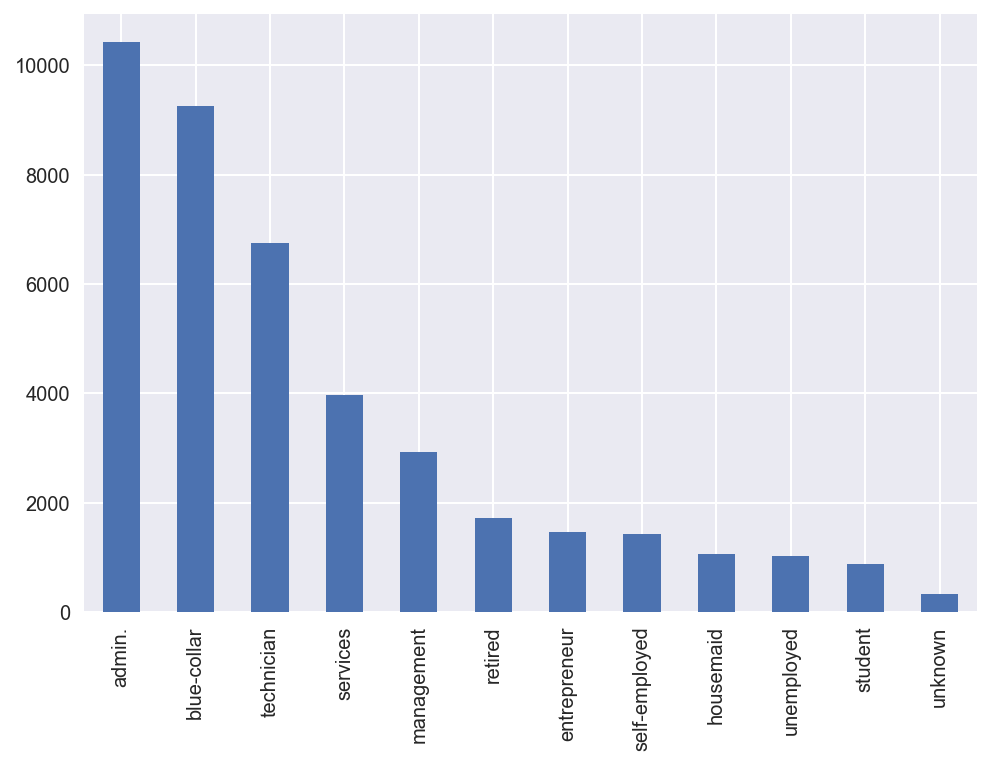

In [14]:
bank_df['job'].value_counts().plot.bar()

The count of admin, blue-collar, and technician is over 6000. The top 5 account for over 50% in total.

<AxesSubplot:>

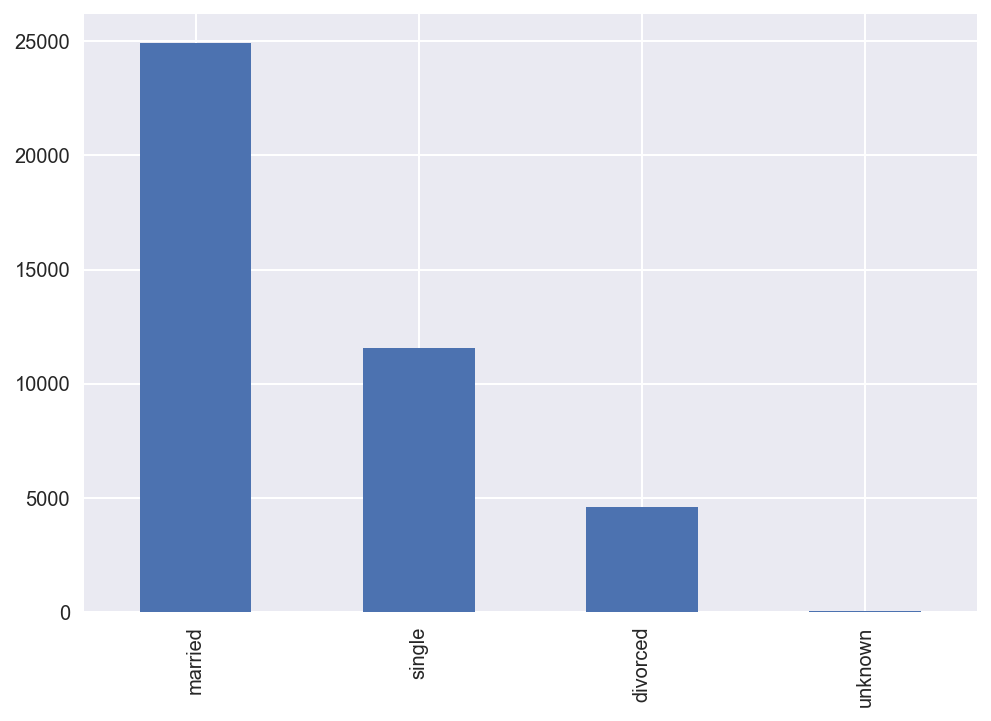

In [15]:
bank_df['marital'].value_counts().plot.bar()

The number of Married customers is the highest in all marital.

<AxesSubplot:>

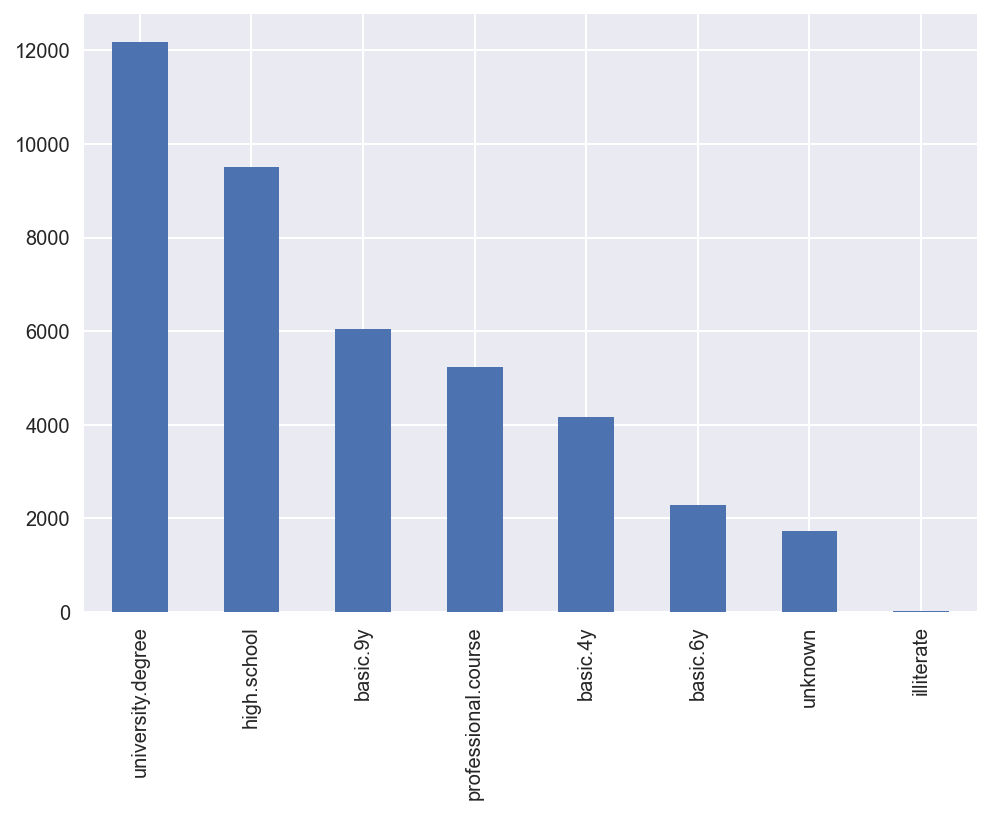

In [16]:
bank_df['education'].value_counts().plot.bar()

The number of customers with higher education is large than the figure for customers with low education.

<AxesSubplot:>

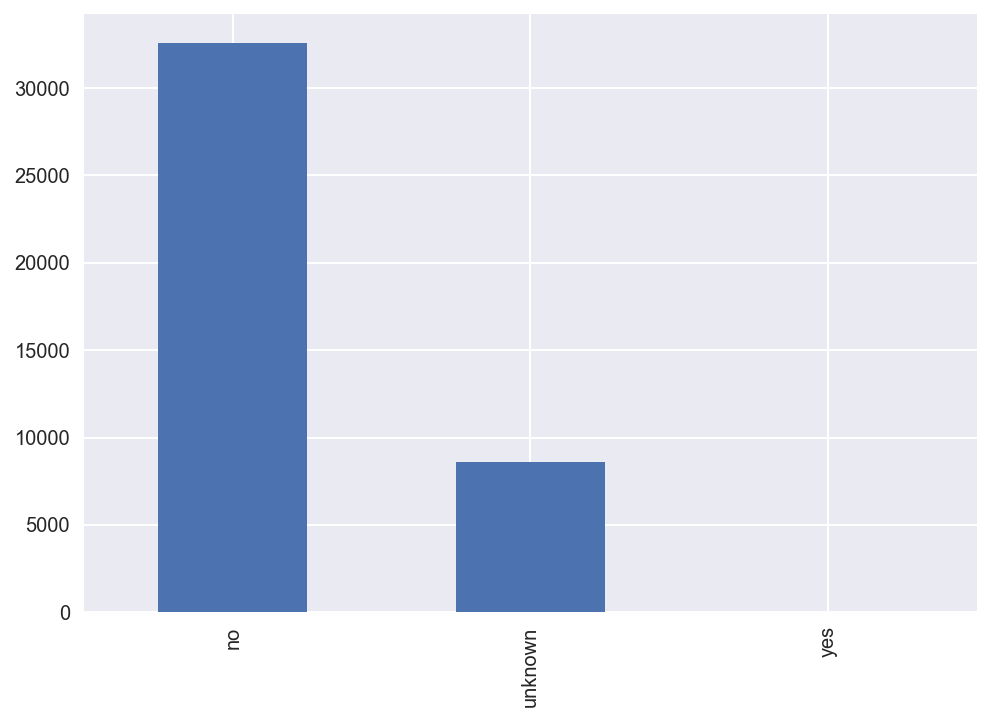

In [17]:
bank_df['default'].value_counts().plot.bar()

default: has credit in default? (categorical: 'no','yes','unknown')

Most of customers do not have credit.

<AxesSubplot:>

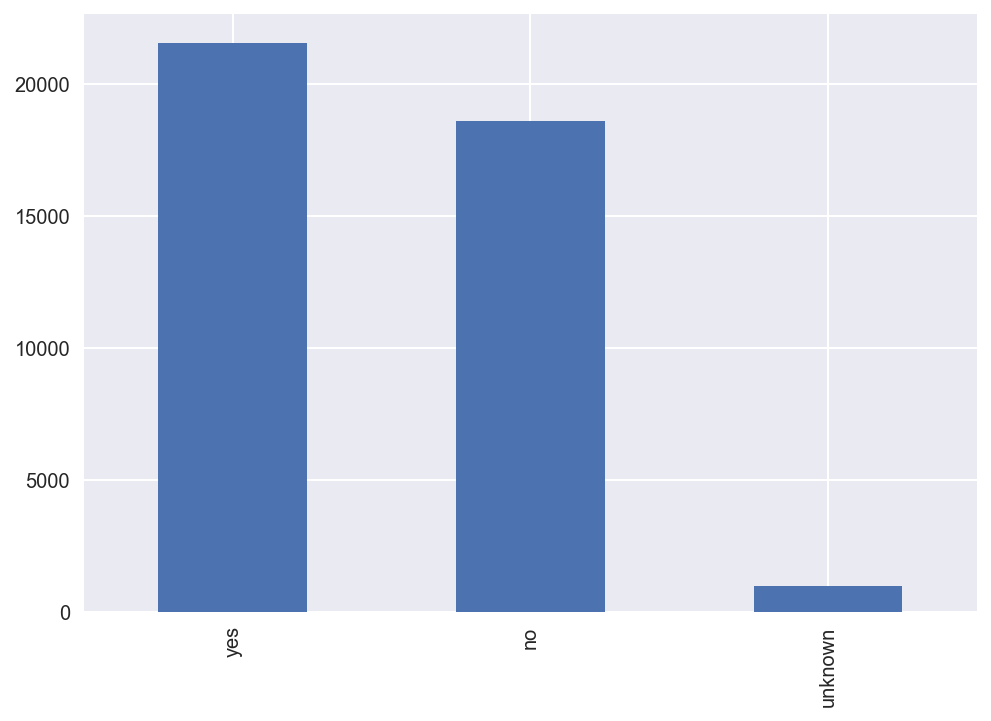

In [18]:
bank_df['housing'].value_counts().plot.bar()

The number of customers with and without housing is close.

<AxesSubplot:>

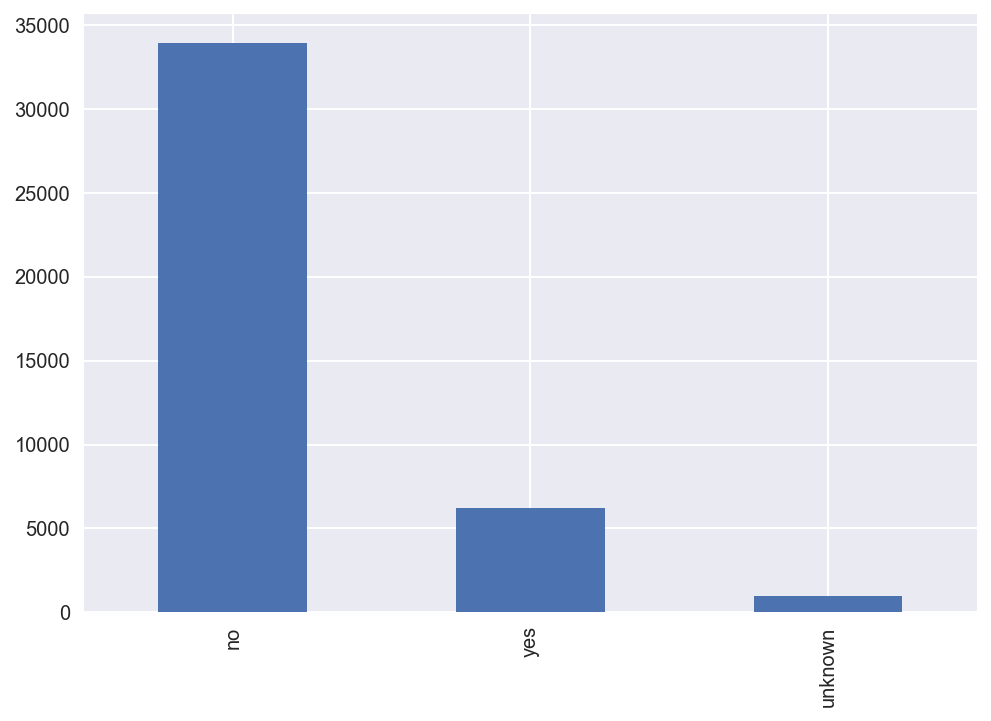

In [19]:
bank_df['loan'].value_counts().plot.bar()

Over 1/8 customers have loan.

<AxesSubplot:>

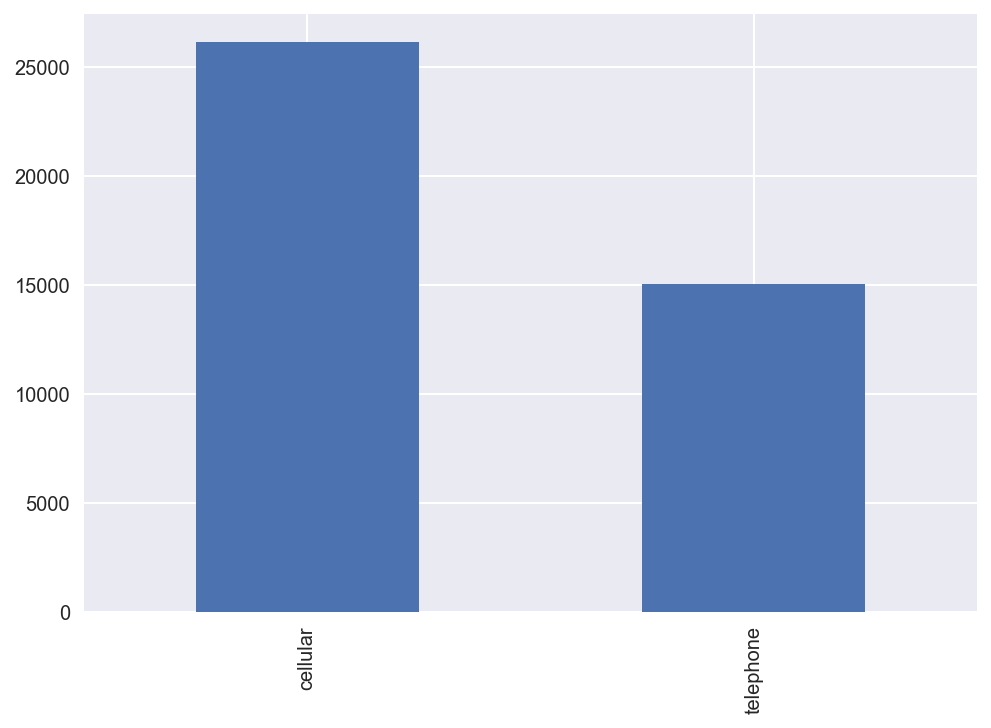

In [20]:
bank_df['contact'].value_counts().plot.bar()

The number of cell phone customers is larger than the number of telephone customers.

<AxesSubplot:>

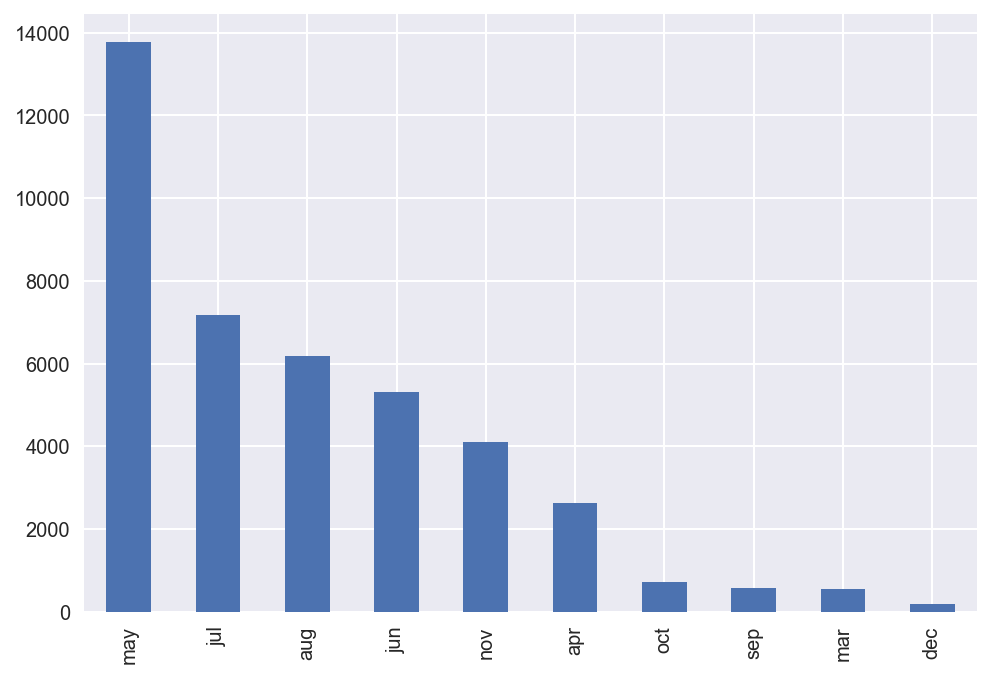

In [21]:
bank_df['month'].value_counts().plot.bar()

The number of a contact in May is the highest in all 12 months of the year.

<AxesSubplot:>

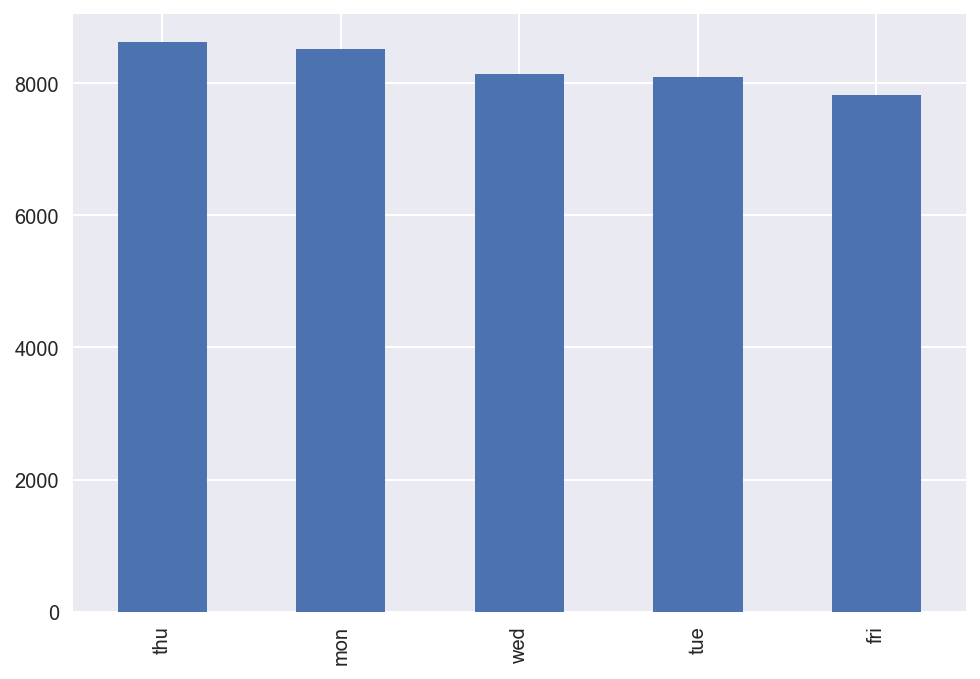

In [22]:
bank_df['day_of_week'].value_counts().plot.bar()

The number of a contact on Thursday and Monday are higher than on other days.

<AxesSubplot:>

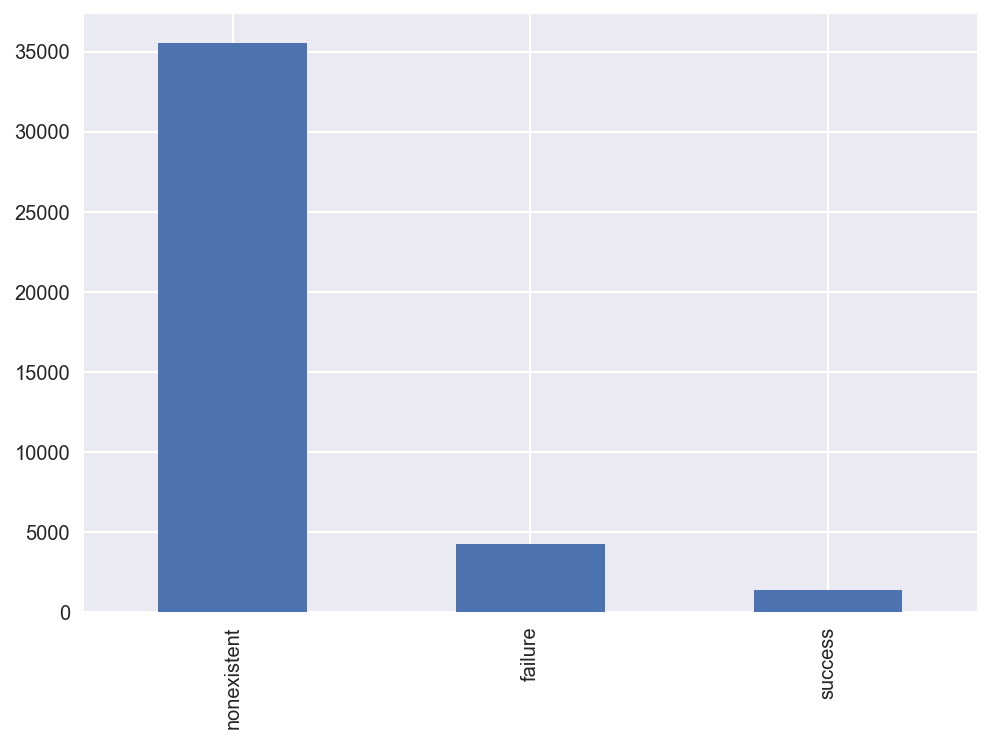

In [23]:
bank_df['poutcome'].value_counts().plot.bar()

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

The number of nonexistent is the highest in 3 types.

### 3.5 Explore the Relationship between categories and response (categorical response)

https://bookdown.org/jhvdz1/dataanalytics/association-analysis.html

I will use Side by side bar chart and Chi-Square Test to examine the Relationship between categories and response (categorical response)

- Side by side bar

- Chi-Square Test
    
    https://www.statology.org/chi-square-test-of-independence-python/
    
    A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables.
    
    __Example:__
    
    Recall that the Chi-Square Test of Independence uses the following null and alternative hypotheses:

    H0: (null hypothesis) The two variables are independent.
    
    H1: (alternative hypothesis) The two variables are not independent.
    
    Since the p-value (.649) of the test is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that there is an association between Category A and Category B preference.

In [24]:
# Run the Chi2 test
import scipy.stats as stats

def my_chi2_test(data_df, cols, significate = 0.05):
    names = []
    statistics = []
    pvalues = []
    dgs = []
    
    for col in cols:
        
        # create cross table
        crs_tb = pd.crosstab(data_df['y'], data_df[col])
        
        #perform the Chi-Square Test of Independence
        statistic, pvalue, Degrees, expected = stats.chi2_contingency(crs_tb.to_numpy())
        
        if (pvalue < significate):
            names.append(col)
            statistics.append(statistic)
            pvalues.append(float(pvalue))
            dgs.append(Degrees)

        
    dic = {"col_name": names, "statistics" : statistics, "pvalues": pvalues, "degrees":dgs}
    return pd.DataFrame(dic)



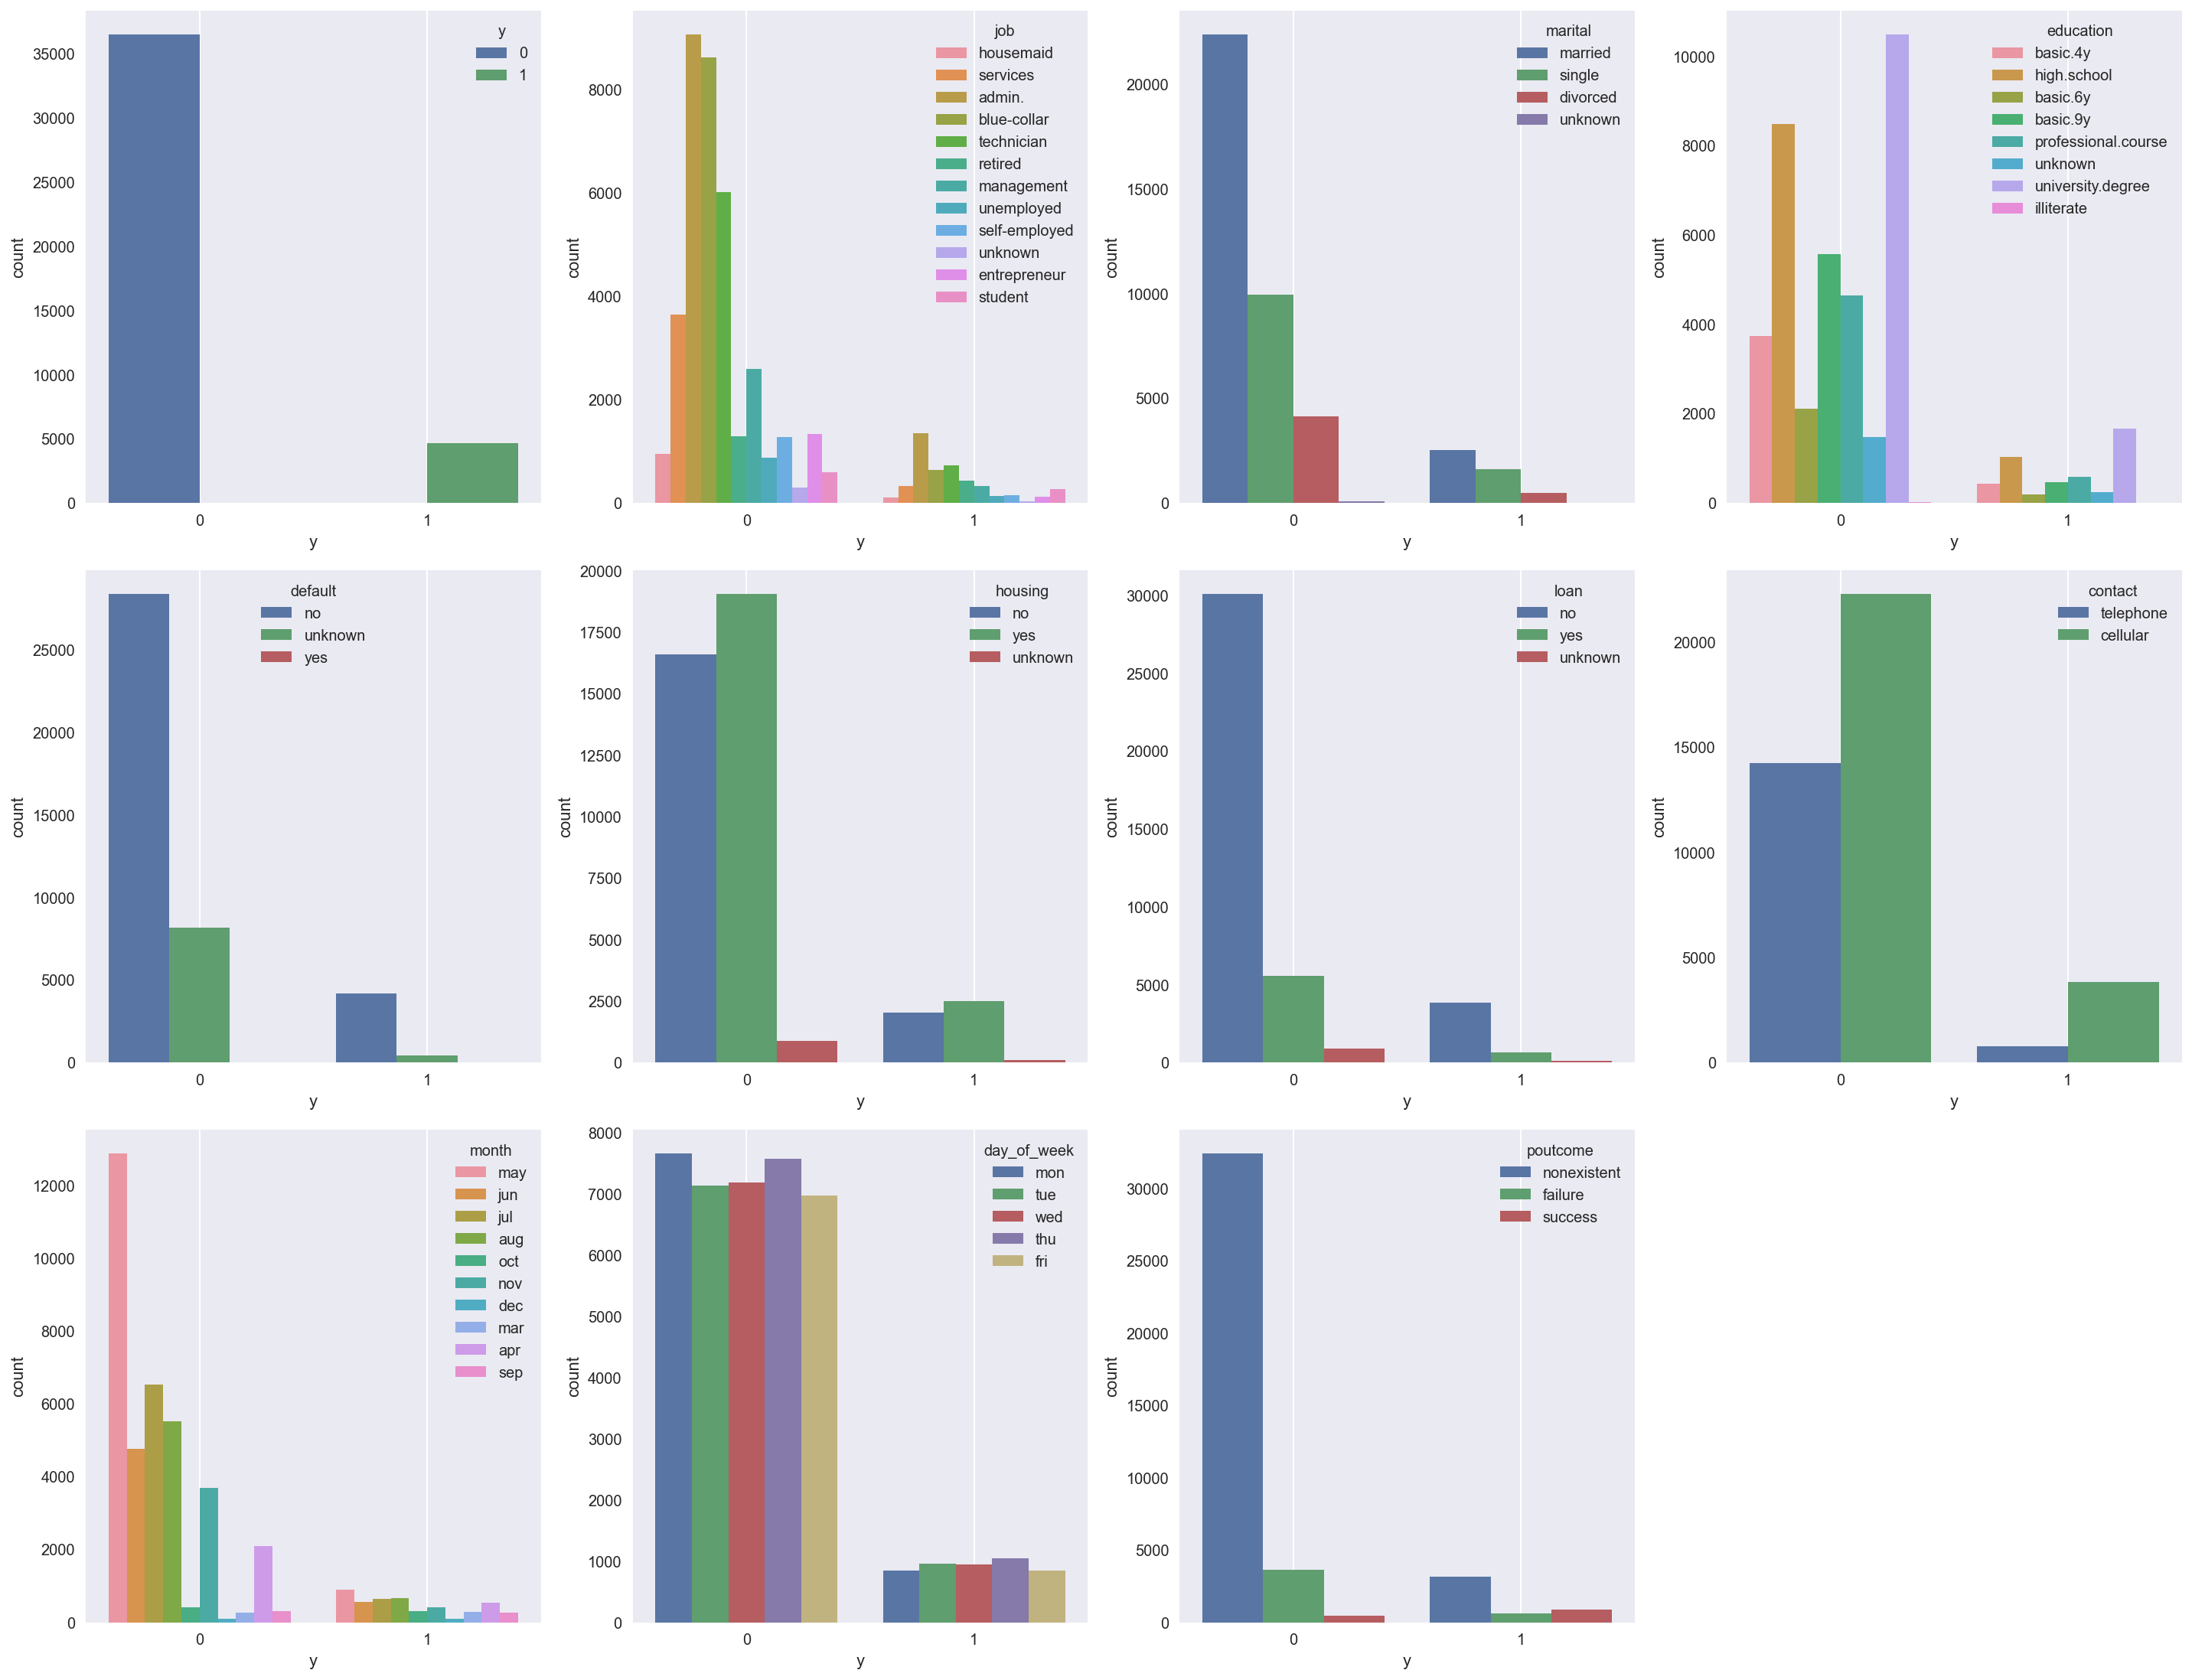

In [25]:
# To use bar charts to compare pairs of variables between Response and Explanatory
plt.figure(figsize = (20, 20))
for i, col in enumerate(list(['y'] + categorical_cols)):
    plt.subplot(4, 4, i + 1)
    # sns.countplot(x=col, data=re_eda_df, color='blue')
    sns.countplot(x='y', hue=col, data=bank_df)
    plt.grid()
    plt.tight_layout()

From the above bar plots, We can see the job, contact and month have different frequency bars for response = 1. They could be used to perdict the response.

#### Chi2 test

In [26]:
# Run Chi2 test
category_chi2 = my_chi2_test(bank_df, categorical_cols)

# only show the statistics result
category_chi2.sort_values(by='statistics', ascending=False)

,col_name,statistics,pvalues,degrees
7,poutcome,4230.523798,0.000000e+00,2
5,month,3101.149351,0.000000e+00,9
0,job,961.242440,4.189763e-199,11
4,contact,862.318364,1.525986e-189,1
3,default,406.577515,5.161958e-89,2
2,education,193.105905,3.305189e-38,7
1,marital,122.655152,2.068015e-26,3
6,day_of_week,26.144939,2.958482e-05,4


From the above chi2 table, We can see the job, contact and month have higher value than competitors. They could be used to perdict the response.

###  3.6 Explore the numerical variables

In [27]:
# using histogram and boxplot to see the percentage variables
def hist_box(data_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Histogram of " + col)
    sns.histplot(data_df[col], bins = 50, ax=axes[0])
    
    axes[1].set_title("Boxplot of " + col)
    sns.boxplot(y=data_df[col], orient="v",ax=axes[1])
    
def show_statistic(data_df, col):
    
    count = data_df[col].count()
    mean = data_df[col].mean()
    var = data_df[col].var()
    std = data_df[col].std()
    q1 = data_df[col].quantile(.25)
    q2 = data_df[col].quantile(.50)
    q3 = data_df[col].quantile(.75)
    d_min= data_df[col].min()
    d_max = data_df[col].max()
    sigema = 3.0
    
    del_outliers = data_df[np.abs(data_df[col] - mean ) > (sigema * std )]
    
    
    print("%s : count = %d, mean = %.4f, var = %.4f, std = %.4f, q1(25%%) = %.4f, q3(75%%) = %.4f, min = %.4f, max = %.4f" 
          %(col, count, mean, var, std, q1, q3, d_min, d_max))
    
    if del_outliers.shape[0] > 0:
        out_num = del_outliers.shape[0]
        out_pct = (out_num / data_df[col].shape[0]) * 100
        print("It has %d ourliers larger than (mean + 3*std), account for %.4f %%" %(out_num, out_pct))

age : count = 41188, mean = 40.0241, var = 108.6025, std = 10.4212, q1(25%) = 32.0000, q3(75%) = 47.0000, min = 17.0000, max = 98.0000
It has 369 ourliers larger than (mean + 3*std), account for 0.8959 %


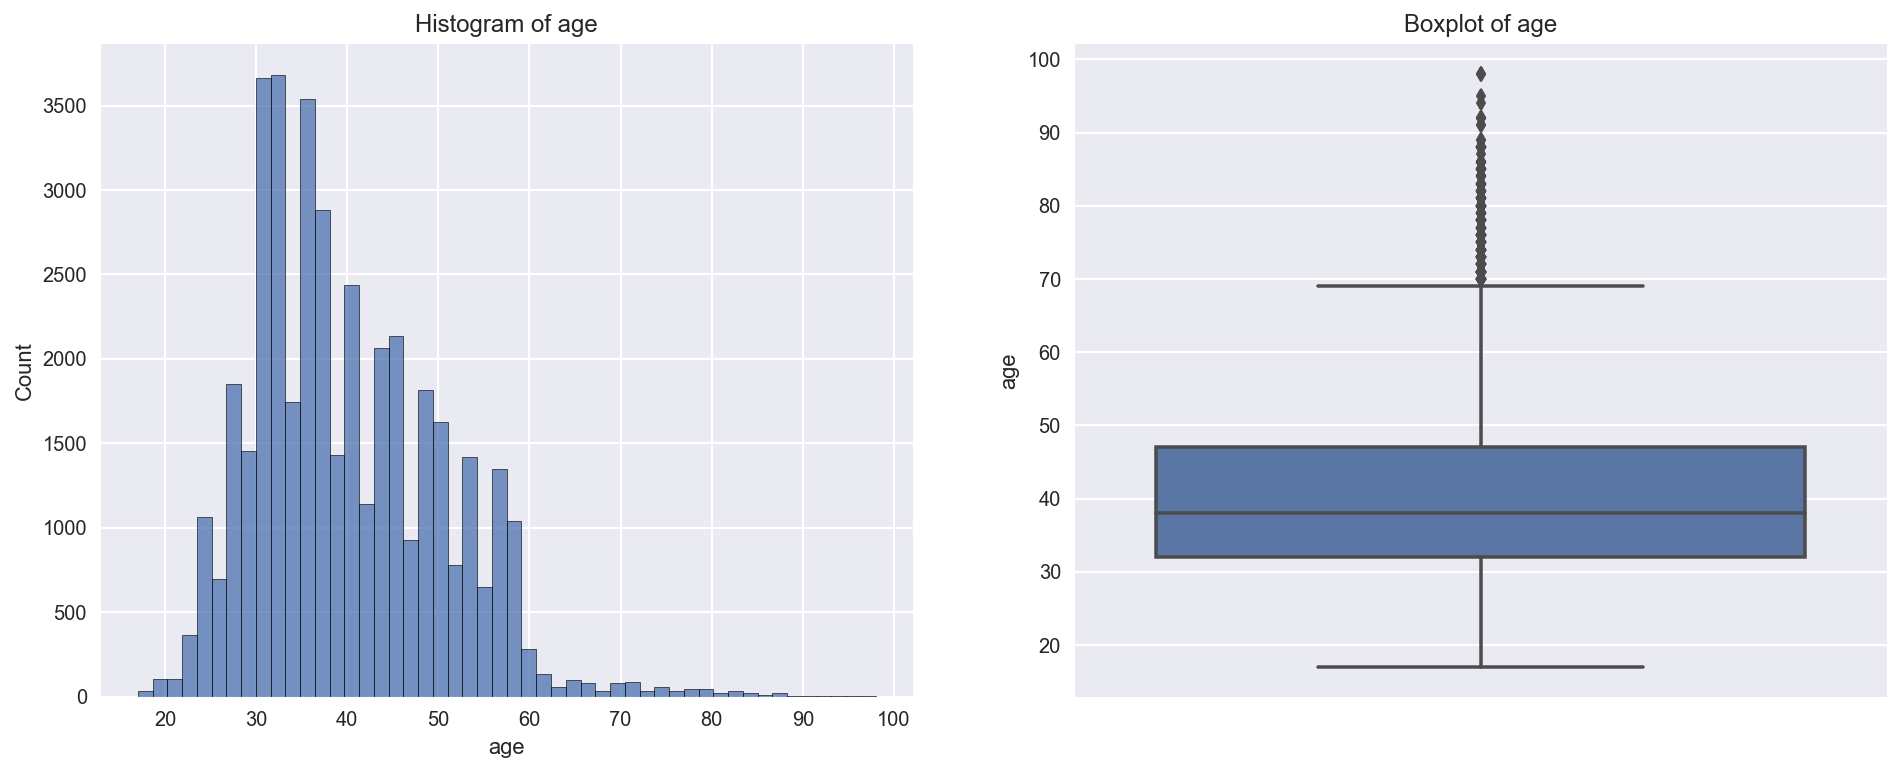

In [28]:
# age
hist_box(bank_df, 'age')
show_statistic(bank_df, 'age')

age shows a left skewed distribution. Outliters need to be dealt with.

campaign : count = 41188, mean = 2.5676, var = 7.6730, std = 2.7700, q1(25%) = 1.0000, q3(75%) = 3.0000, min = 1.0000, max = 56.0000
It has 869 ourliers larger than (mean + 3*std), account for 2.1098 %


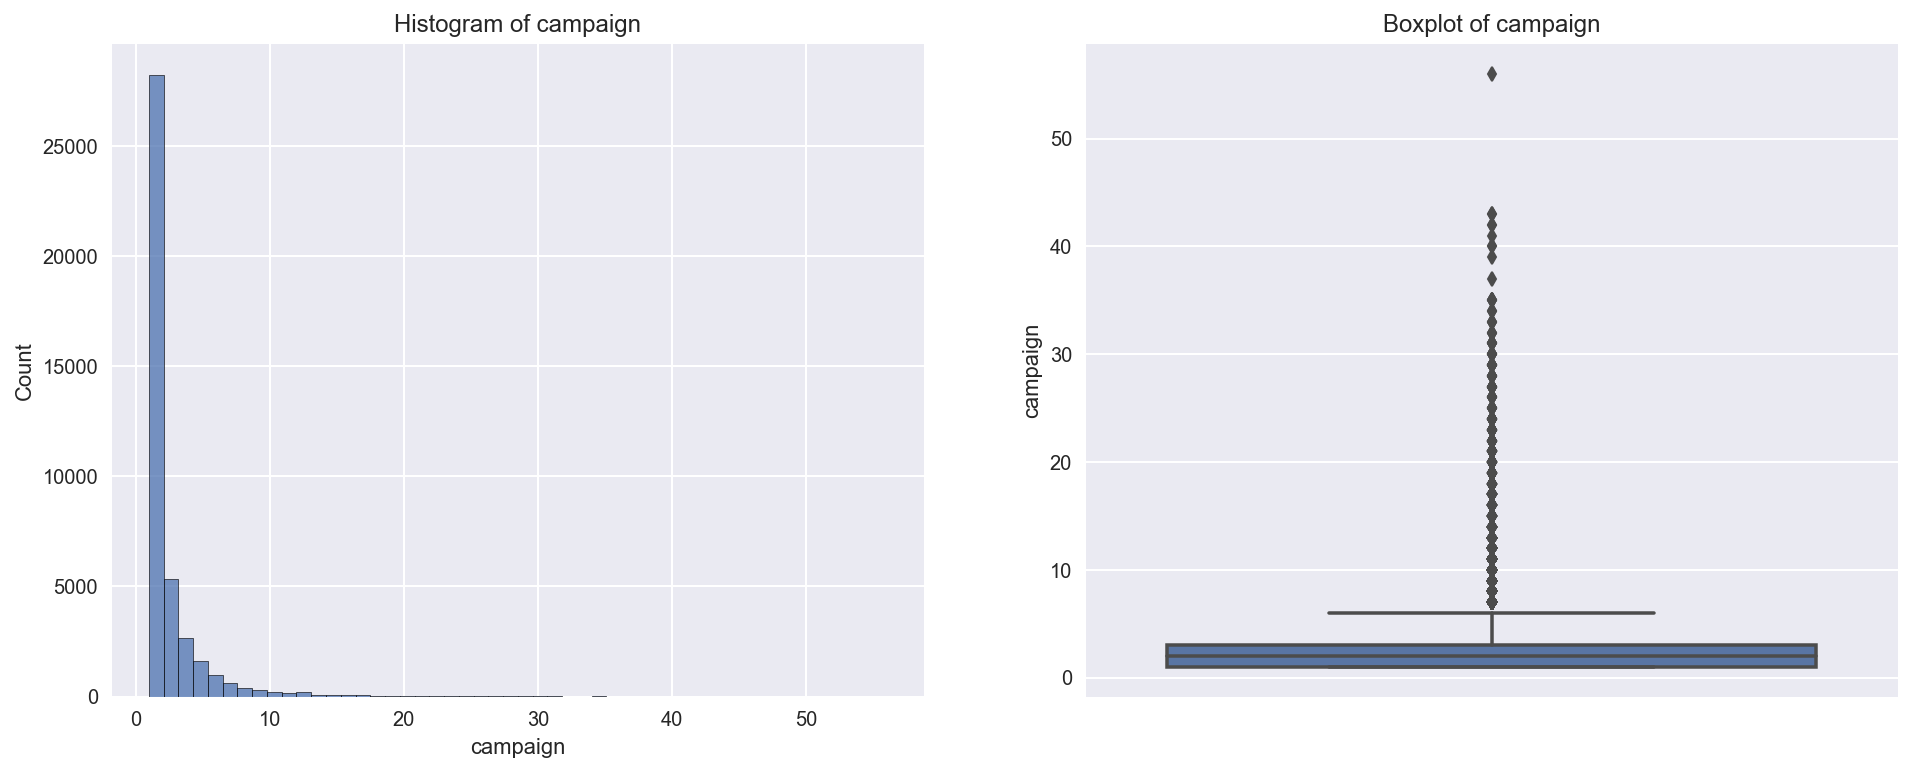

In [29]:
# campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
hist_box(bank_df, 'campaign')
show_statistic(bank_df, 'campaign')

campaign shows a left skewed distribution. Outliters need to be dealt with.

pdays : count = 41188, mean = 962.4755, var = 34935.6873, std = 186.9109, q1(25%) = 999.0000, q3(75%) = 999.0000, min = 0.0000, max = 999.0000
It has 1515 ourliers larger than (mean + 3*std), account for 3.6783 %


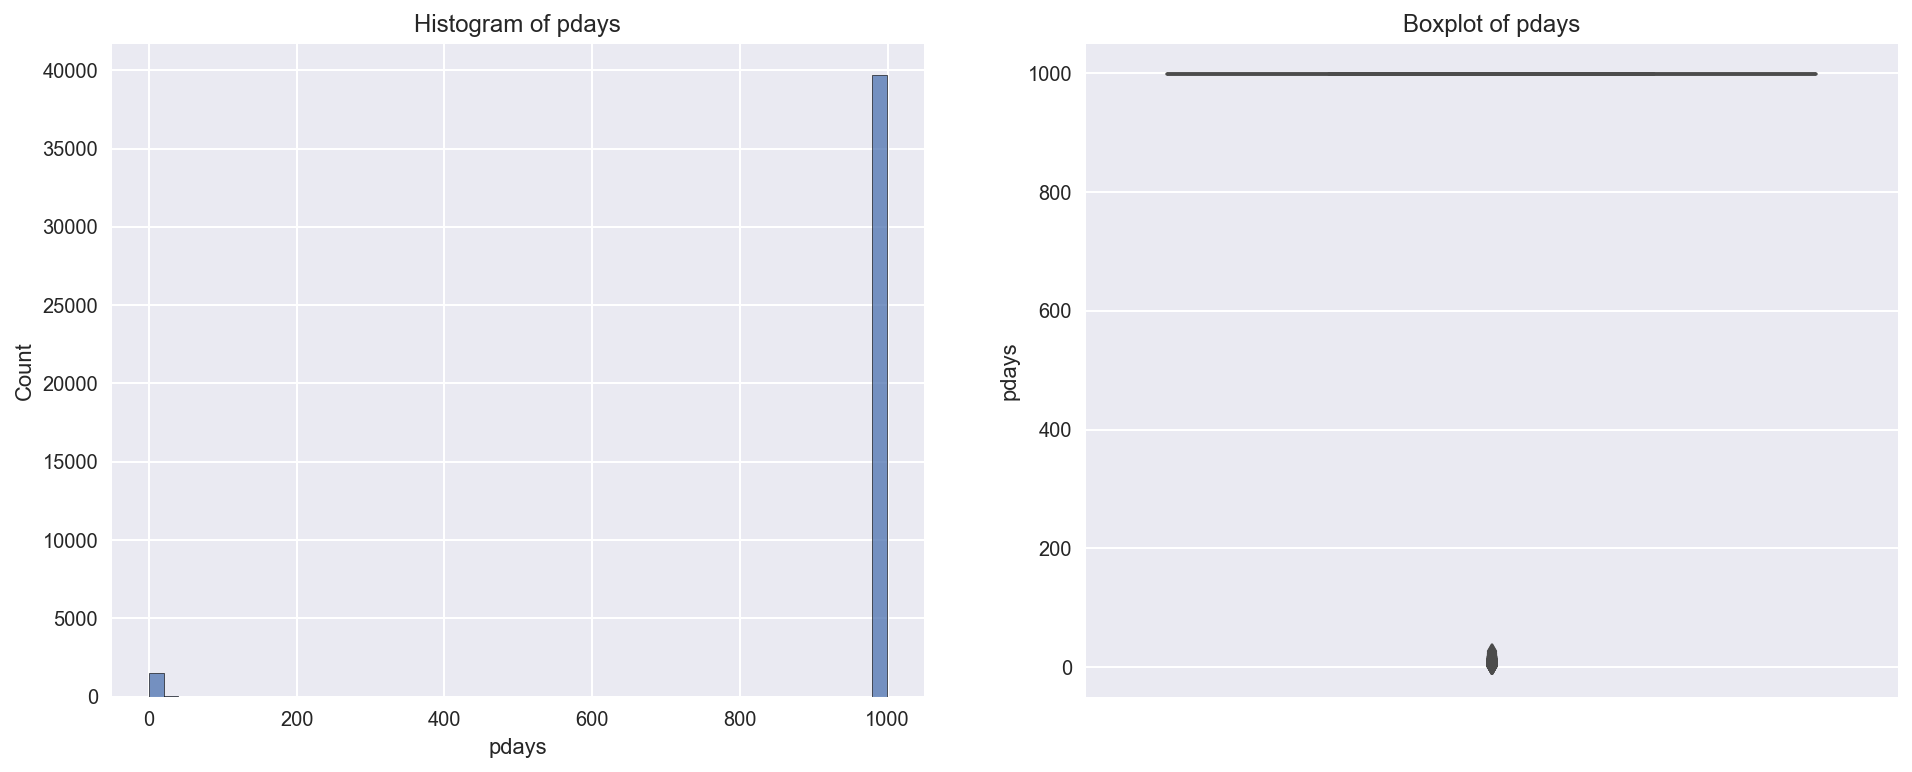

In [30]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign 
# (numeric; 999 means client was not previously contacted)
hist_box(bank_df, 'pdays')
show_statistic(bank_df, 'pdays')

pdays can be a non-negative discrete COUNT value. It does not need to process outliers

previous : count = 41188, mean = 0.1730, var = 0.2449, std = 0.4949, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 7.0000
It has 1064 ourliers larger than (mean + 3*std), account for 2.5833 %


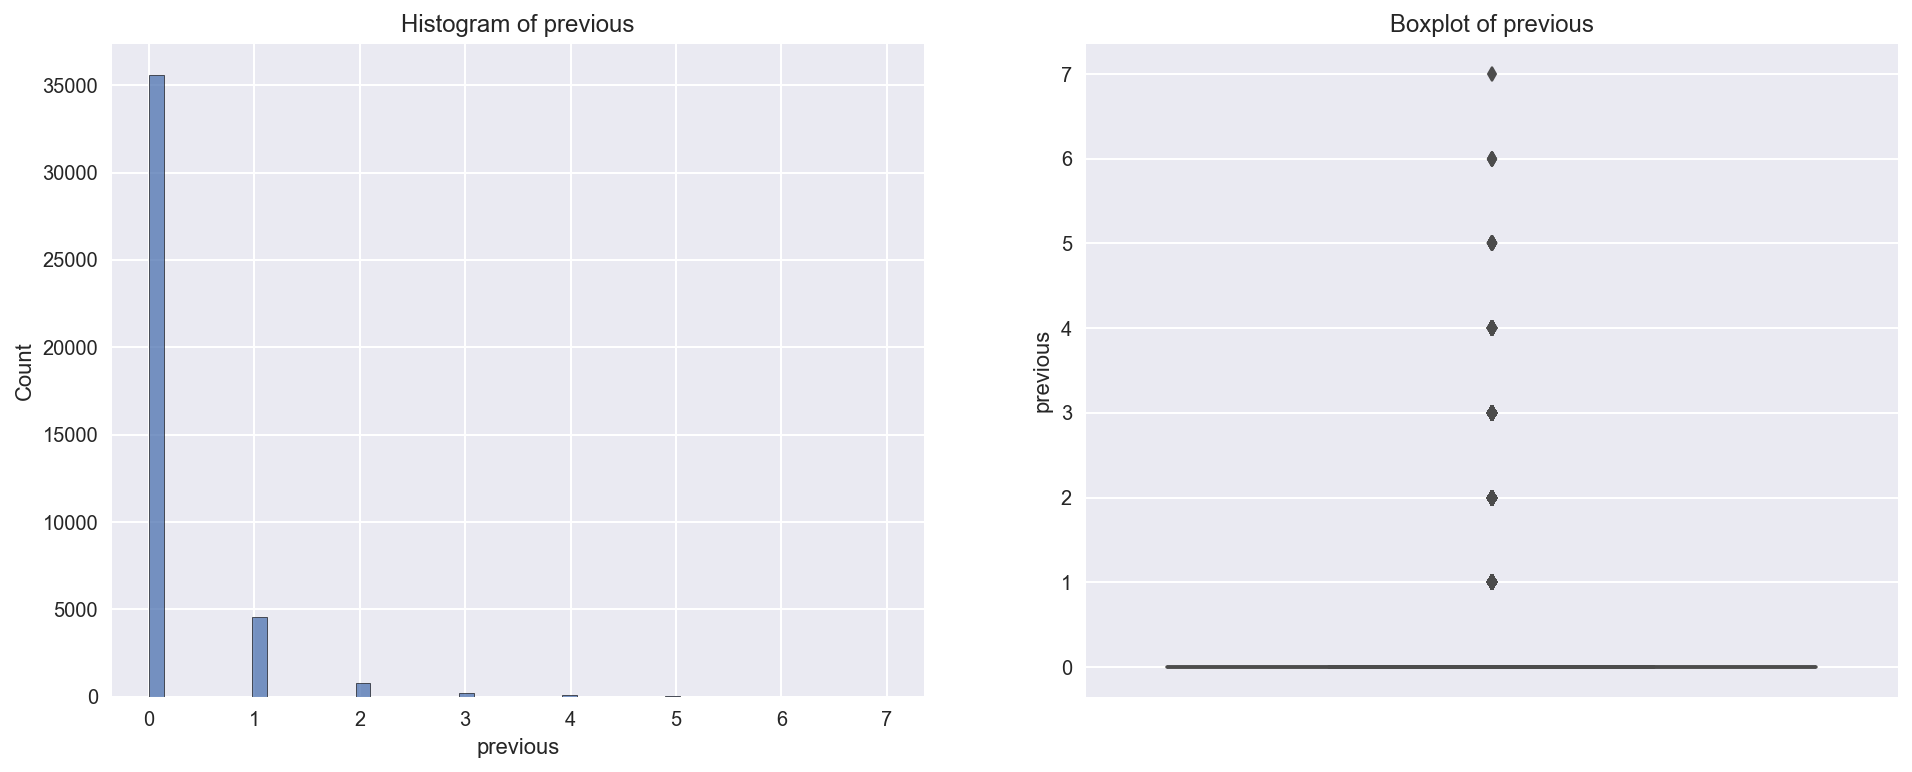

In [31]:
# previous: number of contacts performed before this campaign and for this client (numeric)
hist_box(bank_df, 'previous')
show_statistic(bank_df, 'previous')

previous can be a non-negative discrete COUNT value. It does not need to process outliers

emp.var.rate : count = 41188, mean = 0.0819, var = 2.4679, std = 1.5710, q1(25%) = -1.8000, q3(75%) = 1.4000, min = -3.4000, max = 1.4000


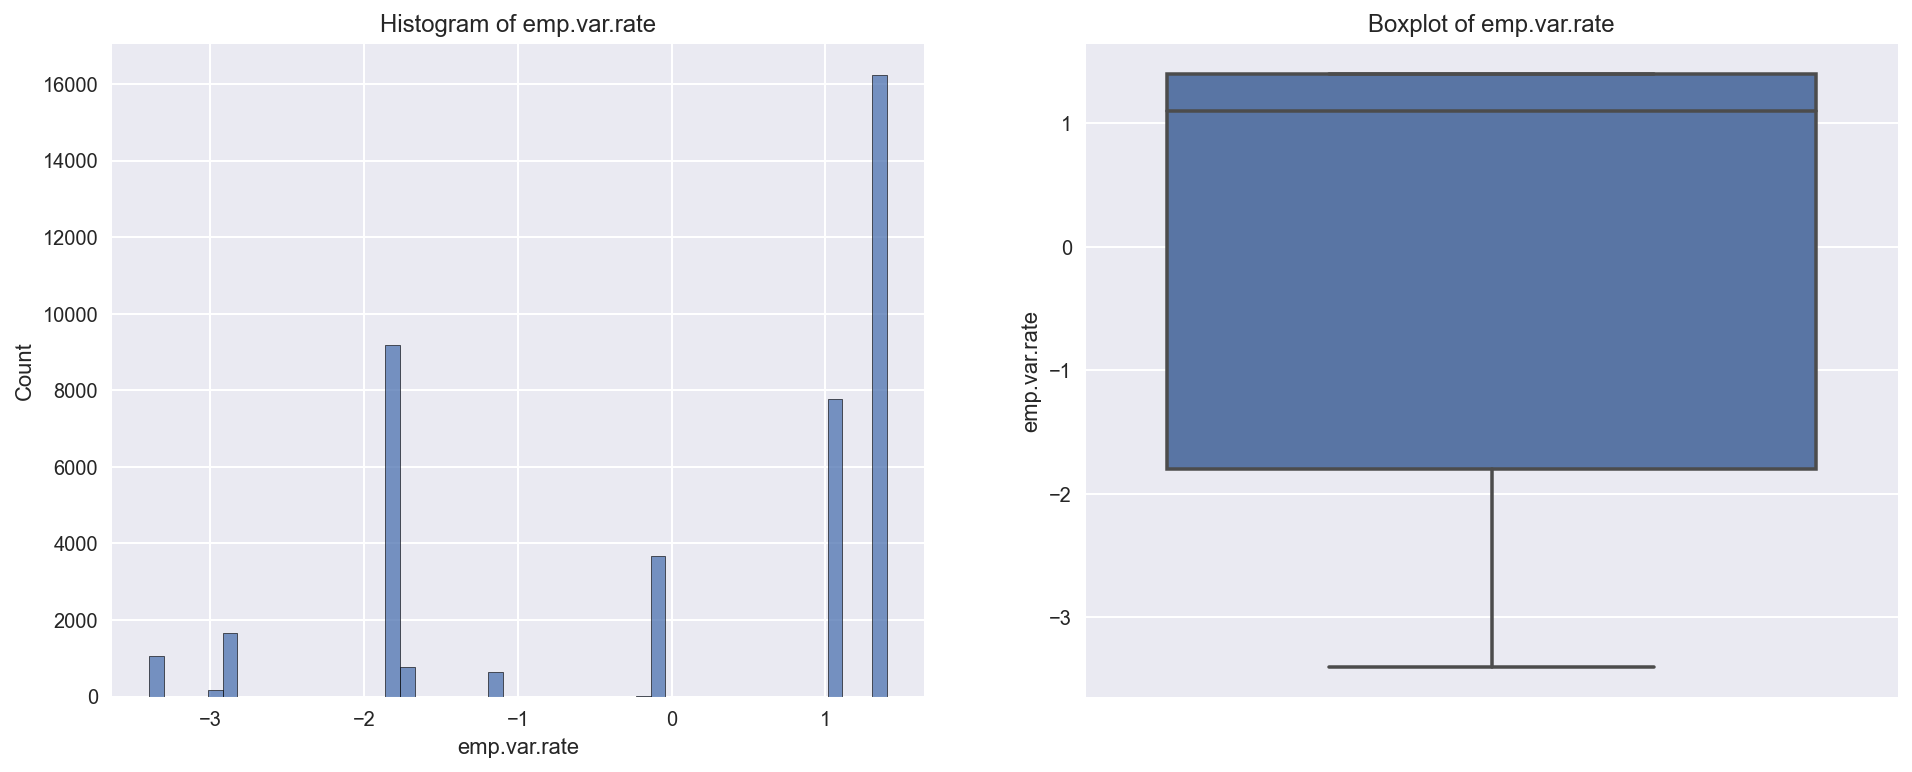

In [32]:
# emp.var.rate: employment variation rate - quarterly indicator (numeric)
hist_box(bank_df, 'emp.var.rate')
show_statistic(bank_df, 'emp.var.rate')

Although emp.var.rate has negative value, it is normal because it is quarter to quarter.

cons.price.idx : count = 41188, mean = 93.5757, var = 0.3351, std = 0.5788, q1(25%) = 93.0750, q3(75%) = 93.9940, min = 92.2010, max = 94.7670


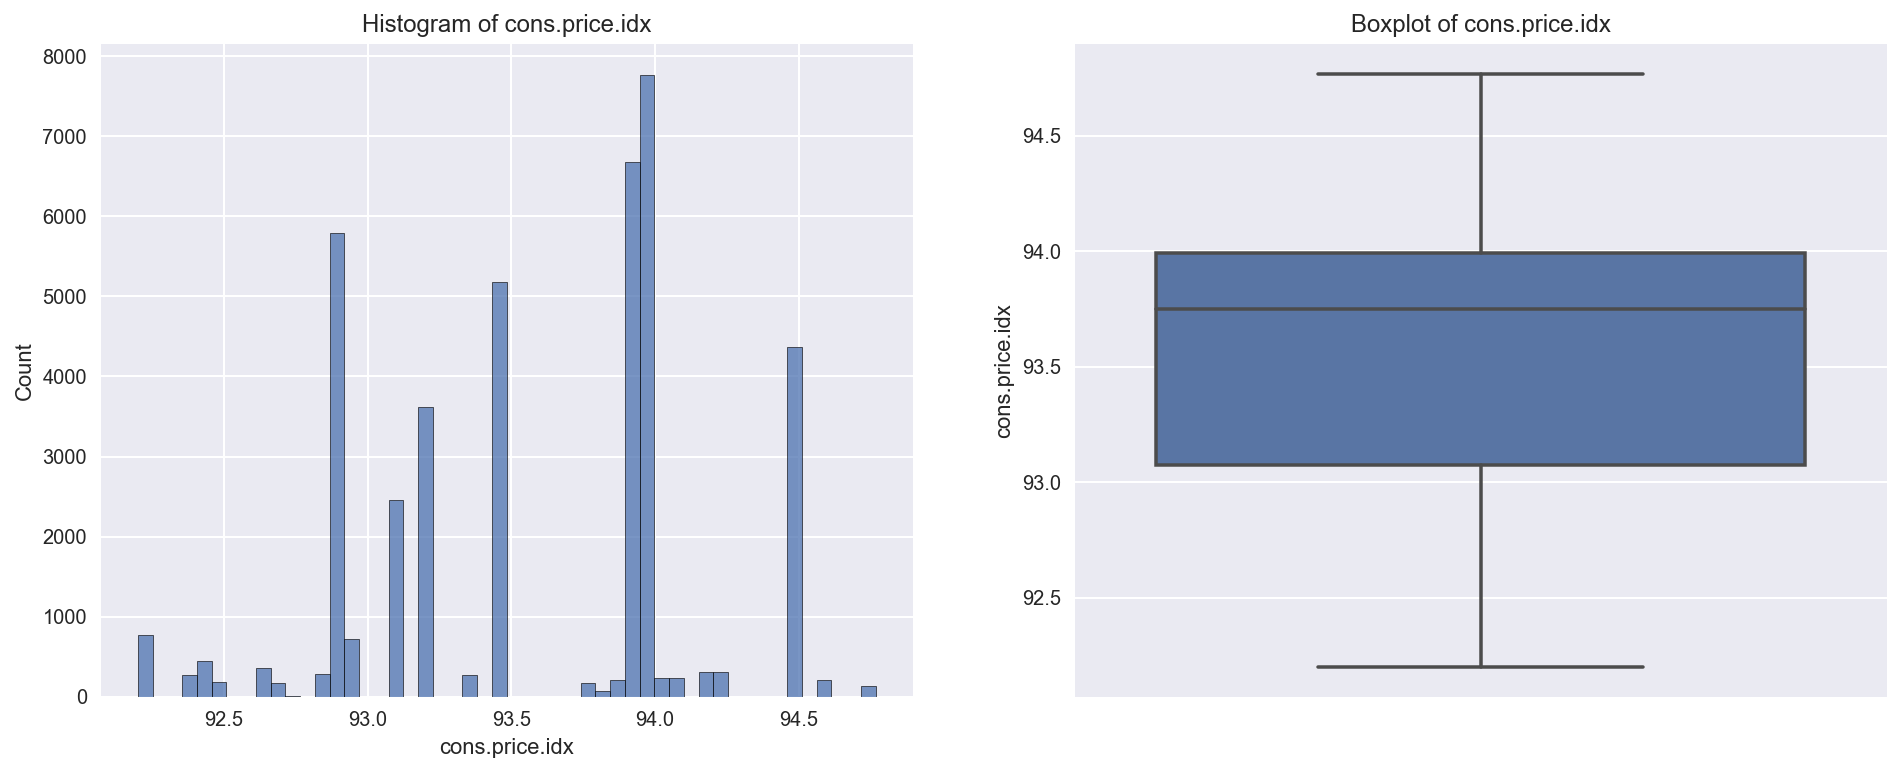

In [33]:
# cons.price.idx : consumer price index - monthly indicator (numeric)
hist_box(bank_df, 'cons.price.idx')
show_statistic(bank_df, 'cons.price.idx')

It has not outliers.

cons.conf.idx : count = 41188, mean = -40.5026, var = 21.4202, std = 4.6282, q1(25%) = -42.7000, q3(75%) = -36.4000, min = -50.8000, max = -26.9000


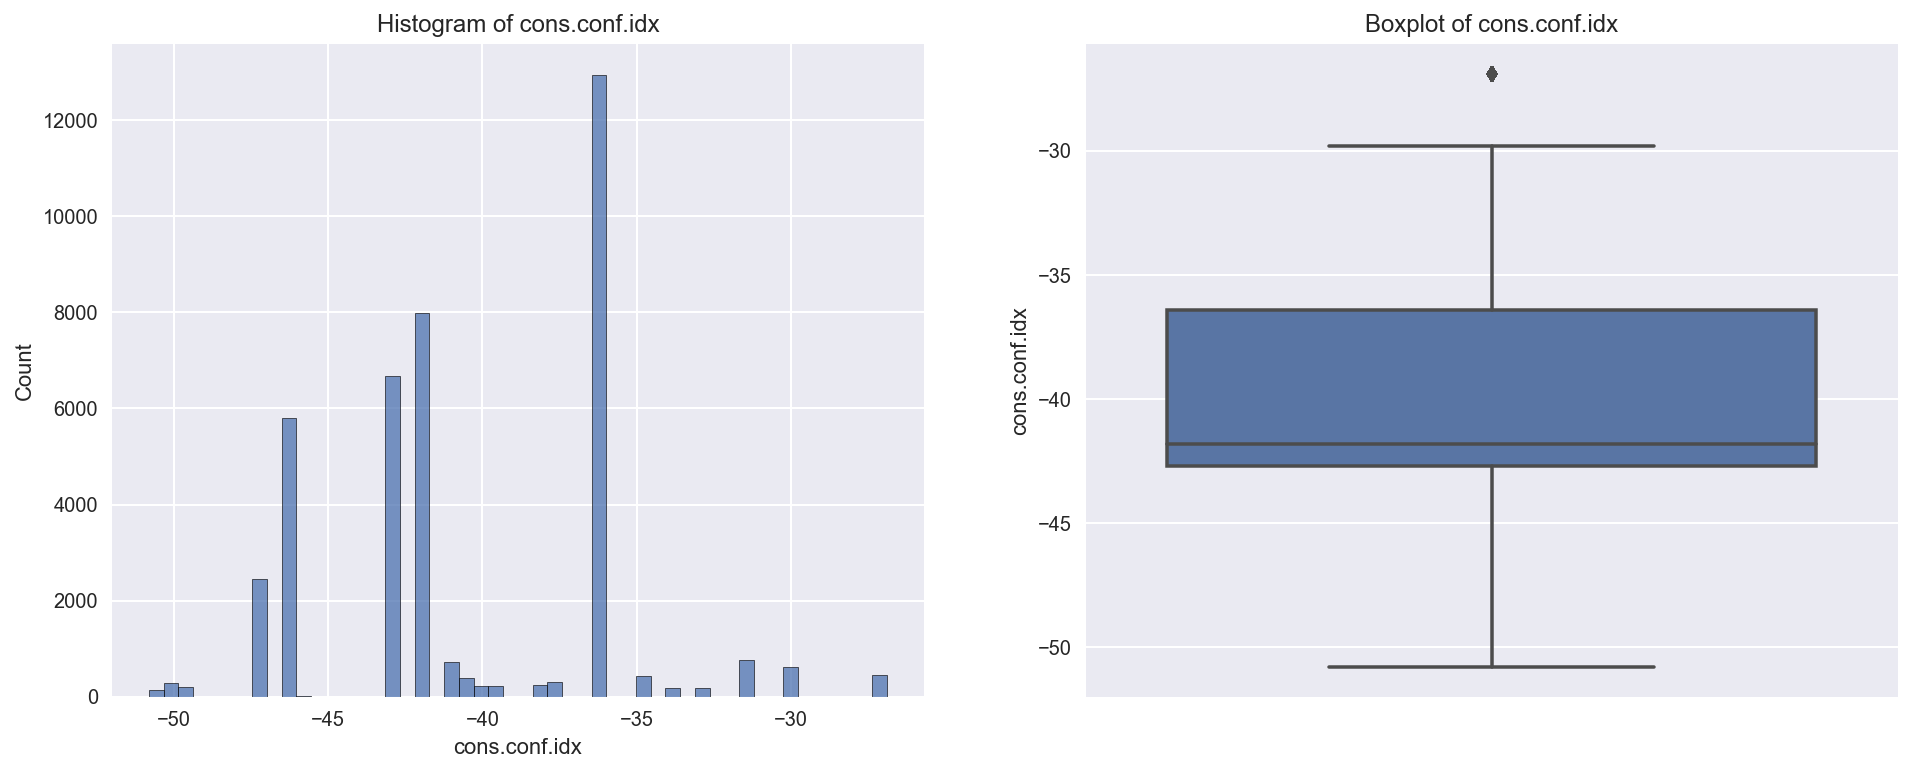

In [34]:
# cons.conf.idx: consumer confidence index - monthly indicator (numeric)
hist_box(bank_df, 'cons.conf.idx')
show_statistic(bank_df, 'cons.conf.idx')

Although cons.conf.idx has negative value, it is normal because it is month to month.

euribor3m : count = 41188, mean = 3.6213, var = 3.0083, std = 1.7344, q1(25%) = 1.3440, q3(75%) = 4.9610, min = 0.6340, max = 5.0450


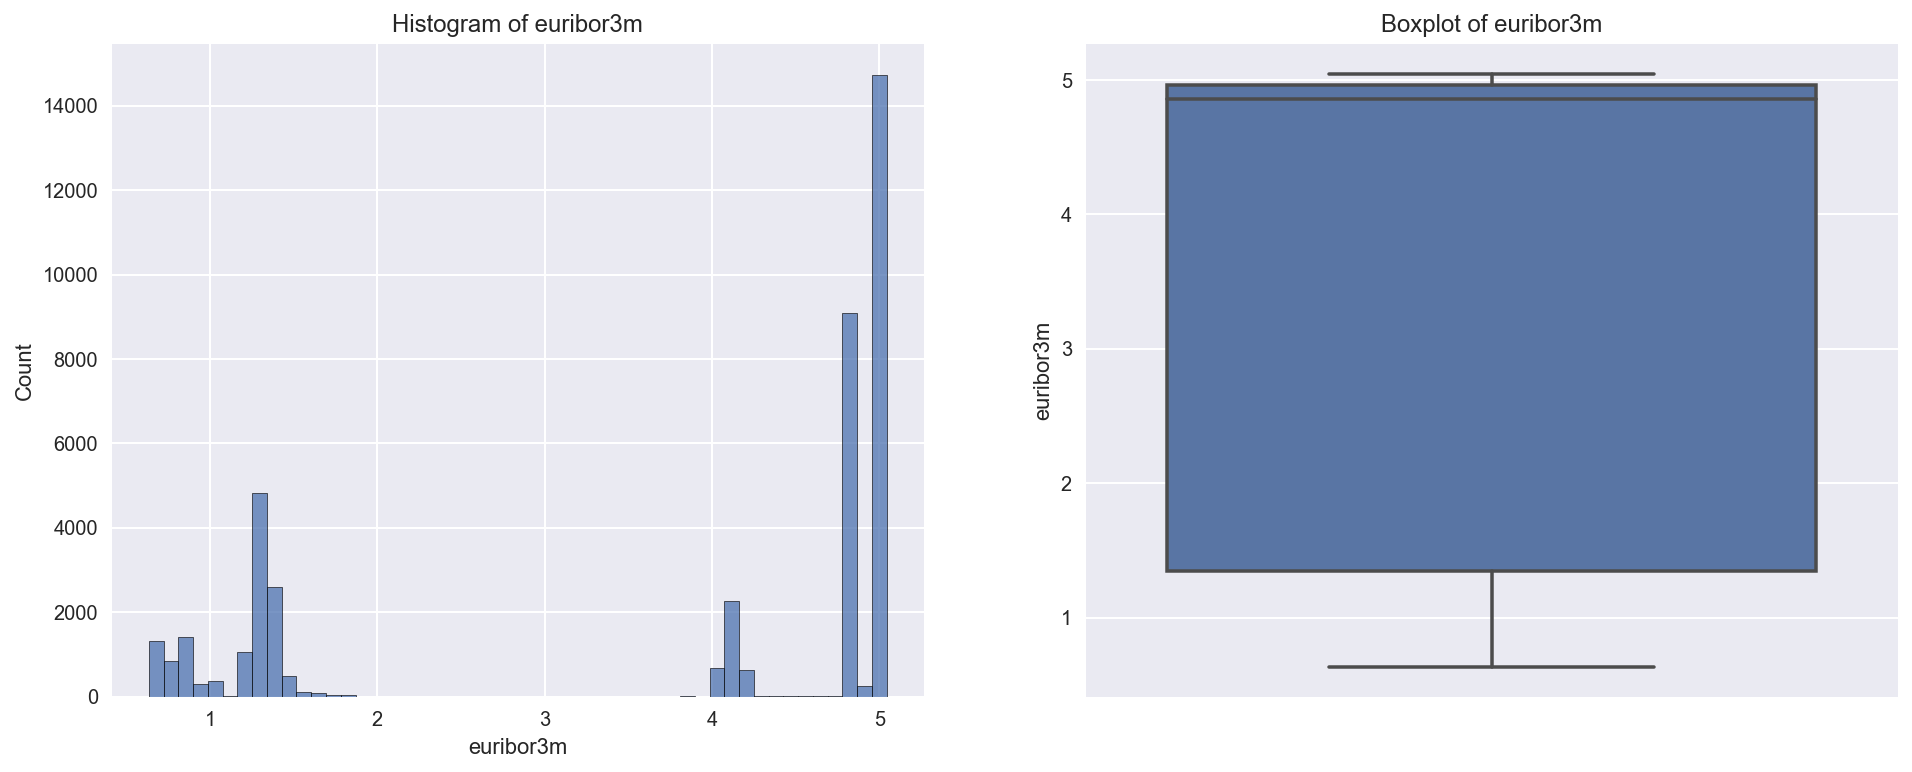

In [35]:
# euribor3m: euribor 3 month rate - daily indicator (numeric)
# euribor:（Euro Interbank Offered Rate）
hist_box(bank_df, 'euribor3m')
show_statistic(bank_df, 'euribor3m')

The median is very close to the Q3. It has not outliers.

nr.employed : count = 41188, mean = 5167.0359, var = 5220.2833, std = 72.2515, q1(25%) = 5099.1000, q3(75%) = 5228.1000, min = 4963.6000, max = 5228.1000


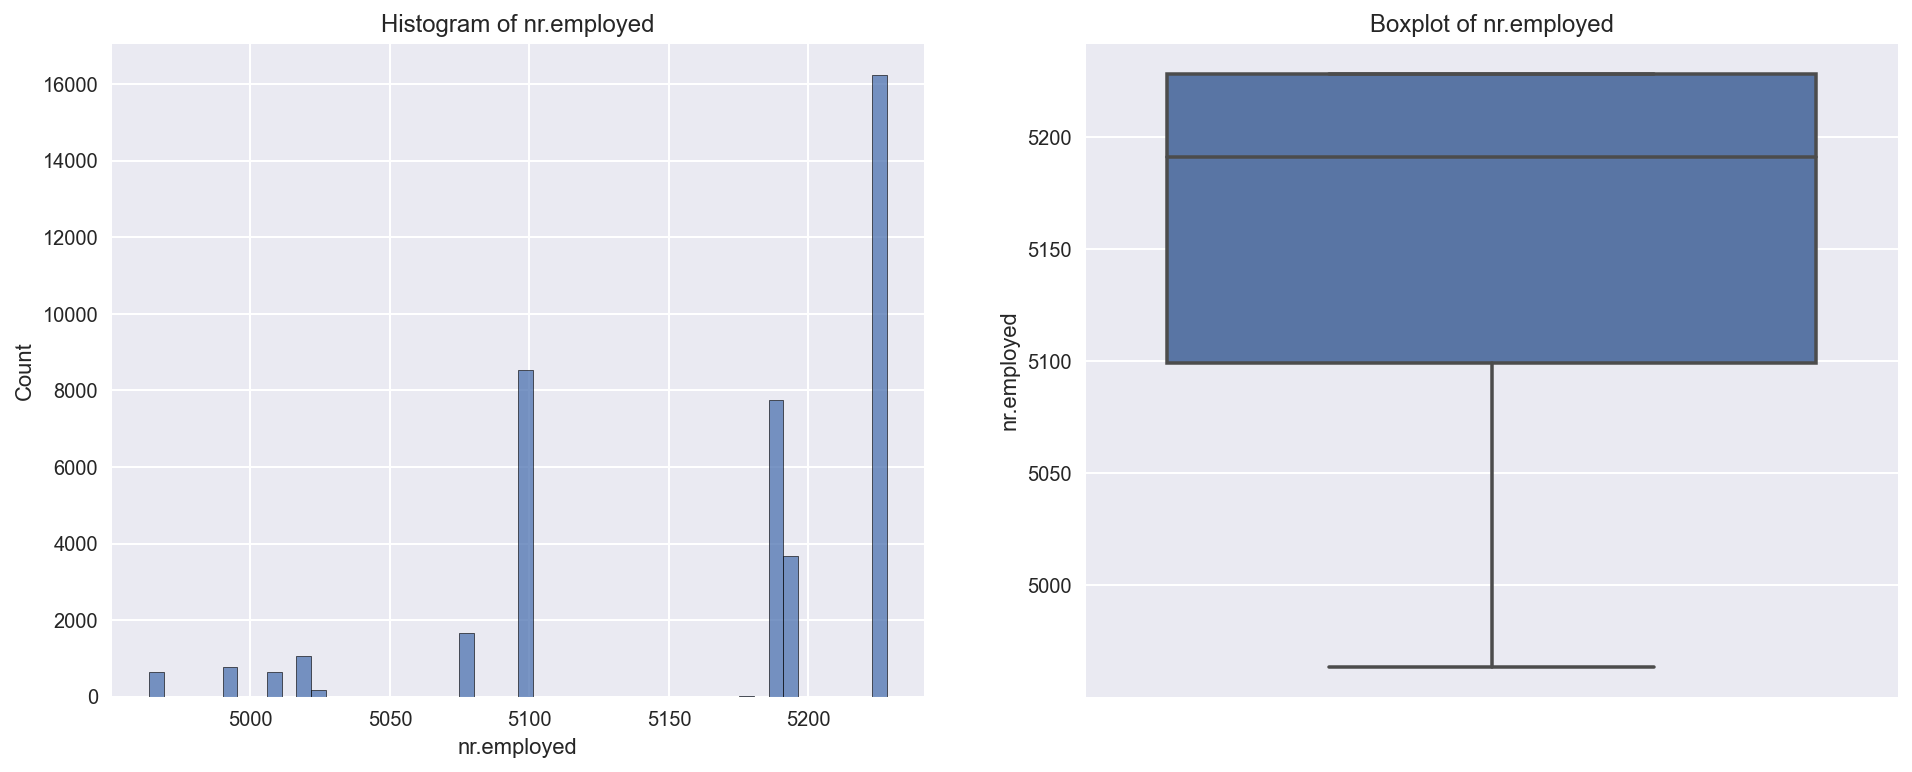

In [36]:
# nr.employed: number of employees - quarterly indicator (numeric)
hist_box(bank_df, 'nr.employed')
show_statistic(bank_df, 'nr.employed')

It has not outliers.

### 3.7 Check multi-collinear

<AxesSubplot:>

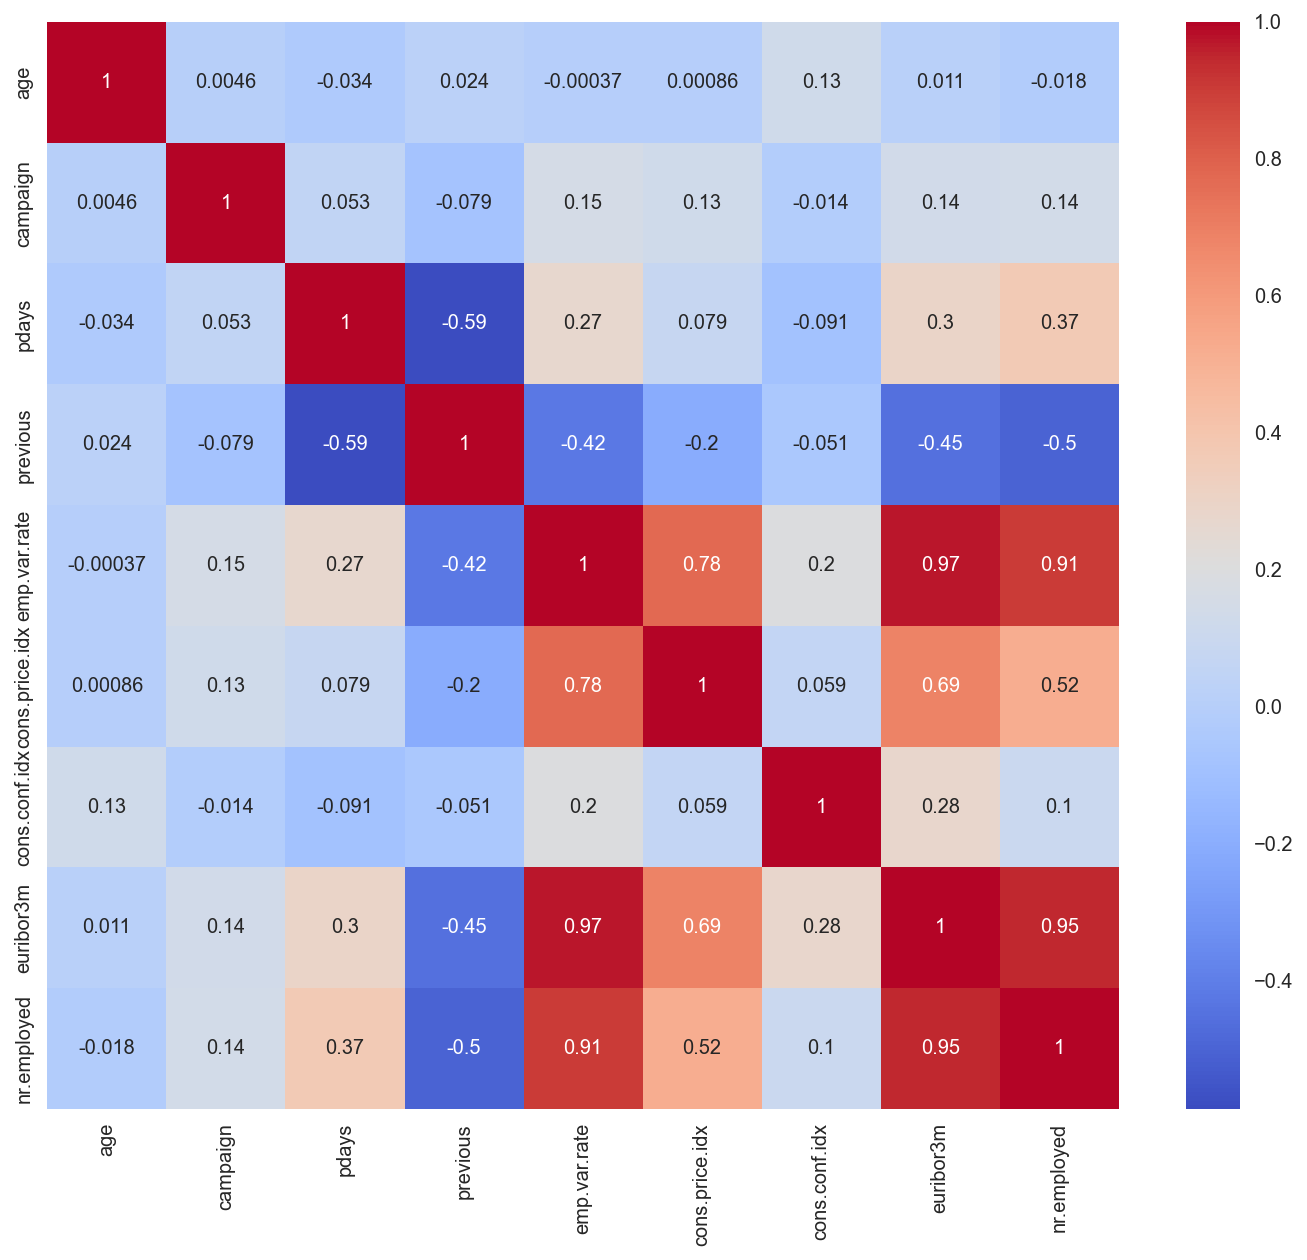

In [37]:
corr_matrix = bank_df[cnt_cols + numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

The nr.employed and euribor3m has 0.95 correlation value.  They might be muti-collinearity because higher Euro Interbank Offered Rate, more number of employees are employed / unemployed.

The emp.var.rate and euribor3m has 0.97 correlation value. They might be muti-collinearity because higher Euro Interbank Offered Rate, higher variation rate.

The nr.employed and emp.var.rate has 0.91 correlation value. They might be muti-collinearity because more number of employees are employed / unemployed, higher variation rate.

I can keep the euribor3m to train models.

### 3.8 Explore numerical variables and response

1) Use side by side plots to explore numerical variables and categorical response(:y).

2) Using One-Way ANOVA to view the correlation between numerical variables and categorical response(y)

In [38]:
# side by side bar plots
def draw_bar(data_df, names, response):
    plt.figure(figsize = (10, 10))
    for i, col in enumerate(list(names)):
        plt.subplot(2, 4, i + 1)
        sns.barplot(x=response, y=col, data=data_df)
        plt.grid()
        plt.tight_layout()

        
from scipy.stats import pointbiserialr

def point_biserial_correlation(data_df, names, response):
    """
    We should always prefer an attribute whose p-value is less than 0.05 to one whose p-value exceeds 0.05 
    (recall how to interpret p-values from the Comp Math + Stats course).  
    
    If neither of the categories of a binary response attribute show any significant point biserial correlation with a 
    particular explanatory variable then the explanatory attribute does not share a linear relationship with the binary 
    response variable. Remember: the point biserial metric can only be applied to BINARY categorical attributes, 
    i.e., at least one of the variables being used to derive the metric should be a binary categorical variable 
    while the other is either a floating point or integer value. 
    """
    for col in names:
        # get continuous and dichotomous data
        continuous_ = data_df[col]
        
        category_ = data_df[response] # 'y'

        pbc = pointbiserialr(category_, continuous_)
        
        print("correlation = %.4f, pvalue = %.4f, name = %s" %(pbc.correlation, pbc.pvalue, col ))

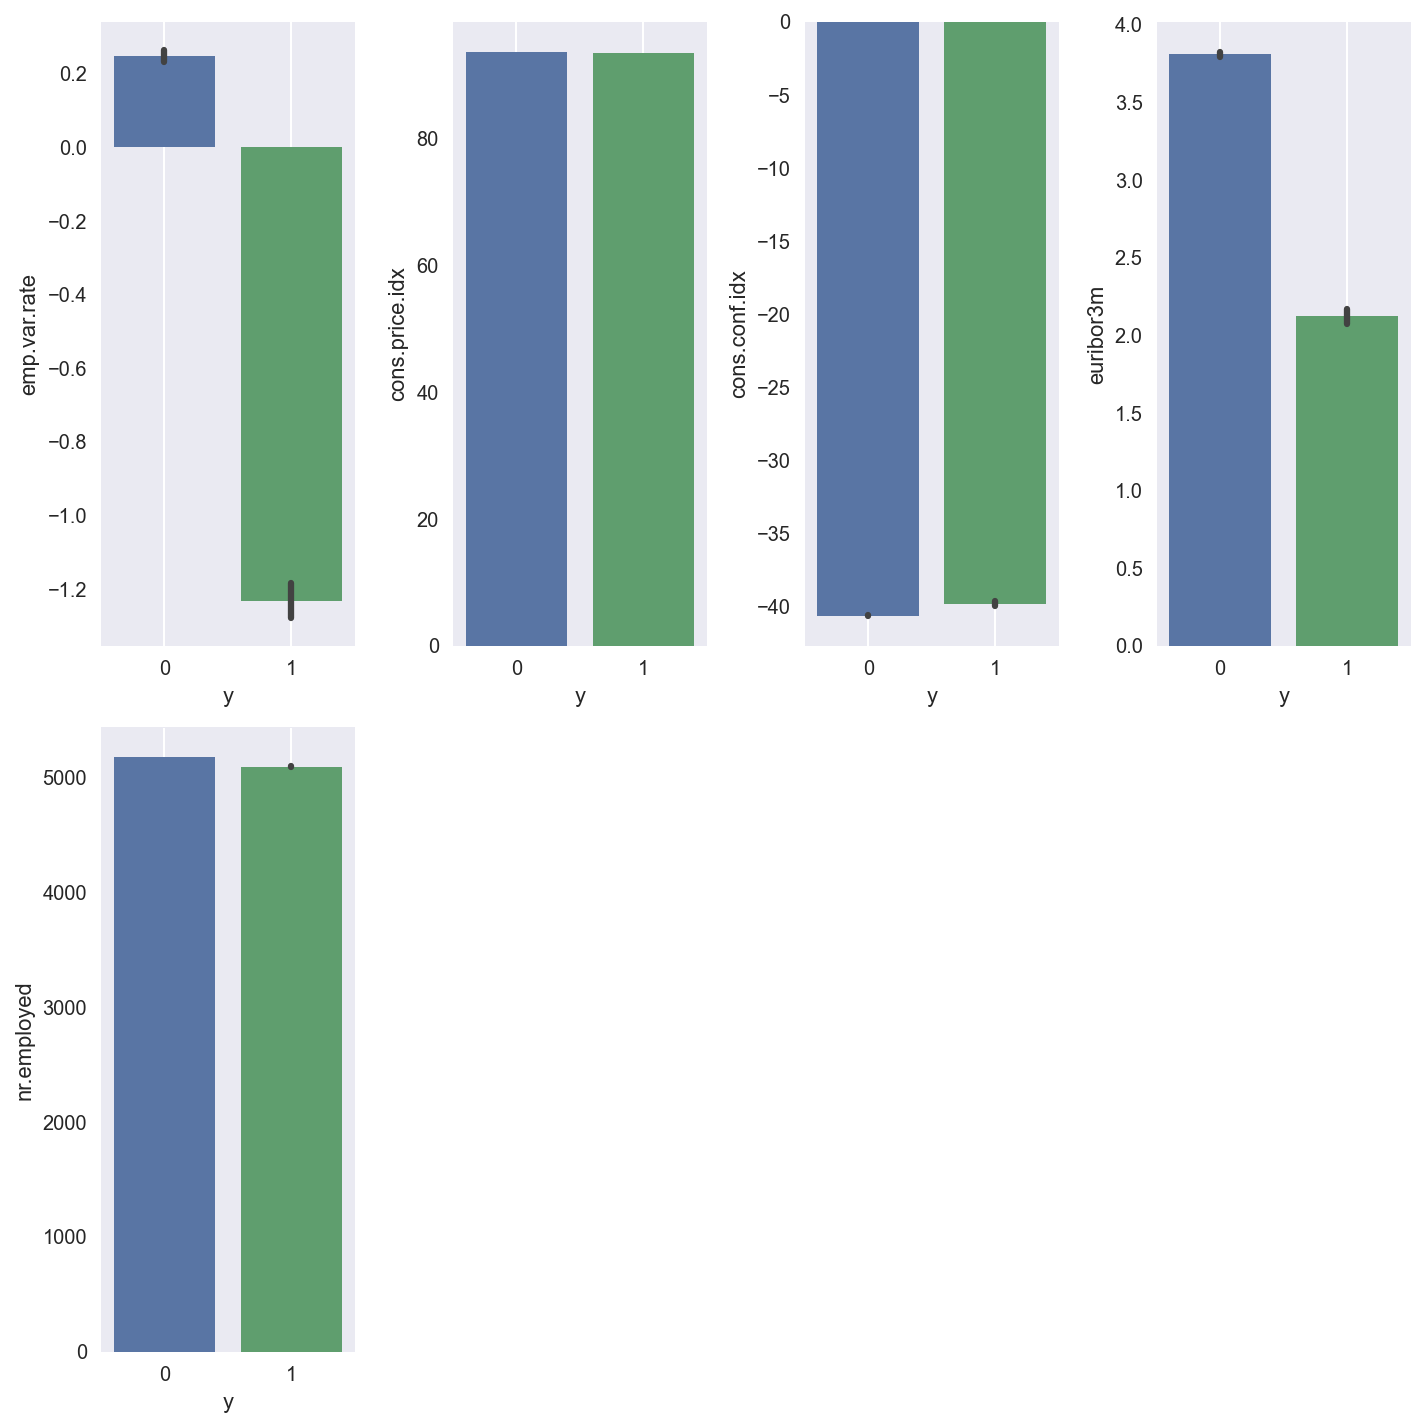

In [39]:
draw_bar(bank_df, numeric_cols, 'y')

#### point biserial correlation

In [40]:
# The point biserial correlation between continue variables and categorical response(y)
point_biserial_correlation(bank_df, numeric_cols, 'y')

correlation = -0.2983, pvalue = 0.0000, name = emp.var.rate
correlation = -0.1362, pvalue = 0.0000, name = cons.price.idx
correlation = 0.0549, pvalue = 0.0000, name = cons.conf.idx
correlation = -0.3078, pvalue = 0.0000, name = euribor3m
correlation = -0.3547, pvalue = 0.0000, name = nr.employed


In [41]:
# The point biserial correlation between the non-negative discrete count variables and categorical response(y)
point_biserial_correlation(bank_df, cnt_cols, 'y')

correlation = 0.0304, pvalue = 0.0000, name = age
correlation = -0.0664, pvalue = 0.0000, name = campaign
correlation = -0.3249, pvalue = 0.0000, name = pdays
correlation = 0.2302, pvalue = 0.0000, name = previous


From the above side-by-side box plots and Point Biserial Correlation table, we can see as followed:

First, I want to find the balance bars between 1 and 0.

Seconde, I want to find the higher correlation and the pvalue is less than 0.05 (significant).

https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1

The cons.price.idx, cons.conf.idx and nr.employed have similar bars. They might be predictive of the response. But only previous has a higher point biserial correlation in all numerical variables.

So previous, cons.price.idx, cons.conf.idx and nr.employed might be predictive of the response(y).

### 3.9 Summary of EDA

The response is an imbalance variable. I will use up-sampling to balance it.

Left skewed distribution:

    campaigns show left skewed distribution. It has outliers that need to deal with.
    
    age needs to be converted as ordinal variable.

The non-negative discrete COUNT value:

    pdays and previous can be the non-negative discrete COUNT value.

Muti-collinearity:

    euribor3m, nr.employed and emp.var.rate might be muti-collinearity.
    
Chi2 Test:

    poutcome, month, job, contact and education have higher statistic. They might be predictive of the response(y).

Point Biserial Correlation:

    All continuous variables have low Point Biserial Correlation with the response. They might need convert to discretization.
    
    previous it is a non-negative count variables have a higher Point Biserial Correlation with the response. It might be predictive of the response(y).

# 4. Data Preparation

- Check duplication
- Drop outliers
- Discretization/Binning
  - Convert age to ordinary variable
  - Convert all continues to log(N) bins 
- Convert to normal distribution by Box-Cox (ignore)
- Standardization
- Prepped Data Review (Re-run Exploratory Data Analysis)
- Dummy the categories
- Split data set
- Up-sample the test data set

### 4.1 Check duplication

In [42]:
# To check whether there are duplicated rows in the data set
dup_rows = bank_df.duplicated( keep='first')

dup_rows.value_counts()

False    39404
True      1784
dtype: int64

The data set has 1784 duplicated rows. Next I will explore these duplicates.

In [43]:
# fetch and show the duplicates
duplicates_df = bank_df[dup_rows]

print(duplicates_df.shape)
duplicates_df.head(5)

(1784, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
11,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
104,52,admin.,divorced,university.degree,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [44]:
duplicates_df['y'].value_counts()

0    1742
1      42
Name: y, dtype: int64

The 1784 rows of duplications account for 4.3%. They can be dropped. 

Drop the last duplicate, keep the first one.

In [45]:
prepared_bank_df = bank_df.drop_duplicates(keep='first', inplace=False)
prepared_bank_df.shape

(39404, 20)

### 4.2 Drop outliers

In [46]:
def two_box_compare(ori_df, now_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Original data ")
    sns.boxplot(y=ori_df[col], orient="v",ax=axes[0])
    
    axes[1].set_title("New data ")
    sns.boxplot(y=now_df[col], orient="v",ax=axes[1])

def statistic_compare(data_1, data_2, cols):
    for col in cols:
        mean1 = data_1[col].mean()
        std1 = data_1[col].std()
        
        mean2 = data_2[col].mean()
        std2 = data_2[col].std()
        
        des_mean = (1 - mean2/ mean1) * 100
        des_std = (1 - std2/ std1) * 100
        
        print("%s :\n the mean decreased from %.2f to %.2f , the mean value has decreased by more than %.2f %% .\n the standard deviation decreased from %.2f to %.2f the standard deviation value has decreased by more than %.2f %%.\n"
             %(col, mean1, mean2, des_mean, std1, std2, des_std))

def drop_outliers(data_df, cols, sigema = 3.0):
    del_arr = []
    for col in cols:
        del_outliers = data_df[np.abs(data_df[col] - data_df[col].mean() ) > (sigema * data_df[col].std() )]
        
        #Q1 = data_df[col].quantile(0.25)
        #Q3 = data_df[col].quantile(0.75)
        #IQR = Q3 - Q1

        # Creating notinvalidarea dataframe with boolean values:
        # False means these values are into the valid area 
        # True indicates presence of an outlier
        #notinvalidarea = (onlinenews < (Q1 - 1.5 * IQR)) | (onlinenews > (Q3 + 1.5 * IQR))
        
        #del_outliers = data_df[(data_df[col] < (Q1 - sigema * IQR)) | (data_df[col] > (Q3 + sigema * IQR)) ]

        del_arr.append(del_outliers)
        
        
    del_df = pd.concat(del_arr)
    
    del_df.drop_duplicates(keep='first', inplace=True)
    print("There are %d outliers that account for %.2f %%. They all large than (%.1f * std + mean) of column." 
          %(del_df.shape[0], (del_df.shape[0] / data_df.shape[0]) * 100, sigema))
    
    return del_df


from IPython.display import HTML, display
def display_html_statistic_table(ori, now, title1="1st", title2="2nd",col=""):
    

        
    html = "<table>"
    html += "<tr><td>%s</td><td>%s</td><td>%s</td></tr>" %(col, title1, title2)
    html += "<tr><td>%s</td><td>%d</td><td>%d</td></tr>" %('count', ori[col].shape[0], now[col].shape[0])
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('mean', ori[col].mean(), now[col].mean())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('std', ori[col].std(), now[col].std())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('min', ori[col].min(), now[col].min())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('25%', ori[col].quantile(0.25), now[col].quantile(0.25))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('50%', ori[col].quantile(0.50), now[col].quantile(0.50))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('75%', ori[col].quantile(0.75), now[col].quantile(0.75))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('max', ori[col].max(), now[col].max())

    html += "</table>"
    display(HTML(html))

#### Check all numerical variables that need to drop outliers

In [47]:
# Getting outliers that larger than (mean + 3 * std).
del_3_sigema_outliers_df = drop_outliers(prepared_bank_df, ['campaign'], 3.0)

There are 691 outliers that account for 1.75 %. They all large than (3.0 * std + mean) of column.


In [48]:
# copy a data set to test
del_test_df_3_sigema = prepared_bank_df.copy()

In [49]:
# drop outliers
del_test_df_3_sigema.drop(del_3_sigema_outliers_df.index.values, inplace=True)

In [50]:
del_test_df_3_sigema.shape

(38713, 20)

#### Original data set with outliers

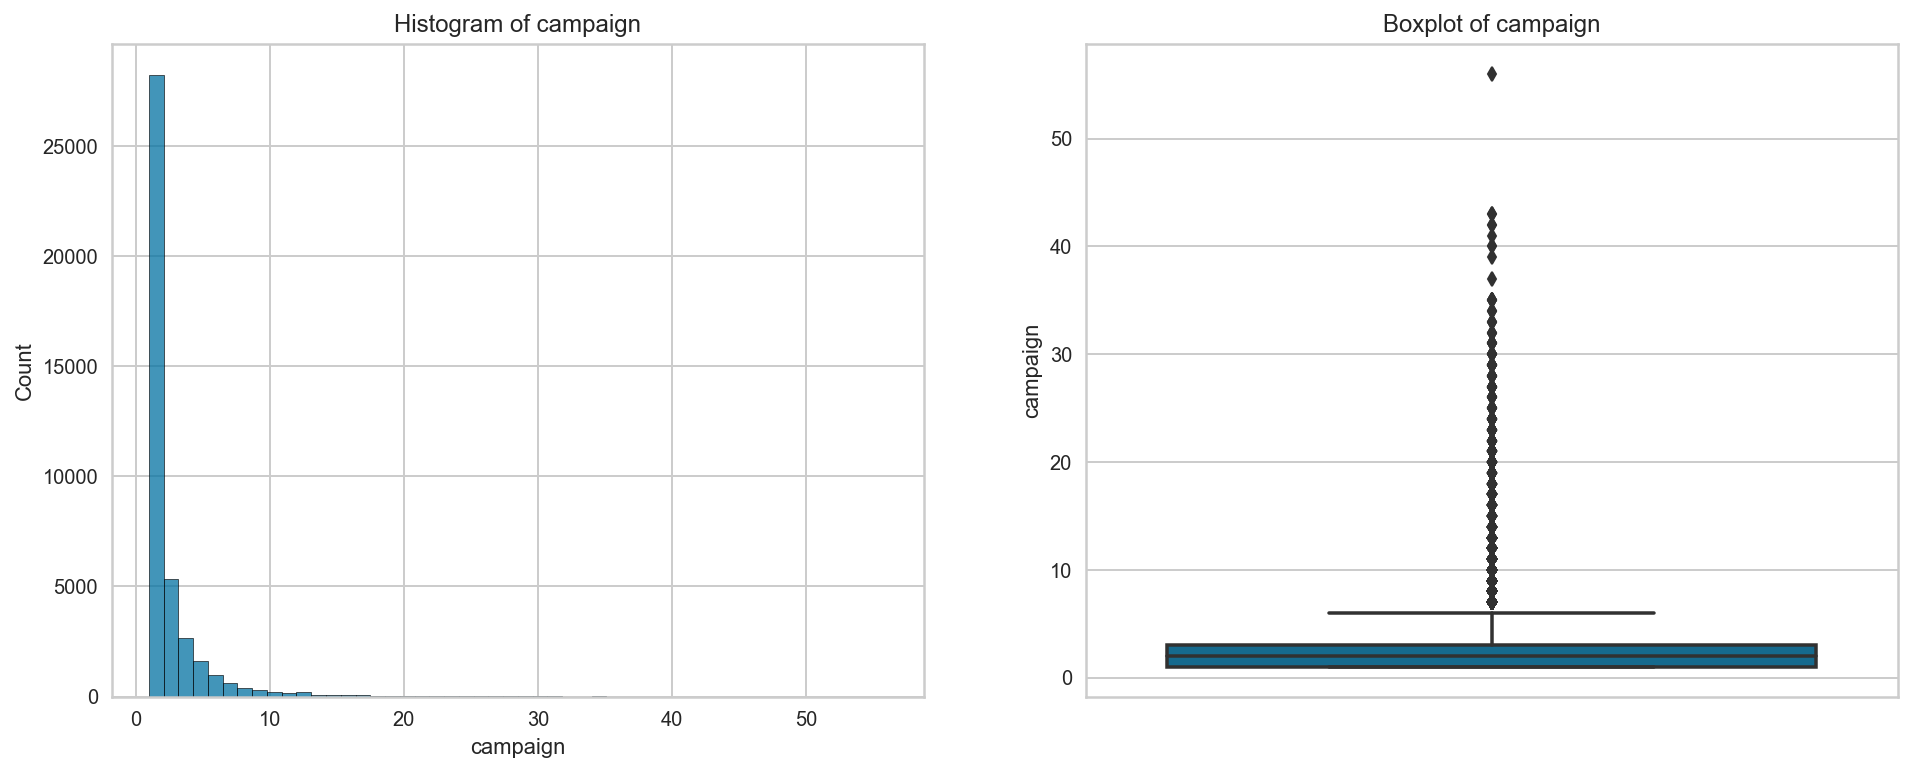

In [232]:
hist_box(prepared_bank_df, 'campaign')

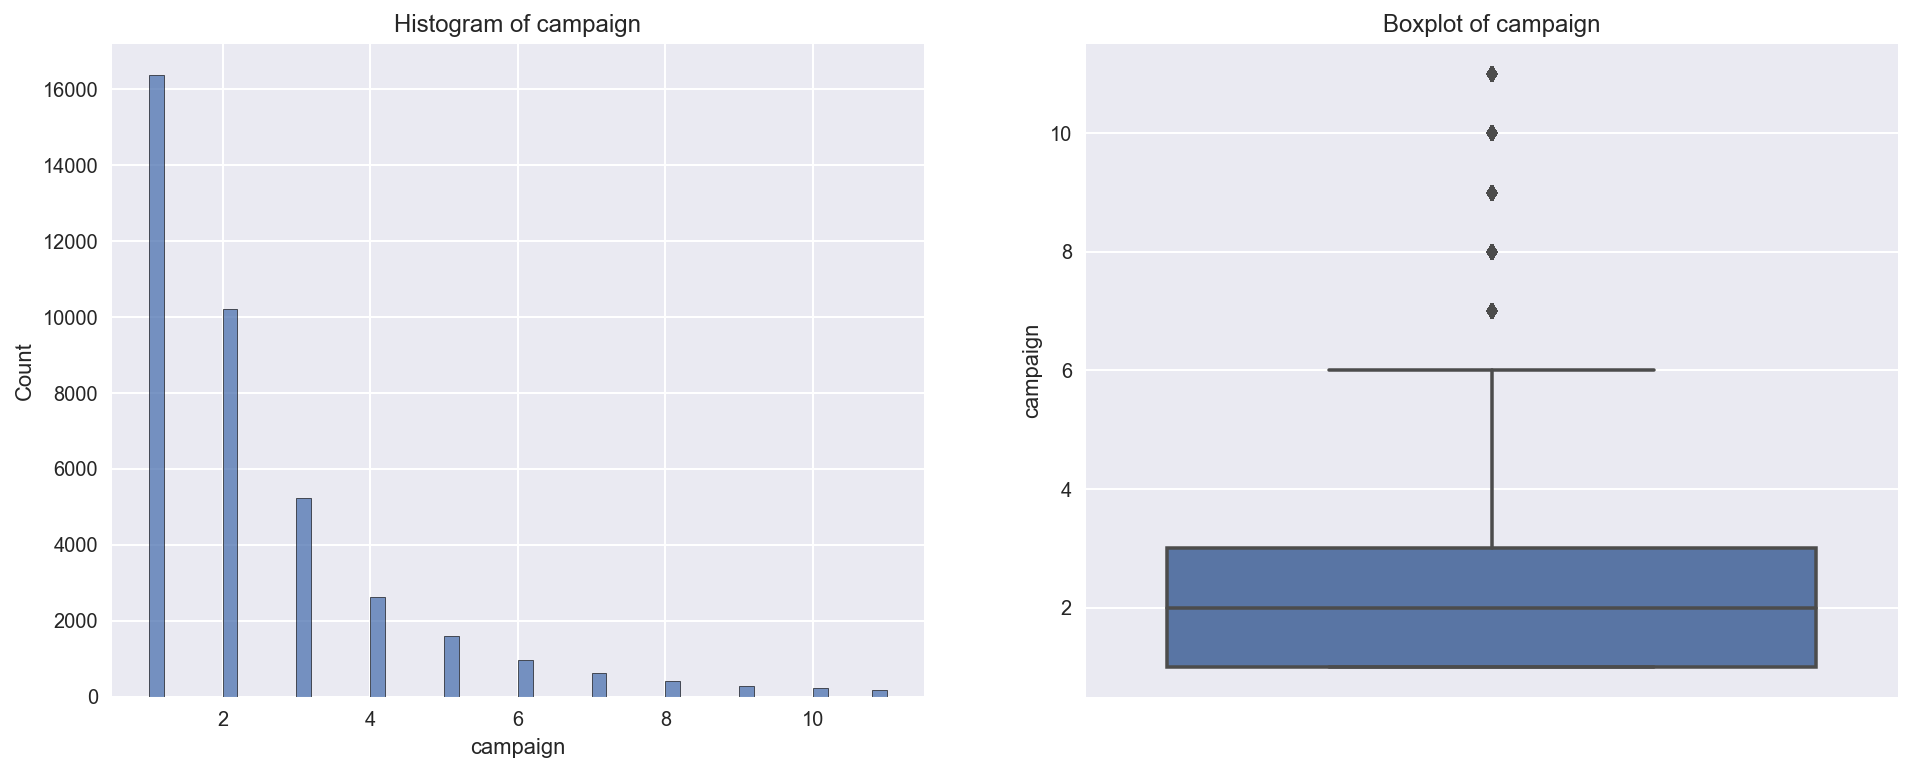

In [51]:
# data set without outliers
hist_box(del_test_df_3_sigema, 'campaign')

After dropping outliers, the boxplot of campaign shows much better. 

In [52]:
del_test_df_3_sigema['campaign'].value_counts()

1     16368
2     10223
3      5230
4      2625
5      1586
6       974
7       623
8       400
9       283
10      224
11      177
Name: campaign, dtype: int64

In [53]:
display_html_statistic_table(prepared_bank_df, del_test_df_3_sigema, title1="with outliers",
                             title2 = "droped outliers", col="campaign")

campaign,with outliers,droped outliers
count,39404,38713
mean,2.6187,2.3525
std,2.8148,1.8301
min,1.0000,1.0000
25%,1.0000,1.0000
50%,2.0000,2.0000
75%,3.0000,3.0000
max,56.0000,11.0000


Outliers of campaign are dropped. Mean and Std become less.

#### I will drop outliers with (mean + 3 * std)

In [54]:
prepared_bank_df = del_test_df_3_sigema.copy()
prepared_bank_df.shape

(38713, 20)

### 4.3 Discretization/Binning
- Convert age into equal-sized buckets, then transfer it into ordinary variable
- Convert euribor3m into equal-sized buckets, then transfer it into ordinary variable

#### Convert age into equal-sized buckets, then transfer it into ordinary variable

In [55]:
prepared_bank_df['age_groups'] = pd.qcut(prepared_bank_df['age'], q=10, precision=0)
#prepared_bank_df['age_groups'] = pd.cut(prepared_bank_df['age'], bins=10, precision=0)

<AxesSubplot:>

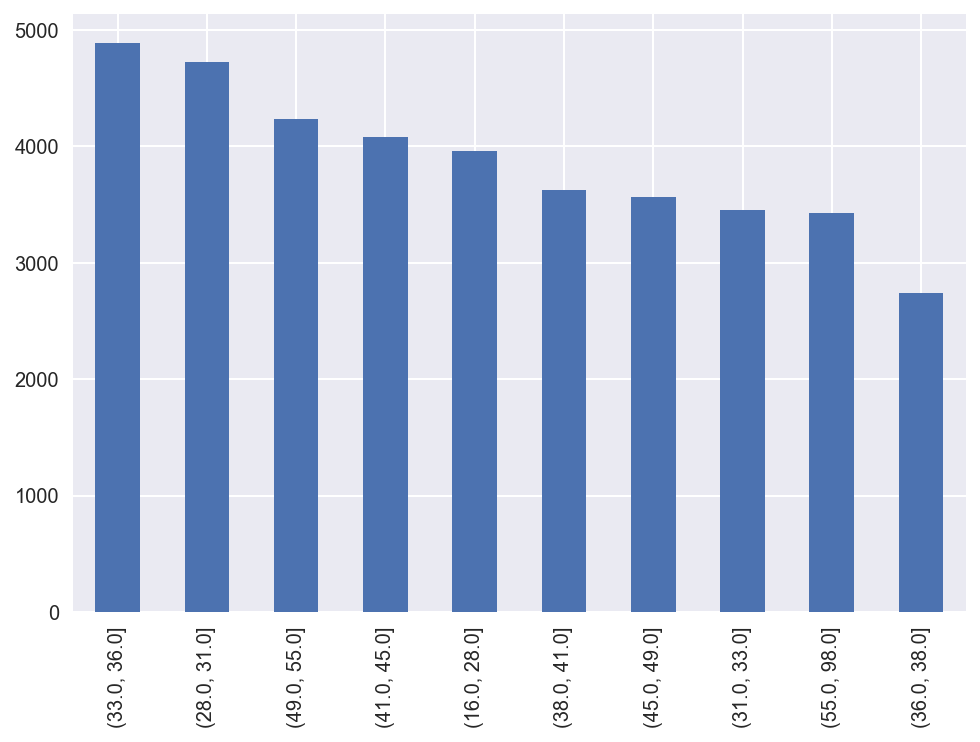

In [56]:
prepared_bank_df['age_groups'].value_counts().plot.bar()

In [57]:
# convert age_groups to ordinal
from sklearn.preprocessing import OrdinalEncoder
enc_age = OrdinalEncoder()
prepared_bank_df[["age_groups_encode"]] = enc_age.fit_transform(prepared_bank_df[["age_groups"]])

In [58]:
prepared_bank_df["age_groups_encode"].value_counts()

3.0    4891
1.0    4727
8.0    4234
6.0    4080
0.0    3963
5.0    3623
7.0    3568
2.0    3454
9.0    3432
4.0    2741
Name: age_groups_encode, dtype: int64

#### Convert euribor3m into equal-sized buckets, then transfer it into ordinary variable

Becuase euribor3m, nr.employed and emp.var.rate might be muti-collinearity, I will use the euribor3m to train models. I will only convert euribor3m to bins.

In [59]:
import math
# a function to create bins
def sqrt_bins(data_df, col, draw = False):
    
    # get sqrt of the number of rows
    sqrt_n = int(math.sqrt( data_df.shape[0] ))
    
    # create a new name for new categarical variable
    new_col = col + "_groups"
    
    # Convert to bins by cut
    data_df[new_col]= pd.qcut(data_df[col], sqrt_n, duplicates= 'drop')
    
    if draw == True:
        data_df[col].hist(bins=sqrt_n)
        plt.show()

        data_df[new_col].value_counts(sort=False).plot.bar()
        plt.show()
    
    print("%s has converted as %d bins. New column name is %s" %(col, sqrt_n, new_col))

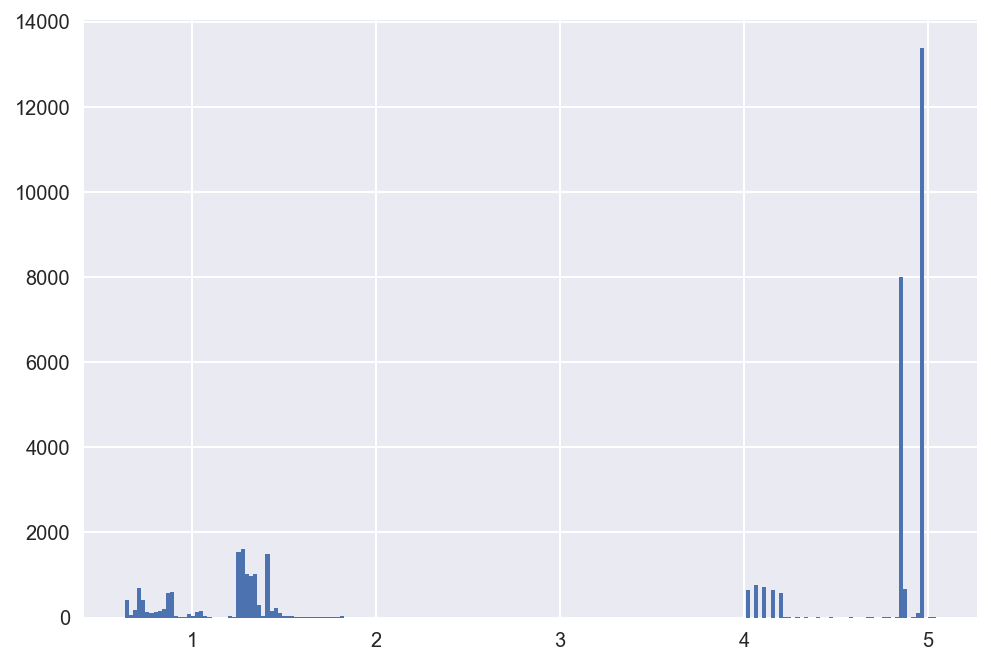

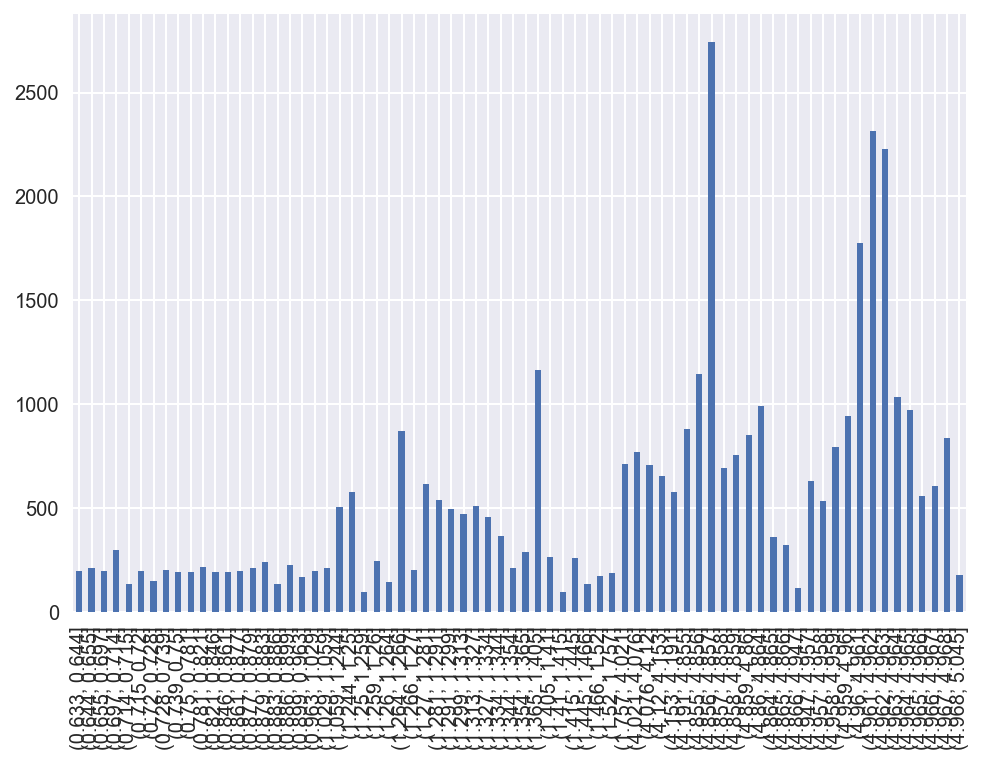

euribor3m has converted as 196 bins. New column name is euribor3m_groups


In [60]:
sqrt_bins(prepared_bank_df, "euribor3m", True)

In [61]:
# convert above bins to ordinal
from sklearn.preprocessing import OrdinalEncoder
enc_euribor3m = OrdinalEncoder()
prepared_bank_df[["euribor3m_groups_encode"]] = enc_euribor3m.fit_transform(prepared_bank_df[["euribor3m_groups"]])

### 4.4 Convert to normal distribution by Box-Cox (ignore)

### 4.5 Standardization

I will standardize 'cons.price.idx' and 'cons.conf.idx'

In [62]:
std = preprocessing.StandardScaler()
fitted = std.fit_transform(prepared_bank_df[['cons.price.idx', 'cons.conf.idx']])
prepared_bank_df = prepared_bank_df.assign(**{c:fitted[:,i] for i, c in enumerate(['cons.price.idx', 'cons.conf.idx'])})

### 4.6 Prepped Data Review (Re-run Exploratory Data Analysis)

After dropping muti-collinear and binning variables, I get a new data set. I will use the new data set to train models.

In [63]:
# get a new sub set for next studies
response_col = ['y']

prepared_cnt_cols = ['age_groups_encode', 'euribor3m_groups_encode', 'campaign', 'pdays', 'previous']

prepared_num_cols = ['cons.price.idx', 'cons.conf.idx']

prepared_cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']

original_cols = ['euribor3m', 'euribor3m_groups', 'age', 'age_groups']

In [64]:
# get sub data set
prepared_bank_sub_df = prepared_bank_df[response_col + prepared_cnt_cols + prepared_num_cols + prepared_cat_cols]

In [65]:
# view
prepared_bank_sub_df.head(3)

,y,age_groups_encode,euribor3m_groups_encode,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0,9.0,51.0,1,999,0,0.725121,0.878464,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,0,9.0,51.0,1,999,0,0.725121,0.878464,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,0,4.0,51.0,1,999,0,0.725121,0.878464,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent


In [66]:
prepared_bank_sub_df.shape

(38713, 18)

In [67]:
# view the basic statistic
prepared_bank_sub_df.describe()

,y,age_groups_encode,euribor3m_groups_encode,campaign,pdays,previous,cons.price.idx,cons.conf.idx
count,38713.000000,38713.000000,38713.000000,38713.000000,38713.000000,38713.000000,3.871300e+04,3.871300e+04
mean,0.118384,4.381035,46.505231,2.352517,960.191538,0.181748,5.875846e-14,4.744529e-14
std,0.323066,2.895848,18.310579,1.830124,192.436475,0.506907,1.000013e+00,1.000013e+00
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.344676e+00,-2.207627e+00
25%,0.000000,2.000000,33.000000,1.000000,999.000000,0.000000,-8.482999e-01,-4.717010e-01
50%,0.000000,4.000000,51.000000,2.000000,999.000000,0.000000,-2.165348e-01,-2.788203e-01
75%,0.000000,7.000000,63.000000,3.000000,999.000000,0.000000,7.251205e-01,8.784640e-01
max,1.000000,9.000000,71.000000,11.000000,999.000000,7.000000,2.048574e+00,2.914427e+00


#### View the relationship between numerical variables and categorical response

In [68]:
def draw_multi_boxs(cols, rs = 3, cs = 3):
    plt.figure(figsize = (15, 10))
    for i, col in enumerate(cols):
        plt.subplot(rs, cs, i + 1)
        sns.boxplot(data=prepared_bank_sub_df,y=col,orient="v")
        plt.grid()
        plt.tight_layout()

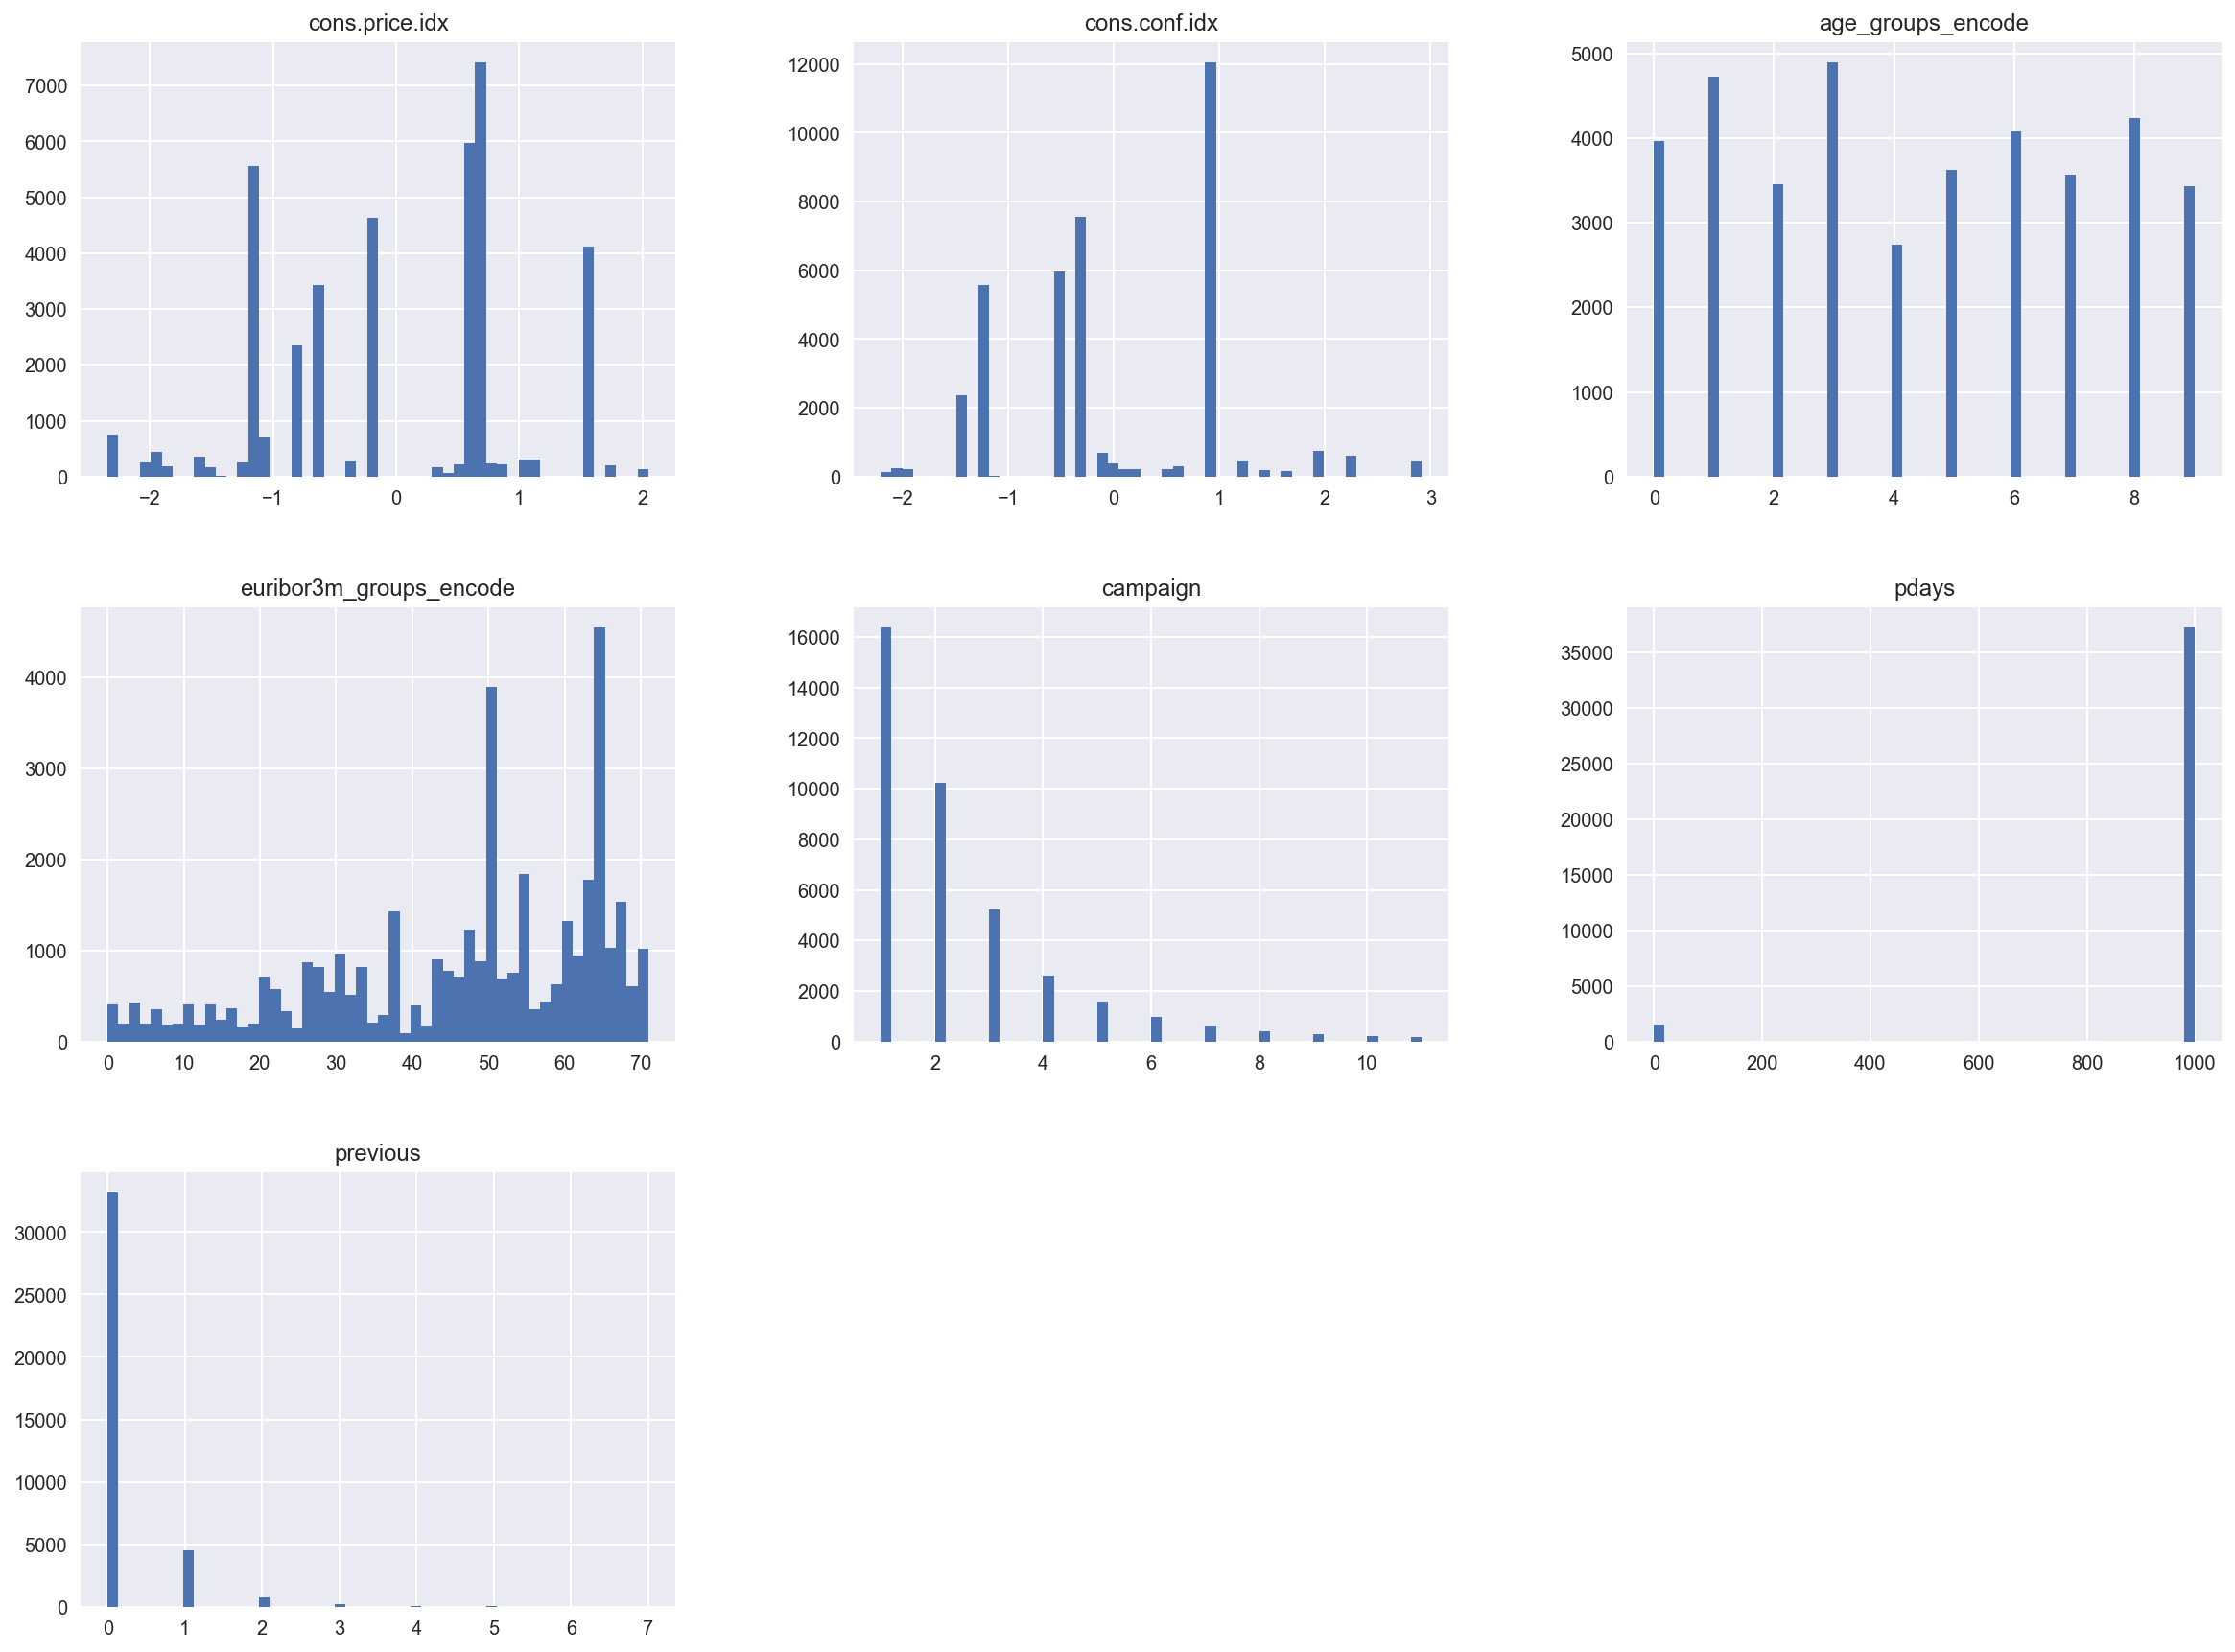

In [69]:
# draw the histogram for variables
prepared_bank_sub_df[prepared_num_cols + prepared_cnt_cols].hist(bins=50, figsize=(20,15))
plt.show()

cons.price.idx and cons.conf.idx are standardization now. 

age_groups_encode and euribor3m_groups_encode are more clearer than the original value.

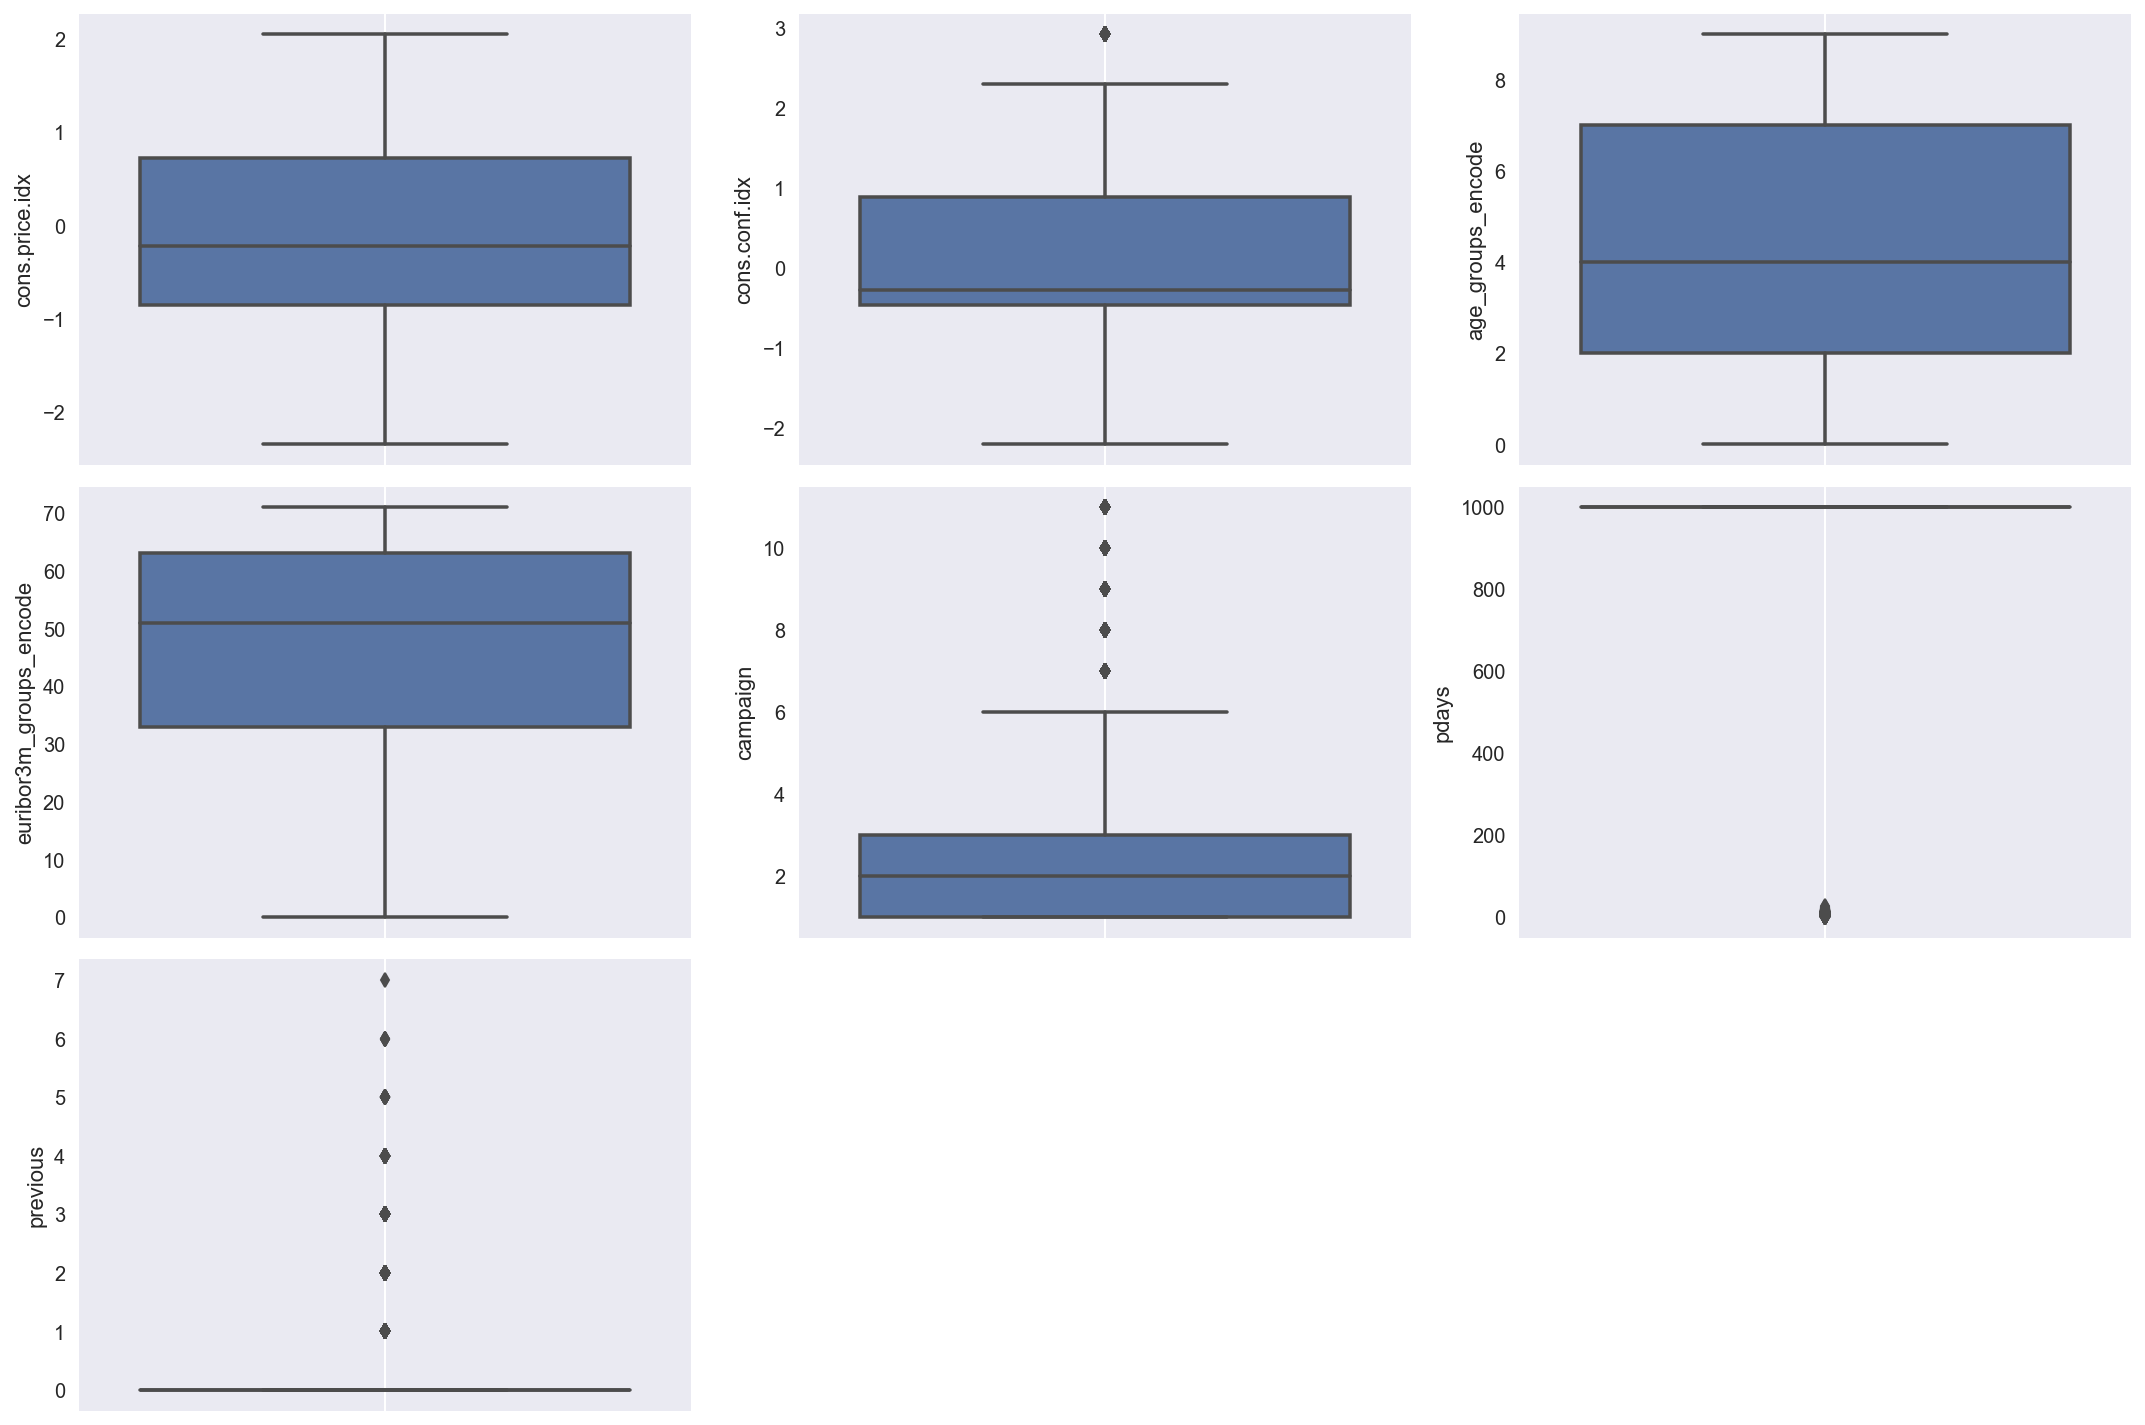

In [70]:
draw_multi_boxs(prepared_num_cols + prepared_cnt_cols)

campaign shows more clear than before dropping outliers. 

#### Using boxplots to view the correlation between numerical variables and response

In [71]:
# Draw the box plots for numerical variables
def draw_multi_boxs_vs_response(cols, response, rs = 3, cs = 3):
    plt.figure(figsize = (15, 10))
    for i, col in enumerate(cols):
        plt.subplot(rs, cs, i + 1)
        #sns.distplot(df[col], color = 'r', kde = True)
        sns.boxplot(data=prepared_bank_sub_df,y=col,x=response, orient="v")
        plt.grid()
        plt.tight_layout()

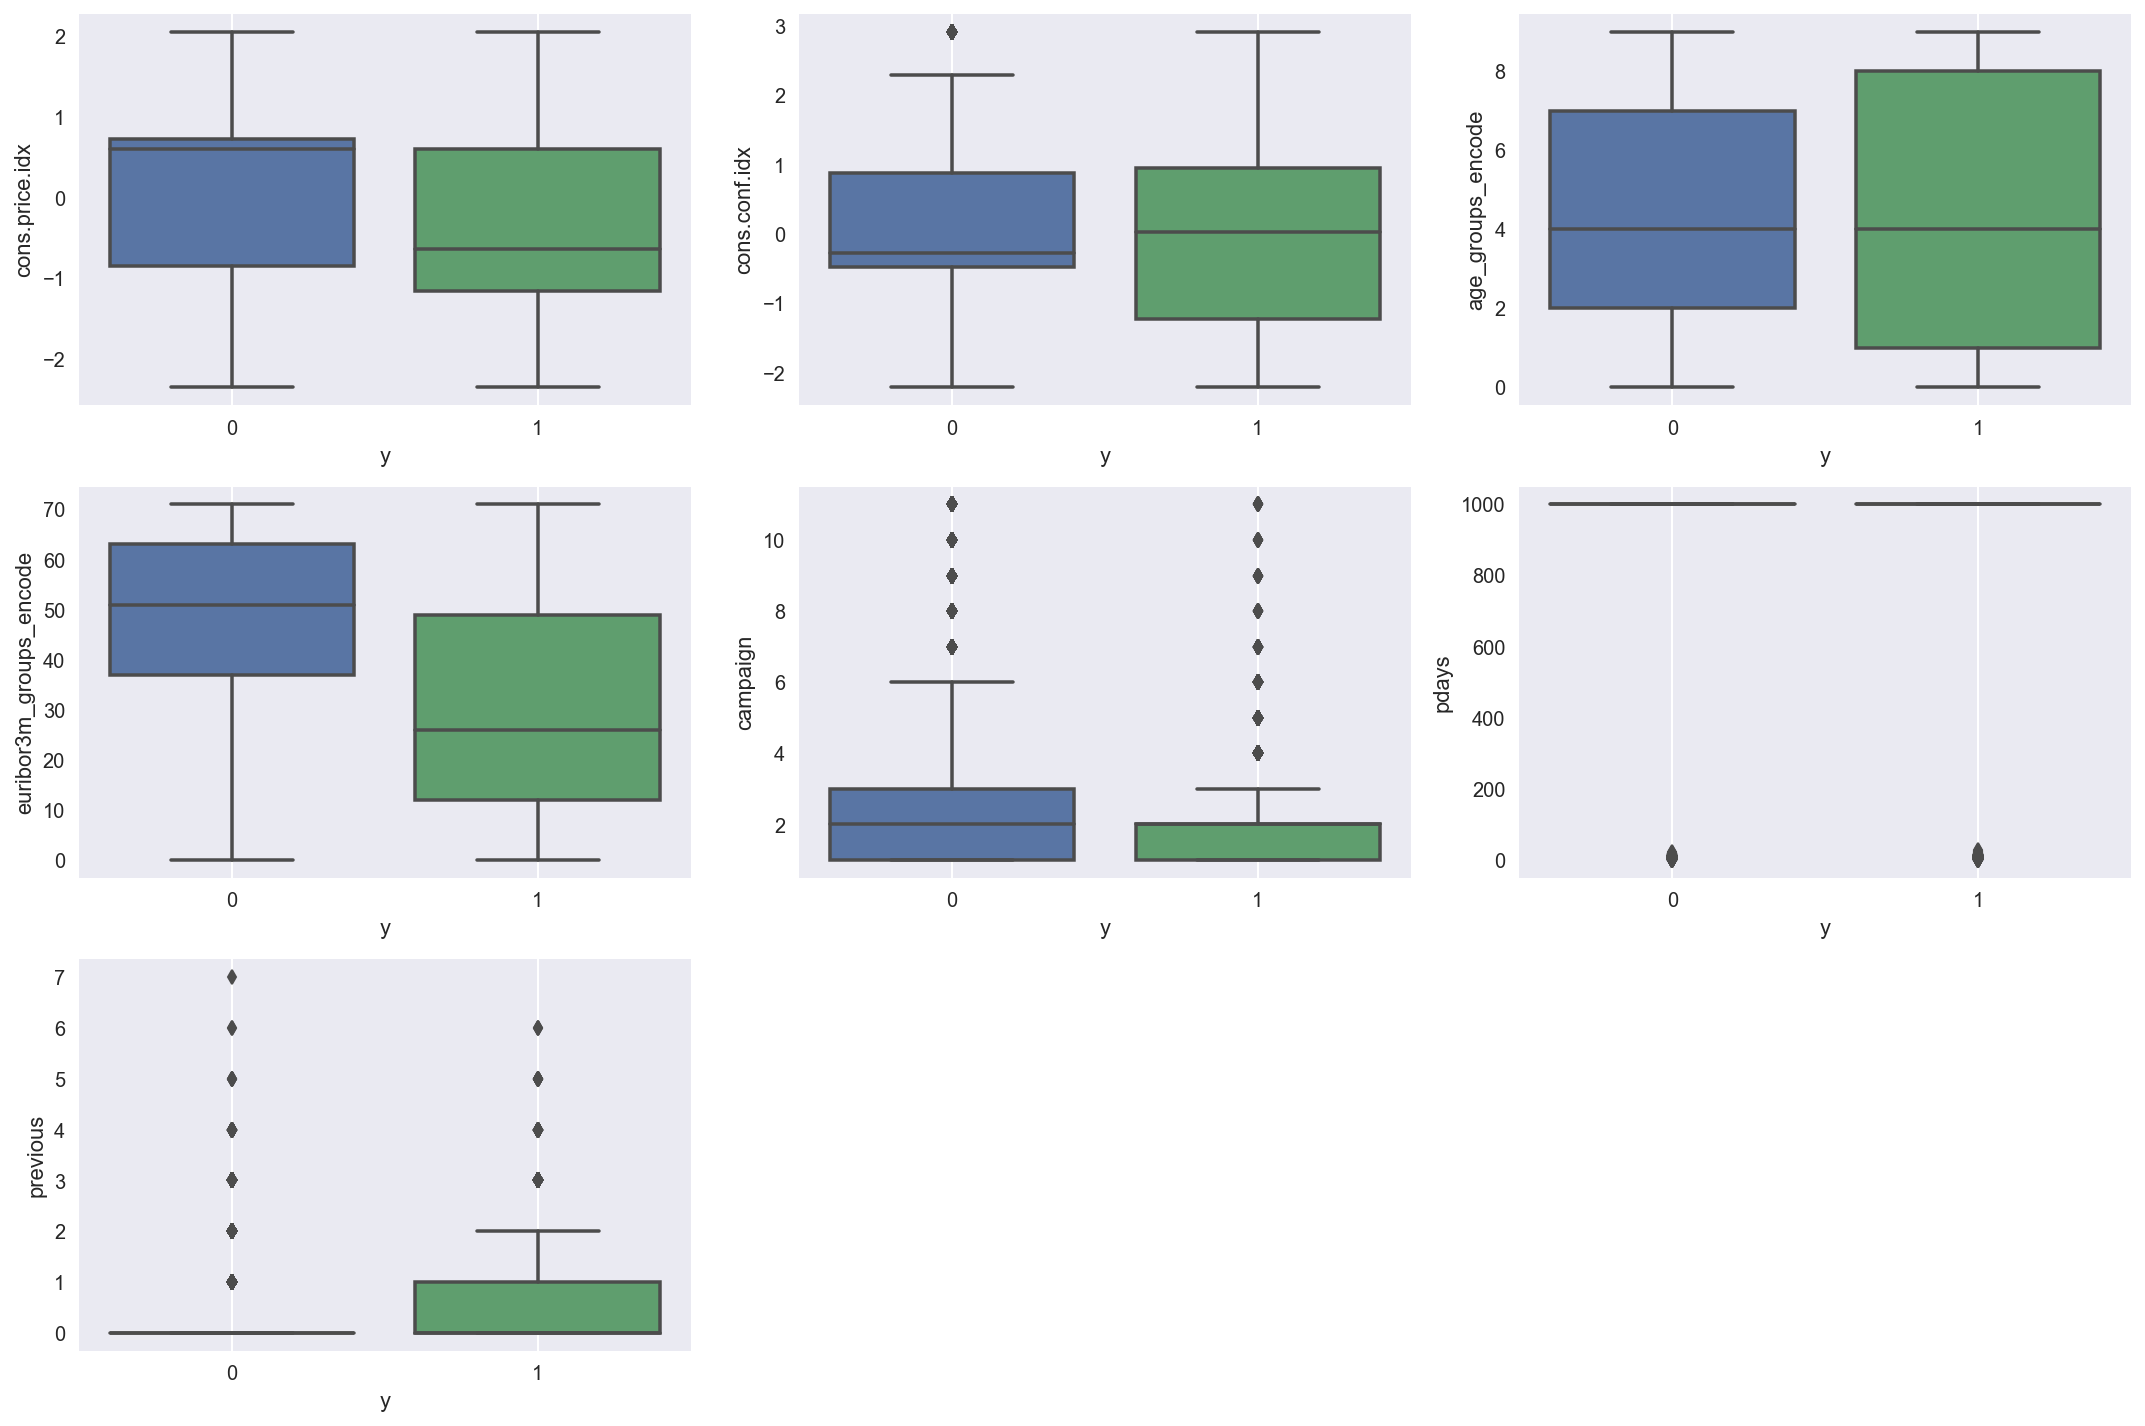

In [72]:
draw_multi_boxs_vs_response((prepared_num_cols + prepared_cnt_cols), 'y')

previous and euribor3m_groups_encode are more un-overlap than others. They are more strongly correlated than others.

#### check point biserial correlation

In [73]:
point_biserial_correlation(prepared_bank_sub_df, (prepared_num_cols + prepared_cnt_cols), 'y')

correlation = -0.1347, pvalue = 0.0000, name = cons.price.idx
correlation = 0.0576, pvalue = 0.0000, name = cons.conf.idx
correlation = -0.0136, pvalue = 0.0074, name = age_groups_encode
correlation = -0.3244, pvalue = 0.0000, name = euribor3m_groups_encode
correlation = -0.0673, pvalue = 0.0000, name = campaign
correlation = -0.3251, pvalue = 0.0000, name = pdays
correlation = 0.2289, pvalue = 0.0000, name = previous


previous has the highest point biserial correlation in all numerical variables

#### View the Relationship between categories and response (categorical response)

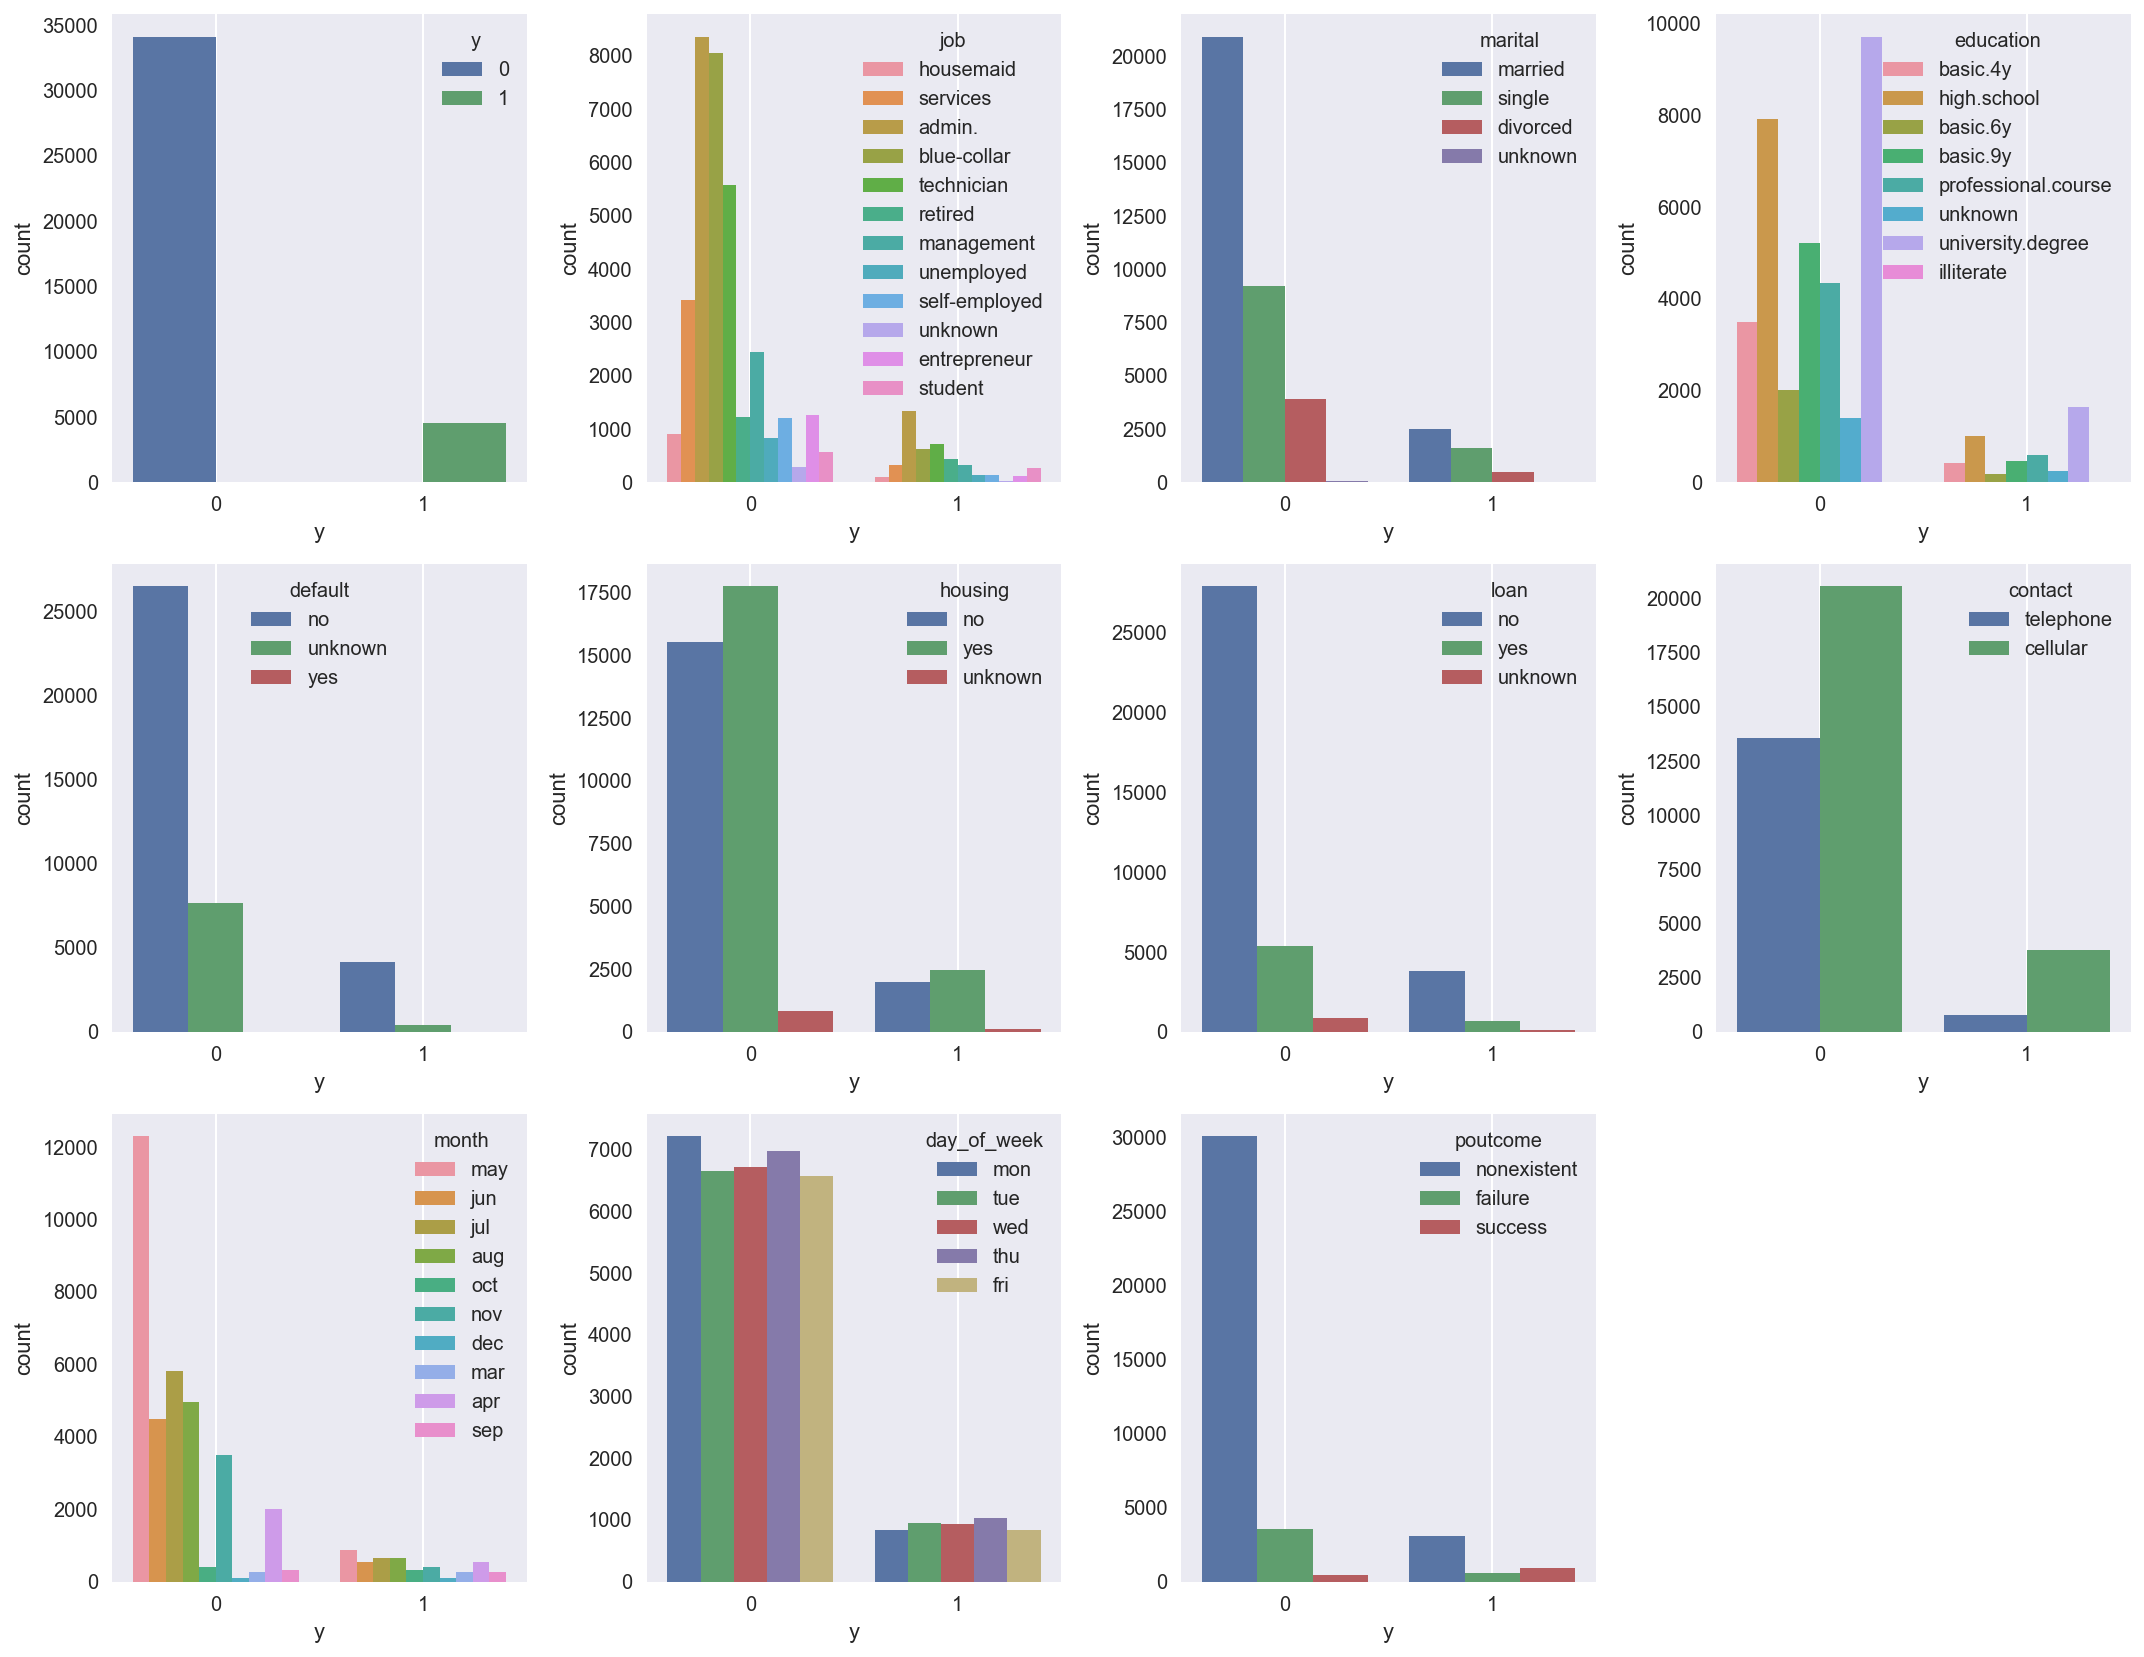

In [74]:
# To use bar charts to compare pairs of variables between Response and Explanatory
plt.figure(figsize = (15, 15))
for i, col in enumerate(list(['y'] + prepared_cat_cols)):
    plt.subplot(4, 4, i + 1)
    # sns.countplot(x=col, data=re_eda_df, color='blue')
    sns.countplot(x='y', hue=col, data=prepared_bank_sub_df)
    plt.grid()
    plt.tight_layout()

#### Chi2 statistic

In [75]:
# Run Chi2 test
prepared_category_chi2 = my_chi2_test(prepared_bank_sub_df, prepared_cat_cols)

# only show the statistics result
prepared_category_chi2.sort_values(by='statistics', ascending=False)

,col_name,statistics,pvalues,degrees
8,poutcome,3969.566628,0.000000e+00,2
6,month,2891.789410,0.000000e+00,9
0,job,917.050126,1.338586e-189,11
5,contact,898.712298,1.869614e-197,1
3,default,404.591114,1.393657e-88,2
2,education,194.091412,2.044869e-38,7
1,marital,122.210916,2.577762e-26,3
7,day_of_week,29.762332,5.471093e-06,4
4,housing,6.144610,4.631427e-02,2


After dorpping outliers, bar plots show more clearer than other and Chi2 have some changes.

#### Check multi-collinear

<AxesSubplot:>

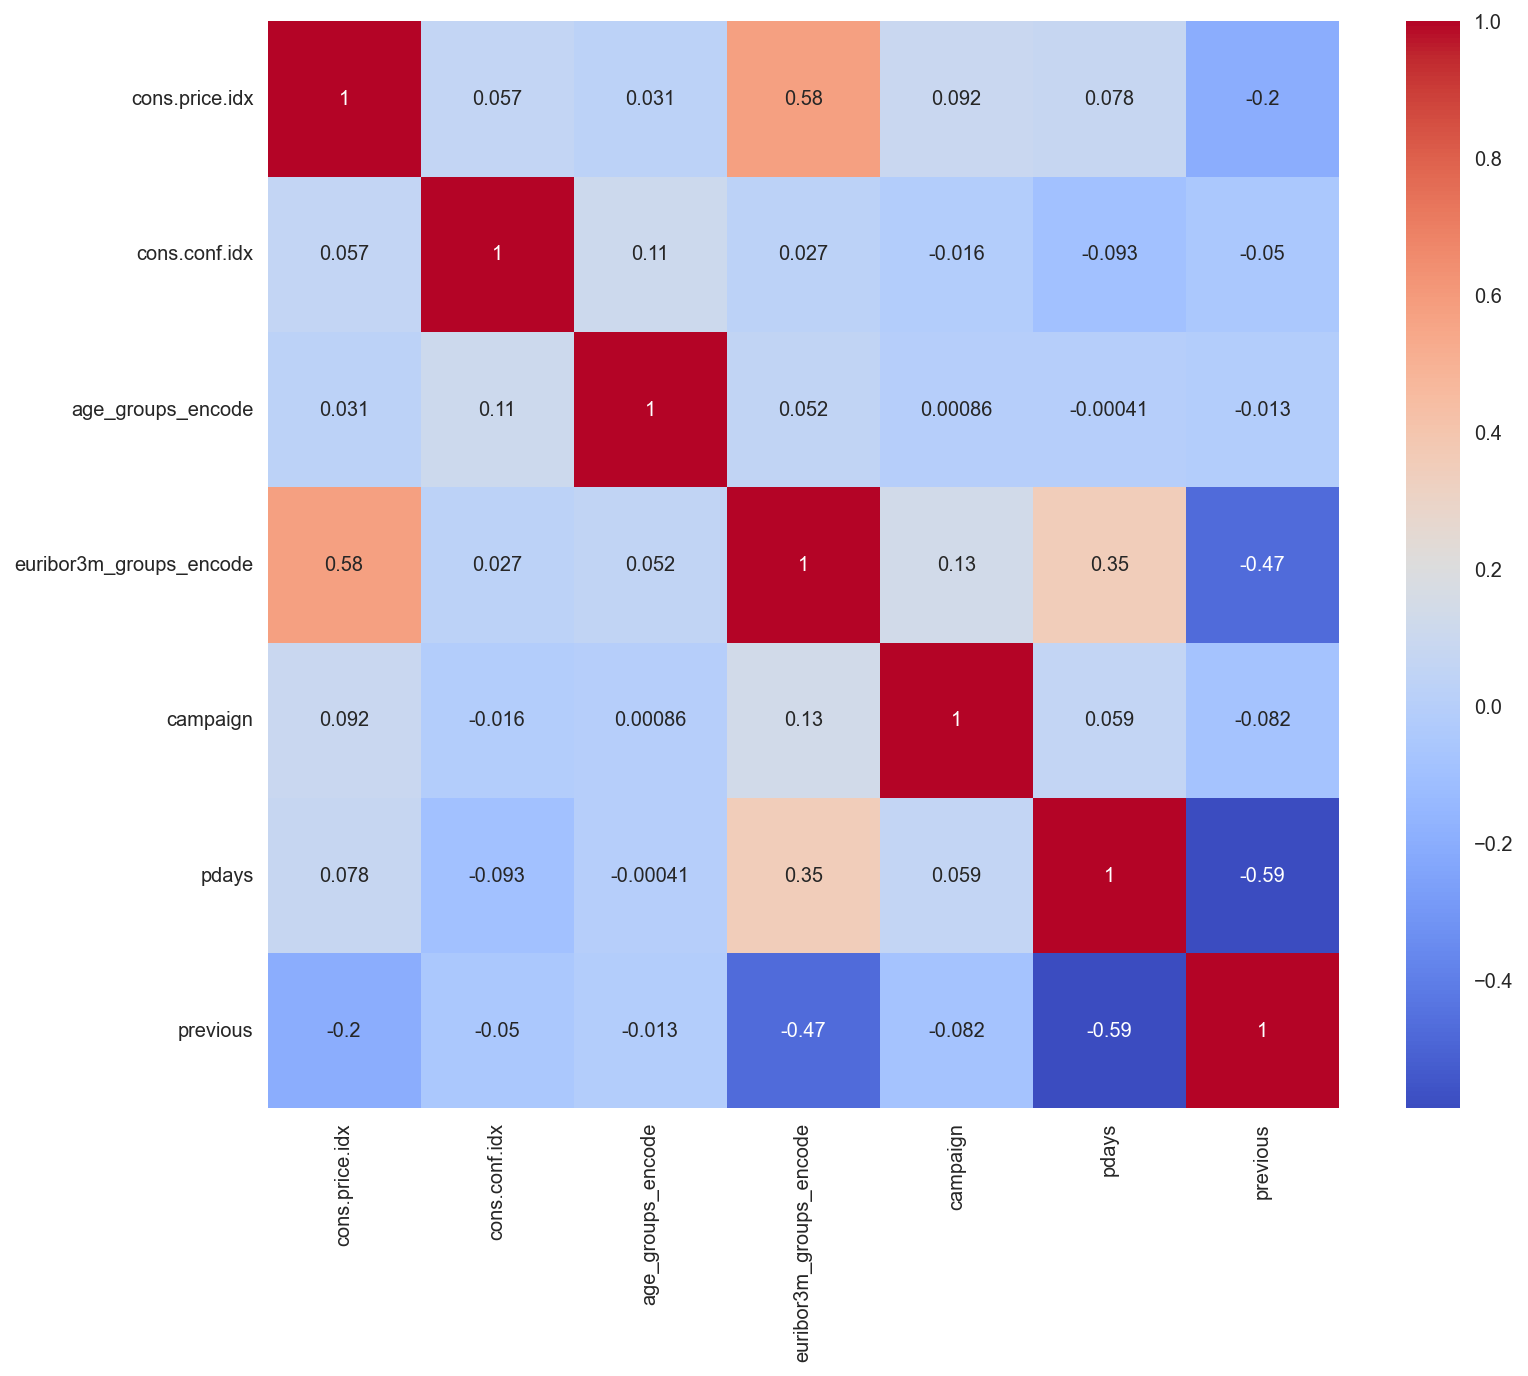

In [76]:
corr_matrix = prepared_bank_sub_df[prepared_num_cols + prepared_cnt_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

I can not see obvious multi-collinear variables.

#### Summary of Re-run EDA

From point biserial correlation and side by side boxplots, the previous, age_groups_encode and cons.conf.idx might be predictive of the response. 

From Chi2 and side by side barplots, the poutcome, month, job, contact and default might be predictive of the response. 

### 4.7 Dummy the categories

In [77]:
# Dummy the categorival variables
prepared_bank_sub_df_copy = pd.get_dummies(prepared_bank_sub_df, drop_first=True)
prepared_bank_sub_df_copy.head(3)

,y,age_groups_encode,euribor3m_groups_encode,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,9.0,51.0,1,999,0,0.725121,0.878464,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,9.0,51.0,1,999,0,0.725121,0.878464,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,4.0,51.0,1,999,0,0.725121,0.878464,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [78]:
prepared_bank_sub_df_copy.shape

(38713, 51)

In [79]:
prepared_bank_sub_df.columns

Index(['y', 'age_groups_encode', 'euribor3m_groups_encode', 'campaign',
       'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

### 4.8 Convert type for binning variables

In [80]:
prepared_bank_sub_df_copy['age_groups_encode'] = prepared_bank_sub_df_copy['age_groups_encode'].astype("int64")
prepared_bank_sub_df_copy['euribor3m_groups_encode'] = prepared_bank_sub_df_copy['euribor3m_groups_encode'].astype("int64")

### 4.9 Split data set

In [83]:
def get_train_test_X_y(data_df, y_col, size=0.3, std_cols=None):
    y = data_df[y_col]
    X = data_df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)

    return X_train, X_test, y_train, y_test

In [84]:
X_train, X_test, y_train, y_test = get_train_test_X_y(prepared_bank_sub_df_copy, "y")

In [85]:
# check
X_train.shape

(27099, 50)

In [86]:
# check
y_train.value_counts()

0    23910
1     3189
Name: y, dtype: int64

The train set is an unbalanced set. I will up-sample it.

### 4.10 Up-sample the test data set

In [87]:
# import lib
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=13)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [88]:
# check
X_train_res['euribor3m_groups_encode'].value_counts()

51    2319
64    2292
65    2002
63    1693
37    1479
      ... 
39     224
23     185
58     180
71     144
41     118
Name: euribor3m_groups_encode, Length: 72, dtype: int64

In [89]:
y_train_res.value_counts()

0    23910
1    23910
Name: y, dtype: int64

# 5. Feature Selections

- Create a baseline
- Using different methods to select features
  - Based EDA

  - filter
	- mutual_info

  - Embedded
	- AdaBoostClassifier
    - Random Forest

- Compare each feature selections

#### Define a function. It uses k-fold and Logistic Regression to calculate metrics.

In [90]:
# load the LogisticRegression() function from sklearn
from sklearn.linear_model import LogisticRegression
# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

scoring_dic = {'accuracy': 'accuracy',
           'f1': 'f1',
           'precision': 'precision',
           'recall':'recall',
           'roc_auc':'roc_auc'
          }

# using k-fold to validate. Return avg of r^2
def logistic_regression_cross_accuracy(X, y, name):
    # Assing the model function you want to use to a variable
    model = LogisticRegression(solver='lbfgs', max_iter=1000)

    # fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
    # cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
    # parameter
    model_scores = cross_validate(model, X, y, cv=5, scoring = scoring_dic)

    d = {'name':name,
         'features':len(X.columns),
        'fit_time': model_scores['fit_time'].mean(),
        'score_time': model_scores['score_time'].mean(),
        'accuracy': model_scores['test_accuracy'].mean(),
        'f1': model_scores['test_f1'].mean(),
        'precision': model_scores['test_precision'].mean(),
        'recall': model_scores['test_recall'].mean(),
        'roc_auc': model_scores['test_roc_auc'].mean()
    }
    
    return d


# create a list to story feature seletion result of different method
# {name = 'name', avg_r2 = 0.1, selected_features = ['a1','a2']}
features_selection_list = []

### 5.1 Create a baseline of feature selection

Before I use seletion models to select features, I used all variables to train a Logistic Regression then I got a group of scores. It's my Baseline of feature selection.

Using all variables as X_train to train a Logistic Regression model.

In [91]:
# Baseline Model
baseline_avg_score = logistic_regression_cross_accuracy(X_train_res, y_train_res, "Baseline")

# set info into features_selection_list
features_selection_list.append(baseline_avg_score)

In [92]:
pd.DataFrame([baseline_avg_score])

,name,features,fit_time,score_time,accuracy,f1,precision,recall,roc_auc
0,Baseline,50,3.733618,0.019148,0.855834,0.840903,0.877683,0.82363,0.92428


The baseline uses all features. The recall is over 0.8. This means that the feature engineering is in the right direction.

### 5.2 Based On EDA feature selection

From the re-run EDA, I select the previous, age_groups_encode, cons.conf.idx, poutcome, month, job, contact and default to be the selection feature, because they have the highest statistic value in the point biserial correlation and the Chi2.

In [93]:
original_cols = ['previous', 'age_groups_encode', 'euribor3m_groups_encode', 'cons.conf.idx', 'poutcome', 'month', 'job', 
                 'contact', 'default']

# using original dataframe to get sub set and dummy it.
sub_original_df = prepared_bank_sub_df[original_cols]

sub_original_df_dummy = pd.get_dummies(sub_original_df, drop_first=True)

# get all dummied columns created from sub set
eda_features = sub_original_df_dummy.columns

eda_features

Index(['previous', 'age_groups_encode', 'euribor3m_groups_encode',
       'cons.conf.idx', 'poutcome_nonexistent', 'poutcome_success',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'contact_telephone', 'default_unknown',
       'default_yes'],
      dtype='object')

In [94]:
# Based EDA
eda_avg_score = logistic_regression_cross_accuracy(X_train_res[eda_features], y_train_res, "Based EDA")

# set info into features_selection_list
features_selection_list.append(eda_avg_score)

pd.DataFrame([eda_avg_score])

,name,features,fit_time,score_time,accuracy,f1,precision,recall,roc_auc
0,Based EDA,29,1.448526,0.019547,0.784776,0.782421,0.782691,0.785362,0.867568


The number of features of Based EDA is near half as all features. The recall is over 0.75 that is lower than the Base Line with all features.

### 5.3 Filter method - mutual_info_classif

Estimate mutual classification for a category target variable.

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [95]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_classif)
X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set

#to get names of the selected features
mask = selector.get_support()     # Output   array([False, False,  True,  True,  True, False ....])

mic_features = X_train_res.columns[mask]

# avg score
mutual_info_score = logistic_regression_cross_accuracy(X_train_res[mic_features], y_train_res, "mutual_info_classif")

# set info into features_selection_list
features_selection_list.append(mutual_info_score)

pd.DataFrame([mutual_info_score])

,name,features,fit_time,score_time,accuracy,f1,precision,recall,roc_auc
0,mutual_info_classif,10,1.345135,0.021144,0.738875,0.712012,0.793029,0.646508,0.800706


The number of features of Mutual information is 10. The recall is over 0.65 that is lower than the Base Line with all features.

### 5.4 Embedded - AdaBoostClassifier

In [96]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier().fit(X_train, y_train)

model_ada = SelectFromModel(ada, prefit=True)
X_train_new = model_ada.transform(X_train)

mask = model_ada.get_support()
ada_features = X_train.columns[mask] #Output Index(['name1', 'name2'],dtype='object')

# Embedded - AdaBoostClassifier Model
ada_avg_score = logistic_regression_cross_accuracy(X_train_res[ada_features], y_train_res, "AdaBoostClassifier")

# set info into features_selection_list
features_selection_list.append(ada_avg_score)

pd.DataFrame([ada_avg_score])

,name,features,fit_time,score_time,accuracy,f1,precision,recall,roc_auc
0,AdaBoostClassifier,22,2.806836,0.020346,0.765203,0.752525,0.793244,0.716311,0.841014


The number of features of AdaBoost is 22. The recall is over 0.70 that is lower than the Base Line with all features.

### 5.5 Embedded - RandomForestClassifier

In [97]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

selector = SelectFromModel(RandomForestClassifier()).fit(X_train, y_train)

# selector.threshold_
rf_features = X_train_res.columns[selector.get_support()]

# X_train_new
forest_avg_score = logistic_regression_cross_accuracy(X_train_res[rf_features], y_train_res, "RandomForestClassifier")

# set info into features_selection_list
features_selection_list.append(forest_avg_score)

pd.DataFrame([forest_avg_score])

,name,features,fit_time,score_time,accuracy,f1,precision,recall,roc_auc
0,RandomForestClassifier,12,2.224901,0.017751,0.736366,0.722196,0.761472,0.687578,0.803689


The number of features of Randome Forest is 16. The recall is over 0.70 that is lower than the Base Line with all features.

### 5.6 Compare each feature selections

In [98]:
pd.DataFrame(features_selection_list)

,name,features,fit_time,score_time,accuracy,f1,precision,recall,roc_auc
0,Baseline,50,3.733618,0.019148,0.855834,0.840903,0.877683,0.823630,0.924280
1,Based EDA,29,1.448526,0.019547,0.784776,0.782421,0.782691,0.785362,0.867568
2,mutual_info_classif,10,1.345135,0.021144,0.738875,0.712012,0.793029,0.646508,0.800706
3,AdaBoostClassifier,22,2.806836,0.020346,0.765203,0.752525,0.793244,0.716311,0.841014
4,RandomForestClassifier,12,2.224901,0.017751,0.736366,0.722196,0.761472,0.687578,0.803689


### 5.7 Summary of feature selection

The recall of all feature selection methods is lower than the Base Line. But the RandomForest features has only 12 features. Although all features have the highest scores in all methods, I'm afraid they will overfit. I would like to use the RandomForest features to train models.

# 6. Machine Learning Models

3 models and 1 ensemble model
  - Decision tree
    
  - Random Forest classifier

  - XGBoost

  - Ensemble model: Stacking with 2 level model.
    - Level 1: KNN classifier, SVM classifier, Random Forest classifier
    - Level 2: Logistic Regression

In [196]:
# The features selected from Random Forest
selected_train_features = rf_features           # 0.33      0.55      0.41

In [197]:
from sklearn import metrics

def my_confusion_matrix(actuals, predicts):
    
    actuals_category = pd.Categorical(actuals, categories=[0, 1])
    
    predicts_category = pd.Categorical(predicts, categories=[0, 1])
    
    
    cor = pd.crosstab(actuals_category, predicts_category, dropna=False, 
                     rownames = ['actual'], 
                     colnames = ['predict'])
    
    #print(cor)
    tp = cor.loc[1, 1]
    fp = cor.loc[0, 1]
    tn = cor.loc[0, 0]
    fn = cor.loc[1, 0]
    #print("tp = %d, fp = %d, tn = %d, fn = %d" %(tp,fp,tn,fn))
    
    result_map = {"tp":tp, "fp":fp, "tn":tn, "fn":fn}
    
    # print(result_map)
    return result_map

# specificity = tn / (tn + fp)
def my_specificity(actuals, predicts):
    cor_map = my_confusion_matrix(actuals, predicts)
    result = (cor_map['tn']) / (cor_map['tn'] + cor_map['fp'])
    
    #print("specificity = %.4f" %result)
    
    return result

# https://machinelearningmastery.com/probabilistic-model-selection-measures/
from math import log
from sklearn.metrics import mean_squared_error
 
# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic

# use cross validation to fit train set
def my_cls_cv(model_name, model_, X_df, y_df, cv = 5, len_num_params = 0):
    
    auc_arr = []
    accuracy_arr = []
    precision_arr = []
    recall_arr = []
    f1_arr = []
    specificity_arr = []
    classErrR_arr = [] # classfication error rate = 1 - accuracy
    aic_arr = []
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)
    
    for train_idx, test_idx in kf.split(X_df):

        X_train_, X_test_ = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train_, y_test_ = y_df.iloc[train_idx], y_df.iloc[test_idx]

        #Train the model
        model_.fit(X_train_, y_train_) #Training the model
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test_, model_.predict(X_test_))
        auc_ = metrics.auc(fpr, tpr)
        auc_arr.append(auc_)
        
        accuracy = metrics.accuracy_score(y_test_, model_.predict(X_test_))
        accuracy_arr.append(accuracy)
        
        precision = metrics.precision_score(y_test_, model_.predict(X_test_))
        precision_arr.append(precision)
        
        recall = metrics.recall_score(y_test_, model_.predict(X_test_))
        recall_arr.append(recall)
        
        f1 = metrics.f1_score(y_test_, model_.predict(X_test_))
        f1_arr.append(f1)
        
        specificity = my_specificity(y_test_, model_.predict(X_test_))
        specificity_arr.append(specificity)
        
        classErrR_arr.append(1 - accuracy)
        
        # calculate the error
        mse = mean_squared_error(y_test_, model_.predict(X_test_))
        aic = calculate_aic(len(y_test_), mse, len_num_params)
        aic_arr.append(aic)
        
    #print(f"On the KFold = %d test set: Avg. accuracy = %.4f, Avg. precision = %.4f, Avg. auc = %.4f" %(cv, np.mean(accuracy_arr), np.mean(precision_arr), np.mean(roc_arr)))
    
    rst_dic = {"model_name":model_name, "Features":len_num_params, "Avg_accuracy":np.mean(accuracy_arr), "Avg_precision": np.mean(precision_arr), 
               "Avg_auc" : np.mean(auc_arr), "Avg_recall": np.mean(recall_arr), "Avg_f1": np.mean(f1_arr), 
               "Avg_specificity": np.mean(specificity_arr), "Avg_classErrR": np.mean(classErrR_arr), "Avg_AIC": np.mean(aic_arr)}
    
    return rst_dic

In [198]:
# model result
model_results = []

### 6.1 Decision Tree

use the default parameters to train a model

use the random serarch cv to find out the best parameters, then to train a model.


In [199]:
# use the default parameter to train a model
from sklearn.tree import DecisionTreeClassifier

# use the default parameter
default_dtree_model = DecisionTreeClassifier(random_state = 11)

# use cross validation to compute the evaluations
default_dtree_vc_res = my_cls_cv("default Dtree", default_dtree_model, X_train_res[selected_train_features], 
                                 y_train_res, cv = 5, len_num_params = len(selected_train_features))

# add into the result list
model_results.append(default_dtree_vc_res)

# view result
pd.DataFrame([default_dtree_vc_res])

,model_name,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,default Dtree,12,0.834964,0.82293,0.834964,0.853608,0.837971,0.81632,0.165036,-17207.742983


The decision tree with the default parameter gets a very good recall score.

Next, I will use a random search to find out the best parameters.

In [200]:
# use random serarch cv to find out the best parameters
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    #'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_leaf': [2, 5, 10]
}

# Estimator for use in random search
estimator = DecisionTreeClassifier(random_state = 11, class_weight = 'balanced')

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'recall', cv = 5, 
                        n_iter = 10, verbose = 1, random_state=11)

# Fit 
rs.fit(X_train_res[selected_train_features], y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=11),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12,

In [201]:
rs.best_params_

{'min_samples_leaf': 2, 'max_leaf_nodes': 22, 'max_depth': 10}

The best parameters of Decision Tree show followed:
- 'min_samples_leaf' = 2: A leaf node must have 2 samples
- 'max_leaf_nodes' = 22: The modle can have a maximum of 22 leaf nodes
- 'max_depth' = 10: The maximum of depth is 10

In [202]:
# use the best model
best_dtree_model = DecisionTreeClassifier(random_state = 11,
                                          min_samples_leaf= 10,
                                          max_leaf_nodes= 24,
                                          max_depth= 7)

# use cross validation to compute the evaluations
dtree_vc_res = my_cls_cv("best Dtree", best_dtree_model, X_train_res[selected_train_features], y_train_res, cv = 5, 
                           len_num_params = len(selected_train_features))

# add into the result list
model_results.append(dtree_vc_res)

# view result
pd.DataFrame([dtree_vc_res])

,model_name,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,best Dtree,12,0.753492,0.777922,0.753465,0.709974,0.742232,0.796956,0.246508,-13369.424819


The recall is higher than the above decision tree model with default parameters.

### 6.2 Random Forest classifier

use the default parameters to train a model

use the random serarch cv to find out the best parameters, then to train a model.

In [203]:
# use the default parameter to train a model
from sklearn.ensemble import RandomForestClassifier

# use the default parameter
default_rf_model = RandomForestClassifier(random_state = 11, n_jobs = -1, class_weight='balanced')

# use cross validation to compute the evaluations
default_rf_model1_vc_res = my_cls_cv("default forest", default_rf_model, X_train_res[selected_train_features], y_train_res, cv = 5, 
                           len_num_params = len(selected_train_features))

# add into the result list
model_results.append(default_rf_model1_vc_res)

# view result
pd.DataFrame([default_rf_model1_vc_res])

,model_name,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,default forest,12,0.851338,0.833,0.851342,0.878882,0.855319,0.823801,0.148662,-18205.848035


The Random Forest with default parameter gets a very high recall.

Next, I will use random search to find out the best parameters.

In [204]:
# use random serarch cv to find out the best parameters

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 500).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 11, class_weight='balanced')

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'recall', cv = 5, 
                        n_iter = 10, verbose = 1, random_state=11)

# Fit 
rs.fit(X_train_res[selected_train_features], y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=11),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
          

In [205]:
rs.best_params_

{'n_estimators': 240,
 'min_samples_split': 5,
 'max_leaf_nodes': 43,
 'max_depth': 17,
 'bootstrap': False}

The best parameters of Random Forest show followed:

- n_estimators = 240: A forest have 240 decision trees
- min_samples_split = 5: The minimum number of samples required to split an internal node is 5
- max_leaf_nodes = 43: The maximum of leaf nodes is 43
- bootstrap = False: bootstrap is False
- max_depth = 17: The maximum of depth is 12

In [206]:
# use the best model
best_rf_model = RandomForestClassifier(n_estimators = 240,
                                       min_samples_split = 5,
                                       max_leaf_nodes = 43,
                                       max_depth = 17,
                                       bootstrap = False, random_state = 11, n_jobs = -1, class_weight='balanced')


# use cross validation to compute the evaluations
best_rf_model1_vc_res = my_cls_cv("best forest", best_rf_model, X_train_res[selected_train_features], y_train_res, cv = 5, 
                           len_num_params = len(selected_train_features))

# add into the result list
model_results.append(best_rf_model1_vc_res)

# view result
pd.DataFrame([best_rf_model1_vc_res])

,model_name,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,best forest,12,0.772606,0.82724,0.772588,0.689152,0.751882,0.856024,0.227394,-14141.785953


The recal is lower than the above Random Forest model with default parameters.

### 6.3 XG Boost classifier

In [207]:
# default XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=11, eval_metric='aucpr') # Area under the PR curve.

# use cross validation to compute the evaluations
default_xgb_vc_res = my_cls_cv("default XGBoost", xgb_model, X_train_res[selected_train_features], y_train_res, cv = 5, 
                           len_num_params = len(selected_train_features))

# add into the result list
model_results.append(default_xgb_vc_res)

# view result
pd.DataFrame([default_xgb_vc_res])

,model_name,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,default XGBoost,12,0.81146,0.835946,0.811452,0.775039,0.804337,0.847866,0.18854,-15934.977732


The XG Boost with default parameter has a lower recall than the figure for Random Forest model.

Next, I will use random search to find out the best parameters.

In [208]:
from scipy import stats

# Hyperparameter grid
param_grid = {'n_estimators': stats.randint(100, 200),
              'learning_rate': stats.uniform(0.01, 0.2),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 5, 7],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [2, 3, 4]
             }


# Estimator for use in random search
estimator = xgb.XGBClassifier(random_state=11, n_jobs = -1, eval_metric='logloss')

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'recall', cv = 5, 
                        n_iter = 10, verbose = 1, random_state=11)

# Fit 
rs.fit(X_train_res[selected_train_features], y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=na...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238804F1C40>,
                                        'max_dep

In [209]:
rs.best_params_

{'colsample_bytree': 0.5784751000107013,
 'learning_rate': 0.105290633021843,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 148,
 'subsample': 0.8543099140678396}

The best parameters of XGBoost show followed:
- colsample_bytree = 0.5785: This model will select 0.5785 * number of features as subsample for each tree.
- learning_rate = 0.1053: The learning rate is 0.1053
- max_depth = 7: the maxium depth of tree is 7
- min_child_weight = 3: Minimum sum of instance weight needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning.
- n_estimators = 148: It will include 148 trees
- subsample = 0.85543: 0.85543 means that XGBoost would select 89% of the training data before growing trees.

In [210]:
xgb_class = xgb.XGBClassifier(random_state=11, n_jobs = -1, colsample_bytree= 0.5785,
                              learning_rate= 0.1053,
                              max_depth= 7,
                              min_child_weight= 3,
                              n_estimators= 148,
                              subsample= 0.8543,
                              eval_metric='aucpr')

# use cross validation to compute the evaluations
best_xgb_vc_res = my_cls_cv("best XGBoost", xgb_class, X_train_res[selected_train_features], y_train_res, cv = 5, 
                           len_num_params = len(selected_train_features))

# add into the result list
model_results.append(best_xgb_vc_res)

# view result
pd.DataFrame([best_xgb_vc_res])

,model_name,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,best XGBoost,12,0.802028,0.83933,0.802018,0.747097,0.790517,0.856939,0.197972,-15468.982504


The recall is higher than the above XGBoost with default parameter

# 7. Select Models

### 7.1 Compare all models

In [211]:
pd.DataFrame(model_results)

,model_name,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,default Dtree,12,0.834964,0.822930,0.834964,0.853608,0.837971,0.816320,0.165036,-17207.742983
1,best Dtree,12,0.753492,0.777922,0.753465,0.709974,0.742232,0.796956,0.246508,-13369.424819
2,default forest,12,0.851338,0.833000,0.851342,0.878882,0.855319,0.823801,0.148662,-18205.848035
3,best forest,12,0.772606,0.827240,0.772588,0.689152,0.751882,0.856024,0.227394,-14141.785953
4,default XGBoost,12,0.811460,0.835946,0.811452,0.775039,0.804337,0.847866,0.188540,-15934.977732
5,best XGBoost,12,0.802028,0.839330,0.802018,0.747097,0.790517,0.856939,0.197972,-15468.982504


The Random Forest Model with default parameters has the highest scores in all models. But I'm afraid that it might overfit and it is a weak model bagging many decision tress. I prefer to select the XGBoost because it is a strong model. In my experience, it always has a good performance for unseen data set.


Next, I will evaluate the model with train set and test set.

In [212]:
# see the features
selected_train_features

Index(['age_groups_encode', 'euribor3m_groups_encode', 'campaign', 'pdays',
       'previous', 'cons.price.idx', 'cons.conf.idx', 'marital_married',
       'housing_yes', 'loan_yes', 'day_of_week_mon', 'poutcome_success'],
      dtype='object')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

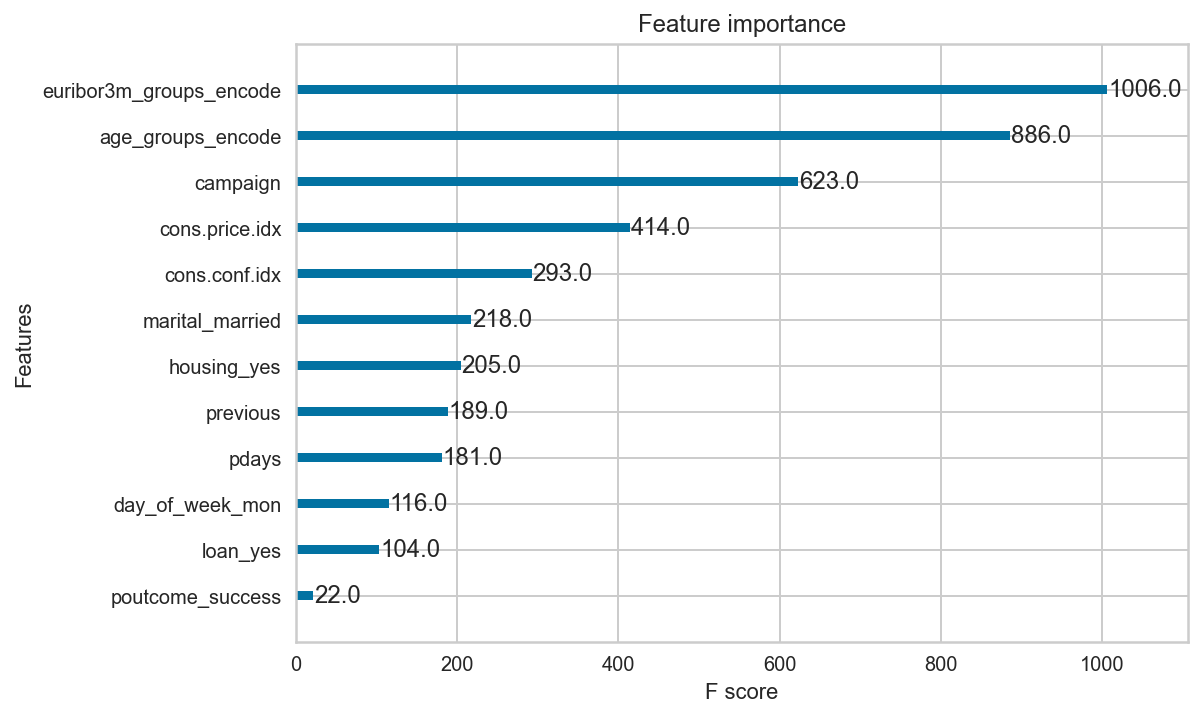

In [237]:
# show the feature importance
from xgboost import plot_importance
plot_importance(xgb_model)

### 7.2 Use all train data (up-sampled to be balanced) for XGBoost Model with default parameters

In [213]:
# use all train data 
X_train_predictions = xgb_model.predict(X_train_res[selected_train_features])

In [214]:
# get the report of train set.
print(metrics.classification_report(y_train_res, X_train_predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     23910
           1       0.85      0.79      0.82     23910

    accuracy                           0.83     47820
   macro avg       0.83      0.83      0.83     47820
weighted avg       0.83      0.83      0.83     47820



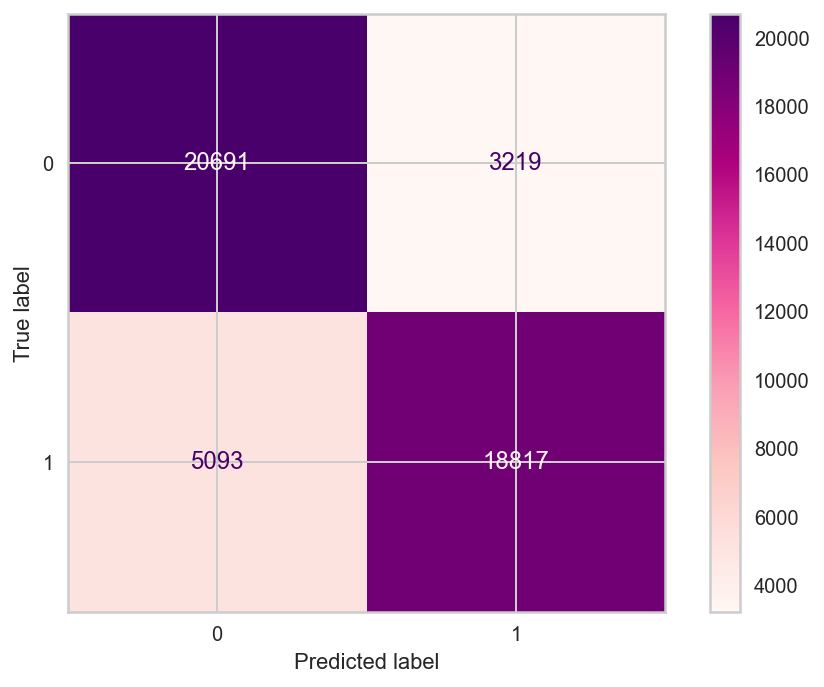

In [215]:
# show the confusion matrix
metrics.plot_confusion_matrix(xgb_model, X_train_res[selected_train_features], y_train_res, cmap=plt.cm.RdPu)

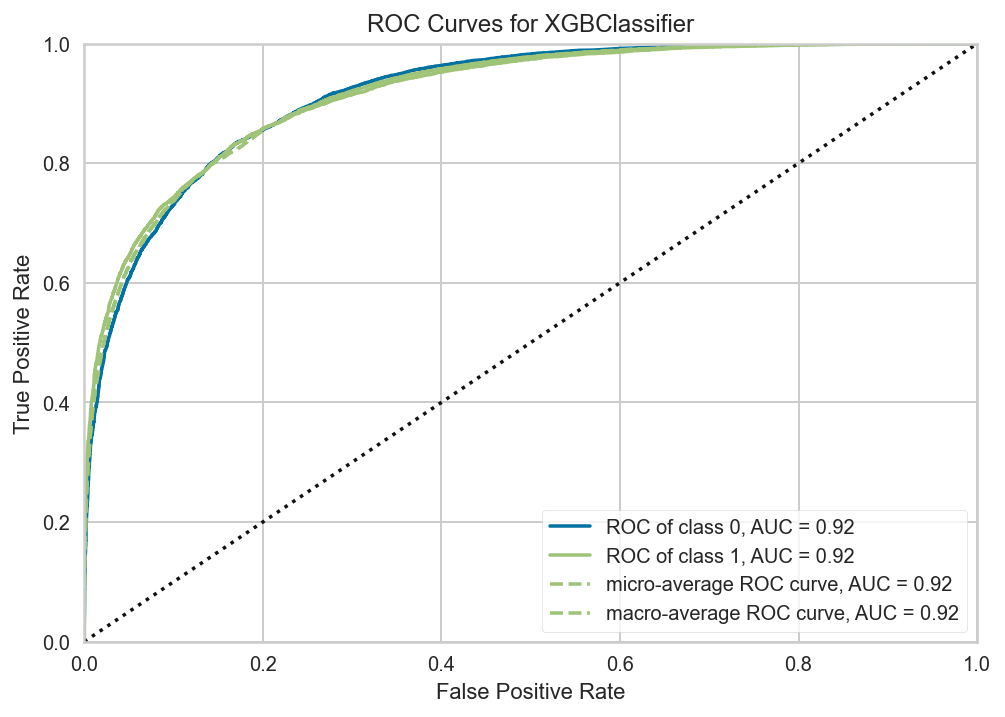

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [216]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(xgb_model)

visualizer.fit(X_train_res[selected_train_features], y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_train_res[selected_train_features], y_train_res)        # Evaluate the model on the train data
visualizer.show()                       # Finalize and render the figure

### 7.3 Use all test data (imbalance) for XGBoost Model with default parameters

In [218]:
# Let’s make some predictions on the test data set.
X_test_predictions = xgb_model.predict(X_test[selected_train_features])

# get the report of test set.
print(metrics.classification_report(y_test, X_test_predictions))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     10220
           1       0.33      0.55      0.41      1394

    accuracy                           0.81     11614
   macro avg       0.63      0.70      0.65     11614
weighted avg       0.86      0.81      0.83     11614



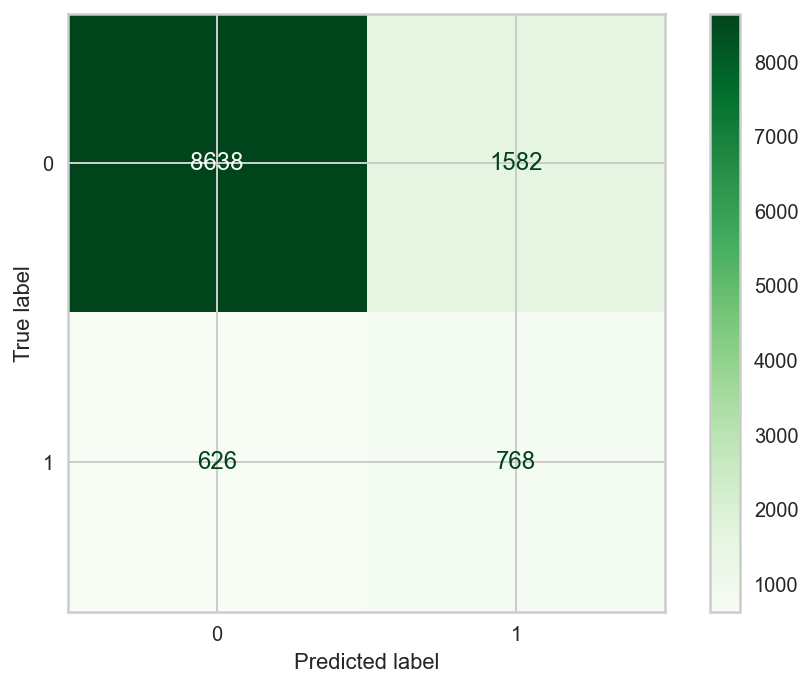

In [219]:
# show the confusion matrix
metrics.plot_confusion_matrix(xgb_model, X_test[selected_train_features], y_test, cmap=plt.cm.Greens)

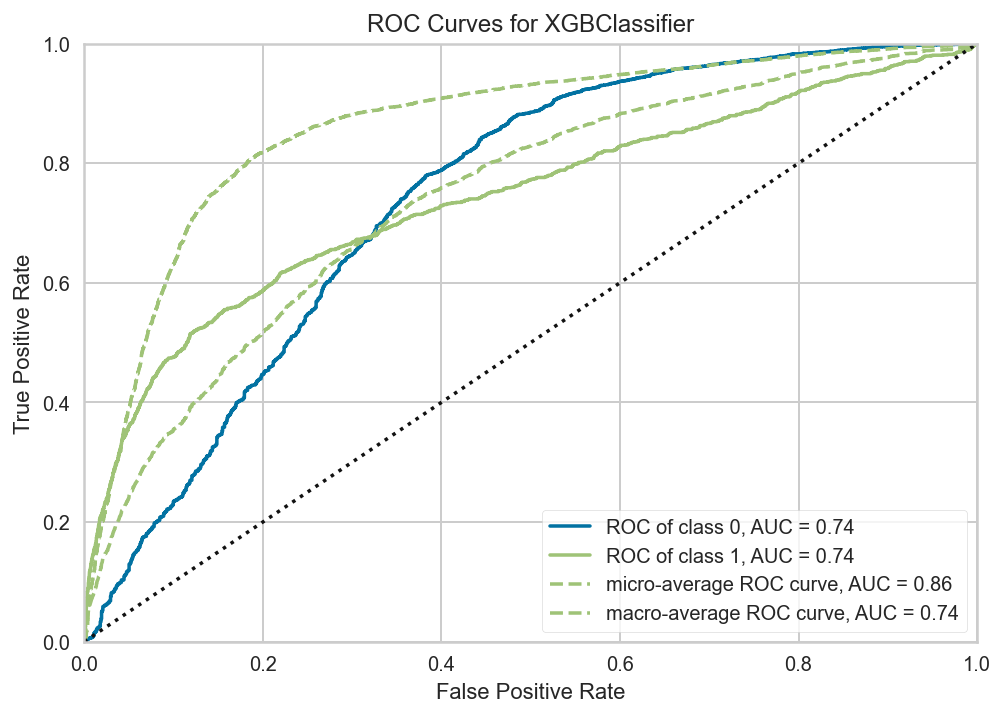

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [220]:
visualizer = ROCAUC(xgb_model)

visualizer.fit(X_test[selected_train_features], y_test)        # Fit the training data to the visualizer
visualizer.score(X_test[selected_train_features], y_test)        # Evaluate the model on the train data
visualizer.show()                       # Finalize and render the figure

### 7.4 Evaluate the XGBoost model by test set

__Train Data Set is balanced__

Using all train data for XGBoost with default parameters got metrics as followed

| accuracy | precision | recall | f1 | AUC |
| -- | -- | -- | -- | -- |
| 0.83 | 0.85 | 0.79 | 0.82 | 0.92 |

__Test Data Set is unbalanced__

The rate of Yes is 0.1127.

Using all test data for XGBoost got metrics as followed

| accuracy | precision | recall | f1 | AUC |
| -- | -- | -- | -- | -- |
| 0.81 | 0.33 | 0.55 | 0.41 | 0.74 |

The results of train set and test set show that the model does not overfit in test set because the accuracy only drops 2%.

__My goal is to train a model that has high recall and low precision__

recall: TP / (TP + FN) If we are trying to maximize the number of true positives (TP) or minimize the number of false negatives, we should use recall as one of our primary model performance metrics. Why? Maximization of TP necessarily minimizes instances of FP.

The XGBoost model has 0.55 recall on test set. It means as followed:

recall = 768 / (768 + 626) = 0.55. The model identifies 768 from 1394.

The model can maximize the true positives (TP). The bank can identify more customers who will deposit.

# 8. Ensemble Methods

Stacking 2 level model.

- Level 1: KNN classifier, SVM classifier, Random Forest classifier
- Level 2: Logistic Regression

__Explain how your ensemble model combines the output of the individual component models to calculate a prediction.__

To assume I have a train data set with 1000 rows and a test data set with 400 rows. Level 1 has 3 models. Level 2 has 1 model.

__The train part:__

Loop the 5-fold cross-validation:

    cross validation train set = 800 rows; cross validation test set = 200 rows.
    
    train Lv.1 1st model: Use the 800 rows to get 200 predictions by Lv.1 1st model
  
    train Lv.1 2nd model: Use the 800 rows to get 200 predictions by Lv.1 2nd model
  
    train Lv.1 3rd model: Use the 800 rows to get 200 predictions by Lv.1 3rd model
  
After the 5-fold cross validation:
  
    1st model has 200 * 5 = 1000 predictions. Convert them to 1000 * 1.
  
    2nd model has 200 * 5 = 1000 predictions. Convert them to 1000 * 1.
  
    3rd model has 200 * 5 = 1000 predictions. Convert them to 1000 * 1.
  
Now, I have a 1000 * 3 predictions matrix. The matrix will be used to train the model of level 2

The model of level 2 outcomes 1000 * 1 predictions.

__The test part:__

The test part does not use the 5-fold cross-validation to split the test data set. 


After loop 5 times:

    Lv.1 1st model uses test data set to get a 5 * 400 matrix. Then, calculate the mean of rows. To get 1 * 400 mean matrix.
    
    Lv.1 2nd model uses test data set to get a 5 * 400 matrix. Then, calculate the mean of rows. To get 1 * 400 mean matrix.
    
    Lv.2 3rd model uses test data set to get a 5 * 400 matrix. Then, calculate the mean of rows. To get 1 * 400 mean matrix.
    
Transfer 1 * 400 mean matrix to 400 * 1 mean matrix. Then, to concat them to 400 * 3 matrix.


Now, we have a 1000 * 3 matrix from the train data set. 400 * 3 matrix from the test data set.

__The level 2__

The predicted value matrix from 5-fold 1000 * 3 is used as your Train Data to train the second layer model

The predicted value matrix 400 * 3 from Test Data is your Test Data. Use the trained model to predict them.

### 8.1 Use cross validation to check the stacking model

In [221]:
# create a stacking model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from mlxtend.classifier import StackingClassifier


clf1 = KNeighborsClassifier(n_jobs=-1)
clf2 = RandomForestClassifier(n_jobs=-1)
clf3 = LinearSVC()
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

In [222]:
label = ['KNN', 'Random Forest', 'SVM', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]

In [223]:
# Use train data set to do the cross validation
sclf_vc_res = my_cls_cv("Stacking", sclf, X_train_res[selected_train_features], y_train_res, cv = 3, 
                           len_num_params = len(selected_train_features))


# view result
pd.DataFrame([sclf_vc_res])

,model_name,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,Stacking,12,0.845818,0.82807,0.845803,0.872885,0.849874,0.81872,0.154182,-29777.745748


The accuracy, precision, recall, f1 and acu are all over 0.80. The recall is 0.87.

In [224]:
# add into the result list
model_results.append(sclf_vc_res)

### 8.2 Stacking Model compares with all other models

In [235]:
pd.DataFrame(model_results)

,model_name,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,default Dtree,12,0.834964,0.822930,0.834964,0.853608,0.837971,0.816320,0.165036,-17207.742983
1,best Dtree,12,0.753492,0.777922,0.753465,0.709974,0.742232,0.796956,0.246508,-13369.424819
2,default forest,12,0.851338,0.833000,0.851342,0.878882,0.855319,0.823801,0.148662,-18205.848035
3,best forest,12,0.772606,0.827240,0.772588,0.689152,0.751882,0.856024,0.227394,-14141.785953
4,default XGBoost,12,0.811460,0.835946,0.811452,0.775039,0.804337,0.847866,0.188540,-15934.977732
5,best XGBoost,12,0.802028,0.839330,0.802018,0.747097,0.790517,0.856939,0.197972,-15468.982504
6,Stacking,12,0.845818,0.828070,0.845803,0.872885,0.849874,0.818720,0.154182,-29777.745748


The Stacking model has the highest recall in all models. The AIC is the lowest in all models.

### 8.3 Use all train data (up-sampled to be balanced) for Stacking Model

In [225]:
# use all train data 
sclf_X_train_predictions = sclf.predict(X_train_res[selected_train_features])

# get the report of test set.
print(metrics.classification_report(y_train_res, sclf_X_train_predictions))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     23910
           1       0.88      0.92      0.90     23910

    accuracy                           0.90     47820
   macro avg       0.90      0.90      0.90     47820
weighted avg       0.90      0.90      0.90     47820



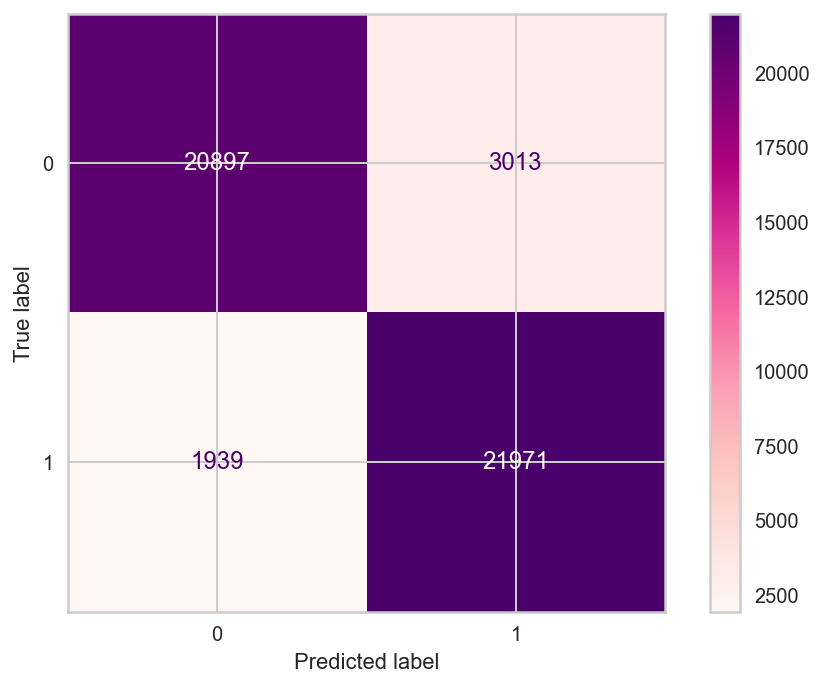

In [226]:
# show the confusion matrix
metrics.plot_confusion_matrix(sclf, X_train_res[selected_train_features], y_train_res, cmap=plt.cm.RdPu)

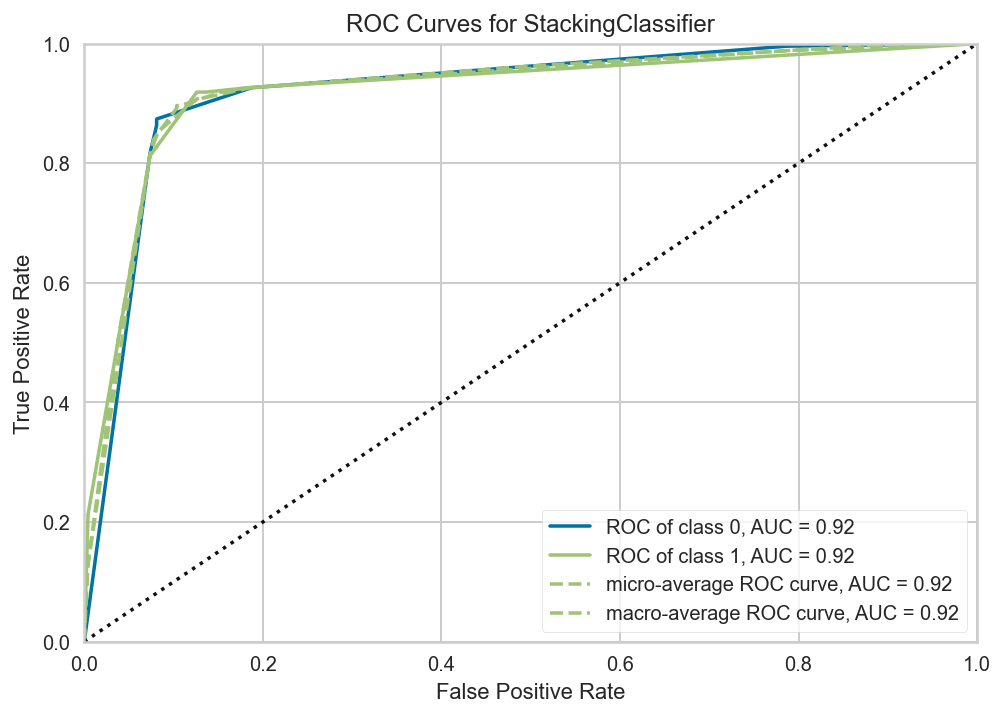

<AxesSubplot:title={'center':'ROC Curves for StackingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [227]:
visualizer = ROCAUC(sclf)

visualizer.fit(X_train_res[selected_train_features], y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_train_res[selected_train_features], y_train_res)        # Evaluate the model on the train data
visualizer.show()                       # Finalize and render the figure

### 8.4 Use all test data (imbalance) for Stacking Model

In [228]:
sclf_X_test_predictions = sclf.predict(X_test[selected_train_features])

# get the report of test set.
print(metrics.classification_report(y_test, sclf_X_test_predictions))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     10220
           1       0.28      0.52      0.36      1394

    accuracy                           0.78     11614
   macro avg       0.60      0.67      0.62     11614
weighted avg       0.85      0.78      0.81     11614



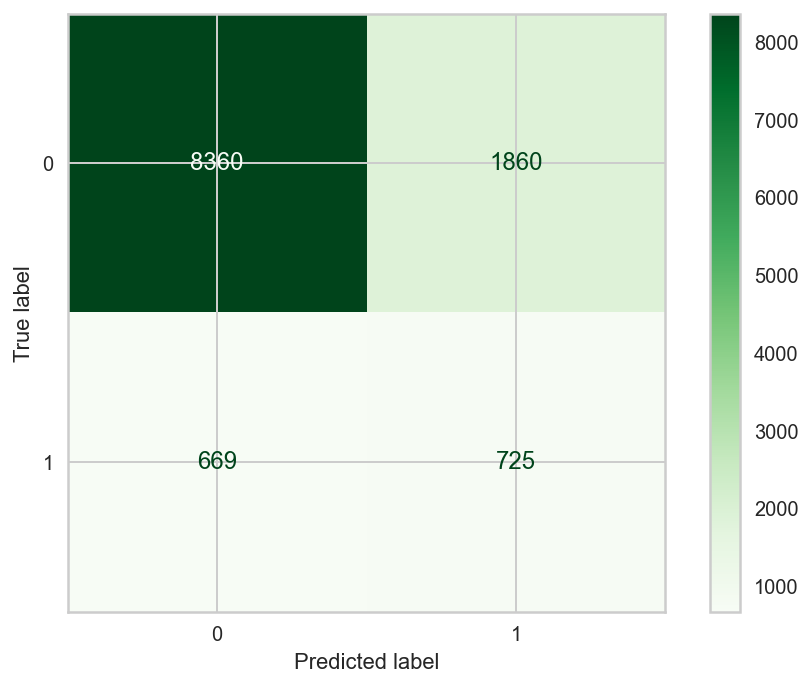

In [229]:
# show the confusion matrix
metrics.plot_confusion_matrix(sclf, X_test[selected_train_features], y_test, cmap=plt.cm.Greens)

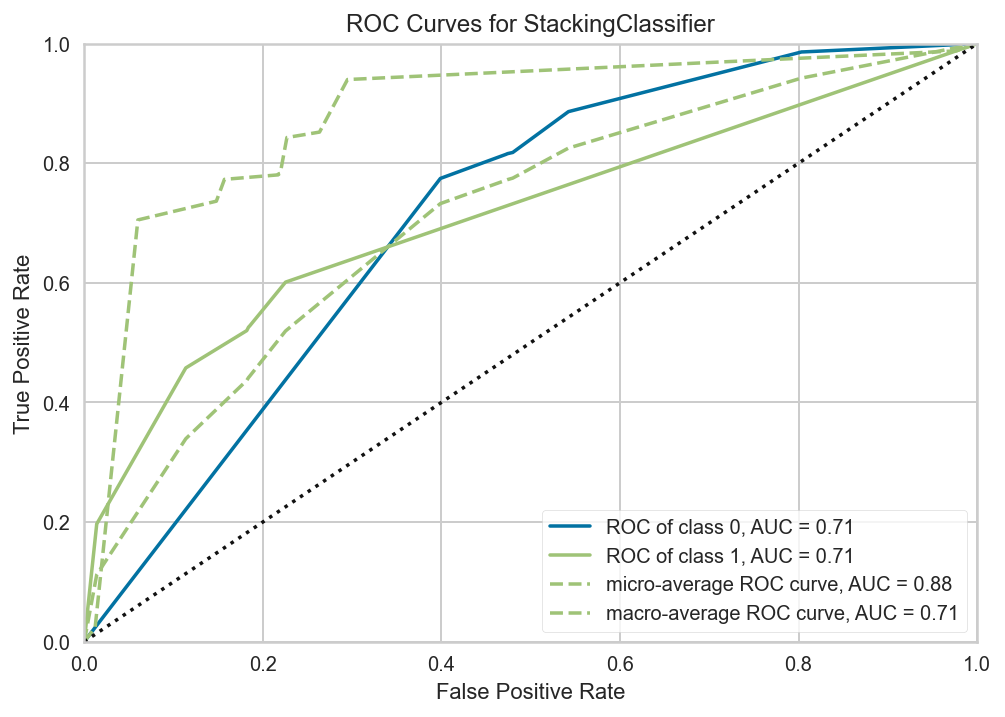

<AxesSubplot:title={'center':'ROC Curves for StackingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [230]:
visualizer = ROCAUC(sclf)

visualizer.fit(X_test[selected_train_features], y_test)        # Fit the training data to the visualizer
visualizer.score(X_test[selected_train_features], y_test)        # Evaluate the model on the train data
visualizer.show()                       # Finalize and render the figure

### 8.5 Evaluate the Stacking model by test set

__Train Data Set is balanced__

Using all train data for Stacking with default parameters got metrics as followed

| accuracy | precision | recall | f1 | AUC |
| -- | -- | -- | -- | -- |
| 0.90 | 0.88 | 0.92 | 0.90 | 0.92 |

__Test Data Set is unbalanced__

The rate of Yes is 0.1127.

Using all test data for Stacking got metrics as followed

| accuracy | precision | recall | f1 | AUC |
| -- | -- | -- | -- | -- |
| 0.78 | 0.28 | 0.52 | 0.36 | 0.71 |

The results of the train set and test set show that the model might overfit in the test set because the accuracy drops 12%.

__My goal is to train a model that has high recall and low precision__

The Stacking model has 0.52 recall on the test set. It means as followed:
recall = 725 / (725 + 669) = 0.52. The model identifies 725 from 1394.
If the bank only wants to identify more customers who will deposit, the Stacking model would provide useful predictions.

# 9. Conclustion

The bank wants to get the most deposit customers with the least cost. I use Data analysis and machine learning methods to find which customers are most likely to make deposits. The Data analysis and ML methods can help banks reduce costs and increase the number of deposits.


Feature Engineering: 

    To discrete age and euribor3m:

    In the beginning, I did not discrete age and euribor3m. The recall is very low. Later, I discredited age and euribor3m into equal-sized buckets. I got a good recall.

To select features:
    
    I used logistic regression to compare different features selected by different feature selection methods. Although all features can get a very high result, I'm afraid all features will overfit. I selected the features recommended by Random Forest.

To select models:
    
    The Random Forest model has the highest recall in all models. I let the Random Forest model predict the test data set. I found that the recall is very low on the test data set. I think it might be overfitting. Then, I selected the XGBoost model to predict the test data set. I got a high recall of 0.55.
    
Using the Stacking model:

    Before I used it, I thought it will be the best one. But the result shows that it has a lower recall than the XGBoost model. I think that the Stacking model is very powerful, but it needs to select many hyper-parameters for each weak model.
    
Feature engineering is more important than models:
    
    I only discrete age and euribor3m into equal-sized buckets. I got a recall increase of over 10%. But I used 3 weak models and 1 logistic regression model to create a Stacking. It has a lower recall than a simple XGBoost model.


Next step:

    I read the Paper about the data set. The Paper used Neural Network to predict customers who might subscribe to a new deposit. I think the Neural Network might be a good way.

# 10. Reference

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb

https://github.com/rasbt/mlxtend